# Sparse and Non Negative Asymetric Auto Encoder on MNIST Dataset
* Sparsity Regularizer : KL Divergence (KLdivSum), applied to the activation.
* Non-Negativity Regularizer : Non Negativity Constraint
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Encoder architecture: infoGAN
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
## Impact of the value of the sparsity parameters
* Sparsity objective: 0.01, 0.05, 0.1, 0.2
* Sparsity weight: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5



In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from AsymAE_infoGAN.nonNegSparseAsymAEinfoGAN import Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, _ = bastien_utils.load_data_MNIST(train=False, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2] = 31
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [3]:
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_13_dim100_KLdivSum_0.0001_0.01_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')

In [4]:
AE.encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1088      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         131200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
__________

In [4]:
results = pd.read_csv("../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13results")
results

Unnamed: 0  sparsity_objective  sparsity_weight  test_error  test_kl_loss  \
0            0                0.01           0.0001    0.005510      0.001649   
1            1                0.05           0.0001    0.005233      0.001030   
2            2                0.10           0.0001    0.004974      0.000634   
3            3                0.20           0.0001    0.004700      0.000247   
4            4                0.01           0.0005    0.007941      0.003023   
5            5                0.05           0.0005    0.007059      0.001355   
6            6                0.10           0.0005    0.006088      0.000666   
7            7                0.20           0.0005    0.005150      0.000298   
8            8                0.01           0.0010    0.009443      0.003702   
9            9                0.05           0.0010    0.007849      0.001391   
10          10                0.10           0.0010    0.006551      0.000704   
11          11                0.20           0.0010    0.005253      0.000483   
12          12                0.01           0.0050    0.015656      0.004627   
13          13                0.05           0.0050    0.009692      0.002077   
14          14                0.10           0.0050    0.007006      0.001931   
15          15                0.20           0.0050    0.005184      0.001884   
16          16                0.01           0.0100    0.018468      0.005239   
17          17                0.05           0.0100    0.010046      0.003406   
18          18                0.10           0.0100    0.007035      0.003504   
19          19                0.20           0.0100    0.005148      0.003511   
20          20                0.01           0.0500    0.024335      0.013413   
21          21                0.05           0.0500    0.010331      0.014612   
22          22                0.10           0.0500    0.006898      0.014851   
23          23                0.20           0.0500    0.005002      0.014331   
24          24                0.01           0.1000    0.026994      0.024319   
25          25                0.05           0.1000    0.010804      0.028766   
26          26                0.10           0.1000    0.007038      0.028119   
27          27                0.20           0.1000    0.005191      0.025424   
28          28                0.01           0.5000    0.035460      0.087681   
29          29                0.05           0.5000    0.011180      0.112994   
30          30                0.10           0.5000    0.007744      0.107534   
31          31                0.20           0.5000    0.005560      0.102749   

    test_max_approx_error_toOriginal_dilatation  \
0                                      0.792935   
1                                      0.951430   
2                                      0.971526   
3                                      1.133483   
4                                      0.291982   
5                                      0.430075   
6                                      0.583839   
7                                      0.961476   
8                                      0.182517   
9                                      0.287897   
10                                     0.469734   
11                                     0.986028   
12                                     0.057244   
13                                     0.192119   
14                                     0.399353   
15                                     0.896920   
16                                     0.045744   
17                                     0.170446   
18                                     0.443909   
19                                     0.945243   
20                                     0.046781   
21                                     0.157000   
22                                     0.478981   
23                                     1.053304   
24                                     0.058648   
25  

In [6]:
max_values = results.max(axis=0)
max_idx = results.idxmax()
min_values = results.min(axis=0)
min_idx = results.idxmin()
median_values = results.median()
std_values = results.std()
sparsity_objectives = results['sparsity_objective']
sparsity_weights = results['sparsity_weight']

In [7]:

print('***********************Maximum values**********************')
print(max_values[1:])
print('\n')
print('***********************Minimum values**********************')
print(min_values[1:])
print('\n')
print('***********************Median values**********************')
print(median_values[1:])


***********************Maximum values**********************
sparsity_objective                                 0.200000
sparsity_weight                                    0.500000
test_error                                         0.035460
test_kl_loss                                       0.112994
test_max_approx_error_toOriginal_dilatation        1.386234
test_max_approx_error_toRec_dilatation             1.362681
test_sparsity                                      0.830872
training_error                                     0.035687
training_kl_loss                                   0.066419
training_max_approx_error_toOriginal_dilatation    1.330448
training_max_approx_error_toRec_dilatation         1.310975
training_sparsity                                  0.831879
dtype: float64


***********************Minimum values**********************
sparsity_objective                                 0.010000
sparsity_weight                                    0.000100
test_error             

In [8]:
print('\033[1m'+'Lowest error: '+'\033[0m' , round(min_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_error']], ', sparsity_weight=', sparsity_weights[min_idx['test_error']], '\n')
print('\033[1m'+'Highest error: '+'\033[0m', round(max_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_error']], ', sparsity_weight=', sparsity_weights[max_idx['test_error']], '\n')
print('\033[1m'+'Least sparse: '+'\033[0m' , round(min_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[min_idx['test_sparsity']], '\n')
print('\033[1m'+'Most sparse: '+'\033[0m', round(max_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[max_idx['test_sparsity']], '\n')
print('\033[1m'+'Lowest Max-approximation error to dilatation of the originals: '+'\033[0m' , round(min_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Highest  Max-approximation error to dilatation of the originals: '+'\033[0m', round(max_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Lowest KL-loss: '+'\033[0m' , round(min_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[min_idx['test_kl_loss']], '\n')
print('\033[1m'+'Highest KL-loss: '+'\033[0m', round(max_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[max_idx['test_kl_loss']], '\n')
print('\033[1m'+'Lowest max-approximation error to dilatation of the reconstruction: '+'\033[0m' , round(min_values['test_max_approx_error_toRec_dilatation'], 5), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toRec_dilatation']], '\n')
print('\033[1m'+'Highest max-approximation error to dilatation of the reconstruction: '+'\033[0m', round(max_values['test_max_approx_error_toRec_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toRec_dilatation']], '\n')


Lowest error:  0.0047 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Highest error:  0.0355 , sparsity_objective= 0.01 , sparsity_weight= 0.5 

Least sparse:  0.2299 , sparsity_objective= 0.2 , sparsity_weight= 0.5 

Most sparse:  0.8309 , sparsity_objective= 0.01 , sparsity_weight= 0.05 

Lowest Max-approximation error to dilatation of the originals:  0.0457 , sparsity_objective= 0.01 , sparsity_weight= 0.01 

Highest  Max-approximation error to dilatation of the originals:  1.3862 , sparsity_objective= 0.2 , sparsity_weight= 0.5 

Lowest KL-loss:  0.0002 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Highest KL-loss:  0.113 , sparsity_objective= 0.05 , sparsity_weight= 0.5 

Lowest max-approximation error to dilatation of the reconstruction:  0.02082 , sparsity_objective= 0.01 , sparsity_weight= 0.05 

Highest max-approximation error to dilatation of the reconstruction:  1.3627 , sparsity_objective= 0.2 , sparsity_weight= 0.5 



Nb:
* Lowest error reached with weakest sparsity constraints.
* Highest error reached with strongest sparsity constraints.
* The lowest sparsity measuer is not significant, as if all coefficients are very close to zero but are similar, then the sparsity measure from Hoyer 2004 is close to 0.
* Highest max-approximation error to dilatation of the originals and of the reconstruction reached with the weakest sparsity constraint.

In [3]:
sparsity_objectives = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_sparsityObjectives_dim100.npy')
sparsity_weights = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_sparsityWeights_dim100.npy')
test_mse = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_test_errors_dim100.npy')
train_mse = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_training_errors_dim100.npy')
test_kl_loss = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_test_kl_loss_dim100.npy')
train_kl_loss = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_training_kl_loss_dim100.npy')
test_max_approx_to_Original = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_test_max_approx_error_toOriginal_dilation_dim100.npy')
train_max_approx_to_Original = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_training_max_approx_error_toOriginal_dilatation_dim100.npy')
test_max_approx_to_Rec = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_test_max_approx_error_toRec_dilation_dim100.npy')
train_max_approx_to_Rec = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_training_max_approx_error_toRec_dilatation_dim100.npy')
test_sparsity = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_test_sparsity_dim100.npy')
train_sparsity = np.load('../Results/MNIST/AsymAE_infoGAN/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_11_13_training_sparsity_dim100.npy')

In [11]:
flat_spr = test_sparsity.flatten()
idx_spr = np.argsort(flat_spr)
sort_spr = flat_spr[idx_spr]
sort_max_approx = test_max_approx_to_Original.flatten()[idx_spr]

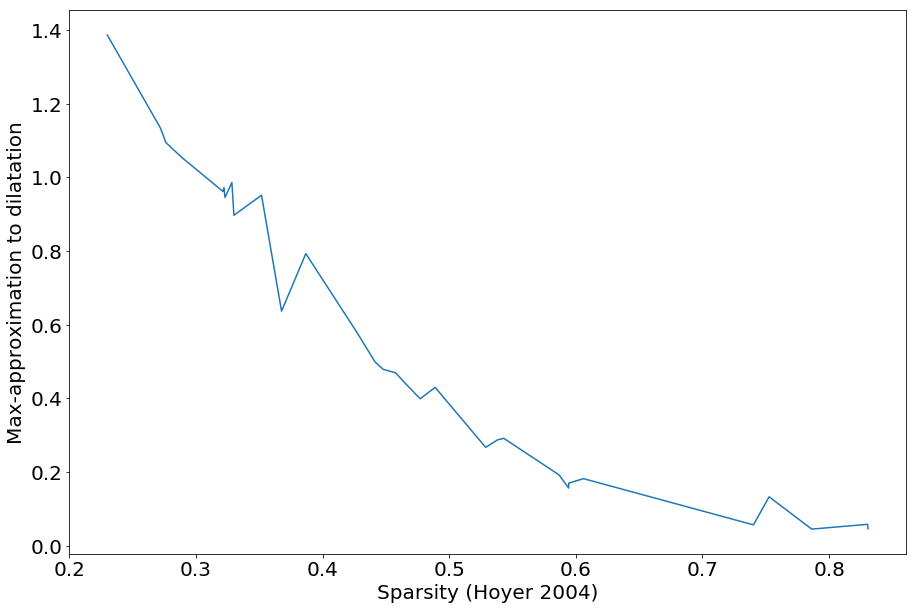

In [12]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sort_spr, sort_max_approx)
plt.xlabel('Sparsity (Hoyer 2004)')
plt.ylabel('Max-approximation to dilatation')
plt.show()

In [13]:
flat_mse = test_mse.flatten()
idx_mse = np.argsort(flat_mse)
sort_mse = flat_mse[idx_mse]
sort_max_approx = test_max_approx_to_Original.flatten()[idx_mse]

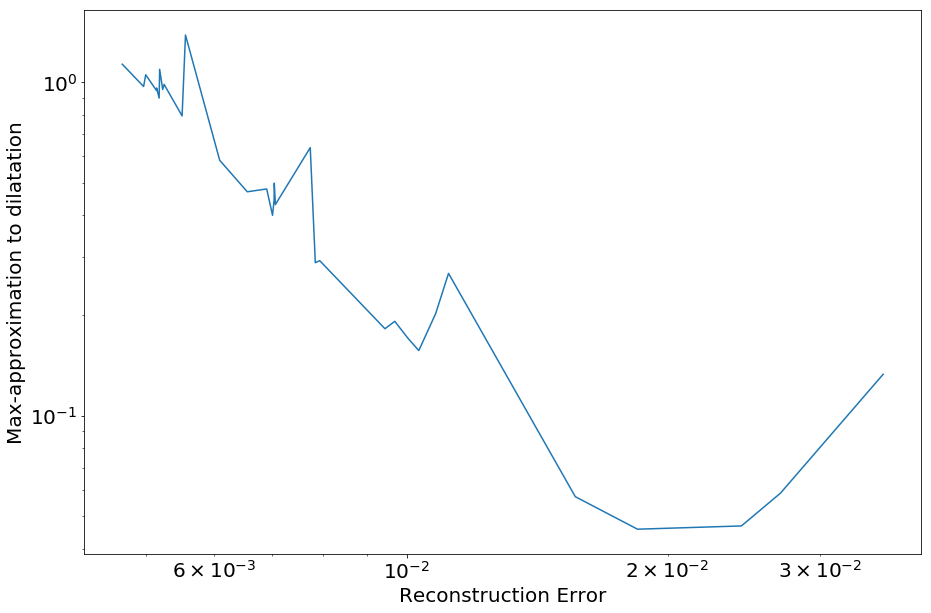

In [14]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sort_mse, sort_max_approx)
plt.xlabel('Reconstruction Error')
plt.ylabel('Max-approximation to dilatation')
plt.xscale('log')
plt.yscale('log')
plt.show()

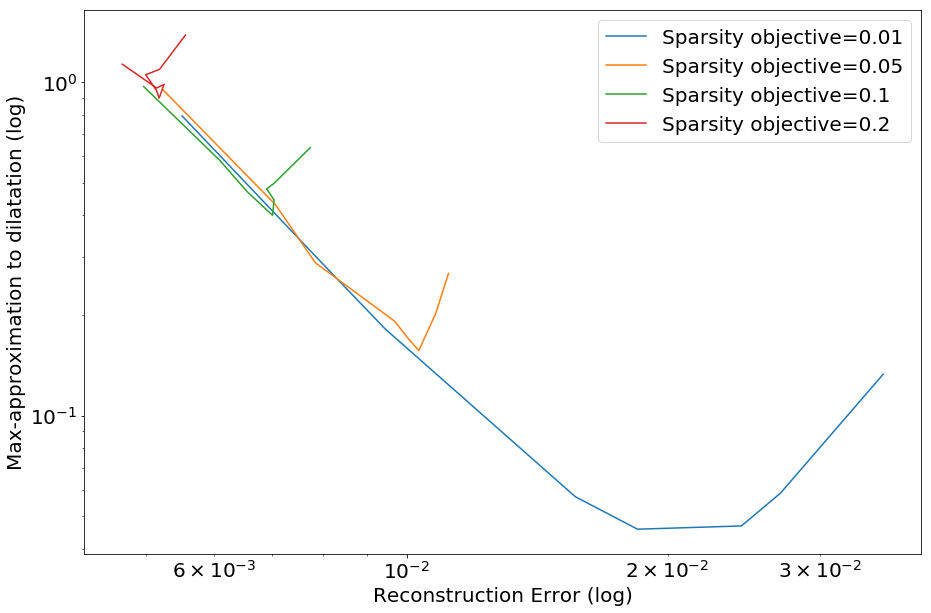

In [15]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(test_mse[:,0], test_max_approx_to_Original[:,0])
plt.plot(test_mse[:,1], test_max_approx_to_Original[:,1])
plt.plot(test_mse[:,2], test_max_approx_to_Original[:,2])
plt.plot(test_mse[:,3], test_max_approx_to_Original[:,3])
plt.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
plt.xlabel('Reconstruction Error (log)')
plt.ylabel('Max-approximation to dilatation (log)')
plt.xscale('log')
plt.yscale('log')
plt.show()

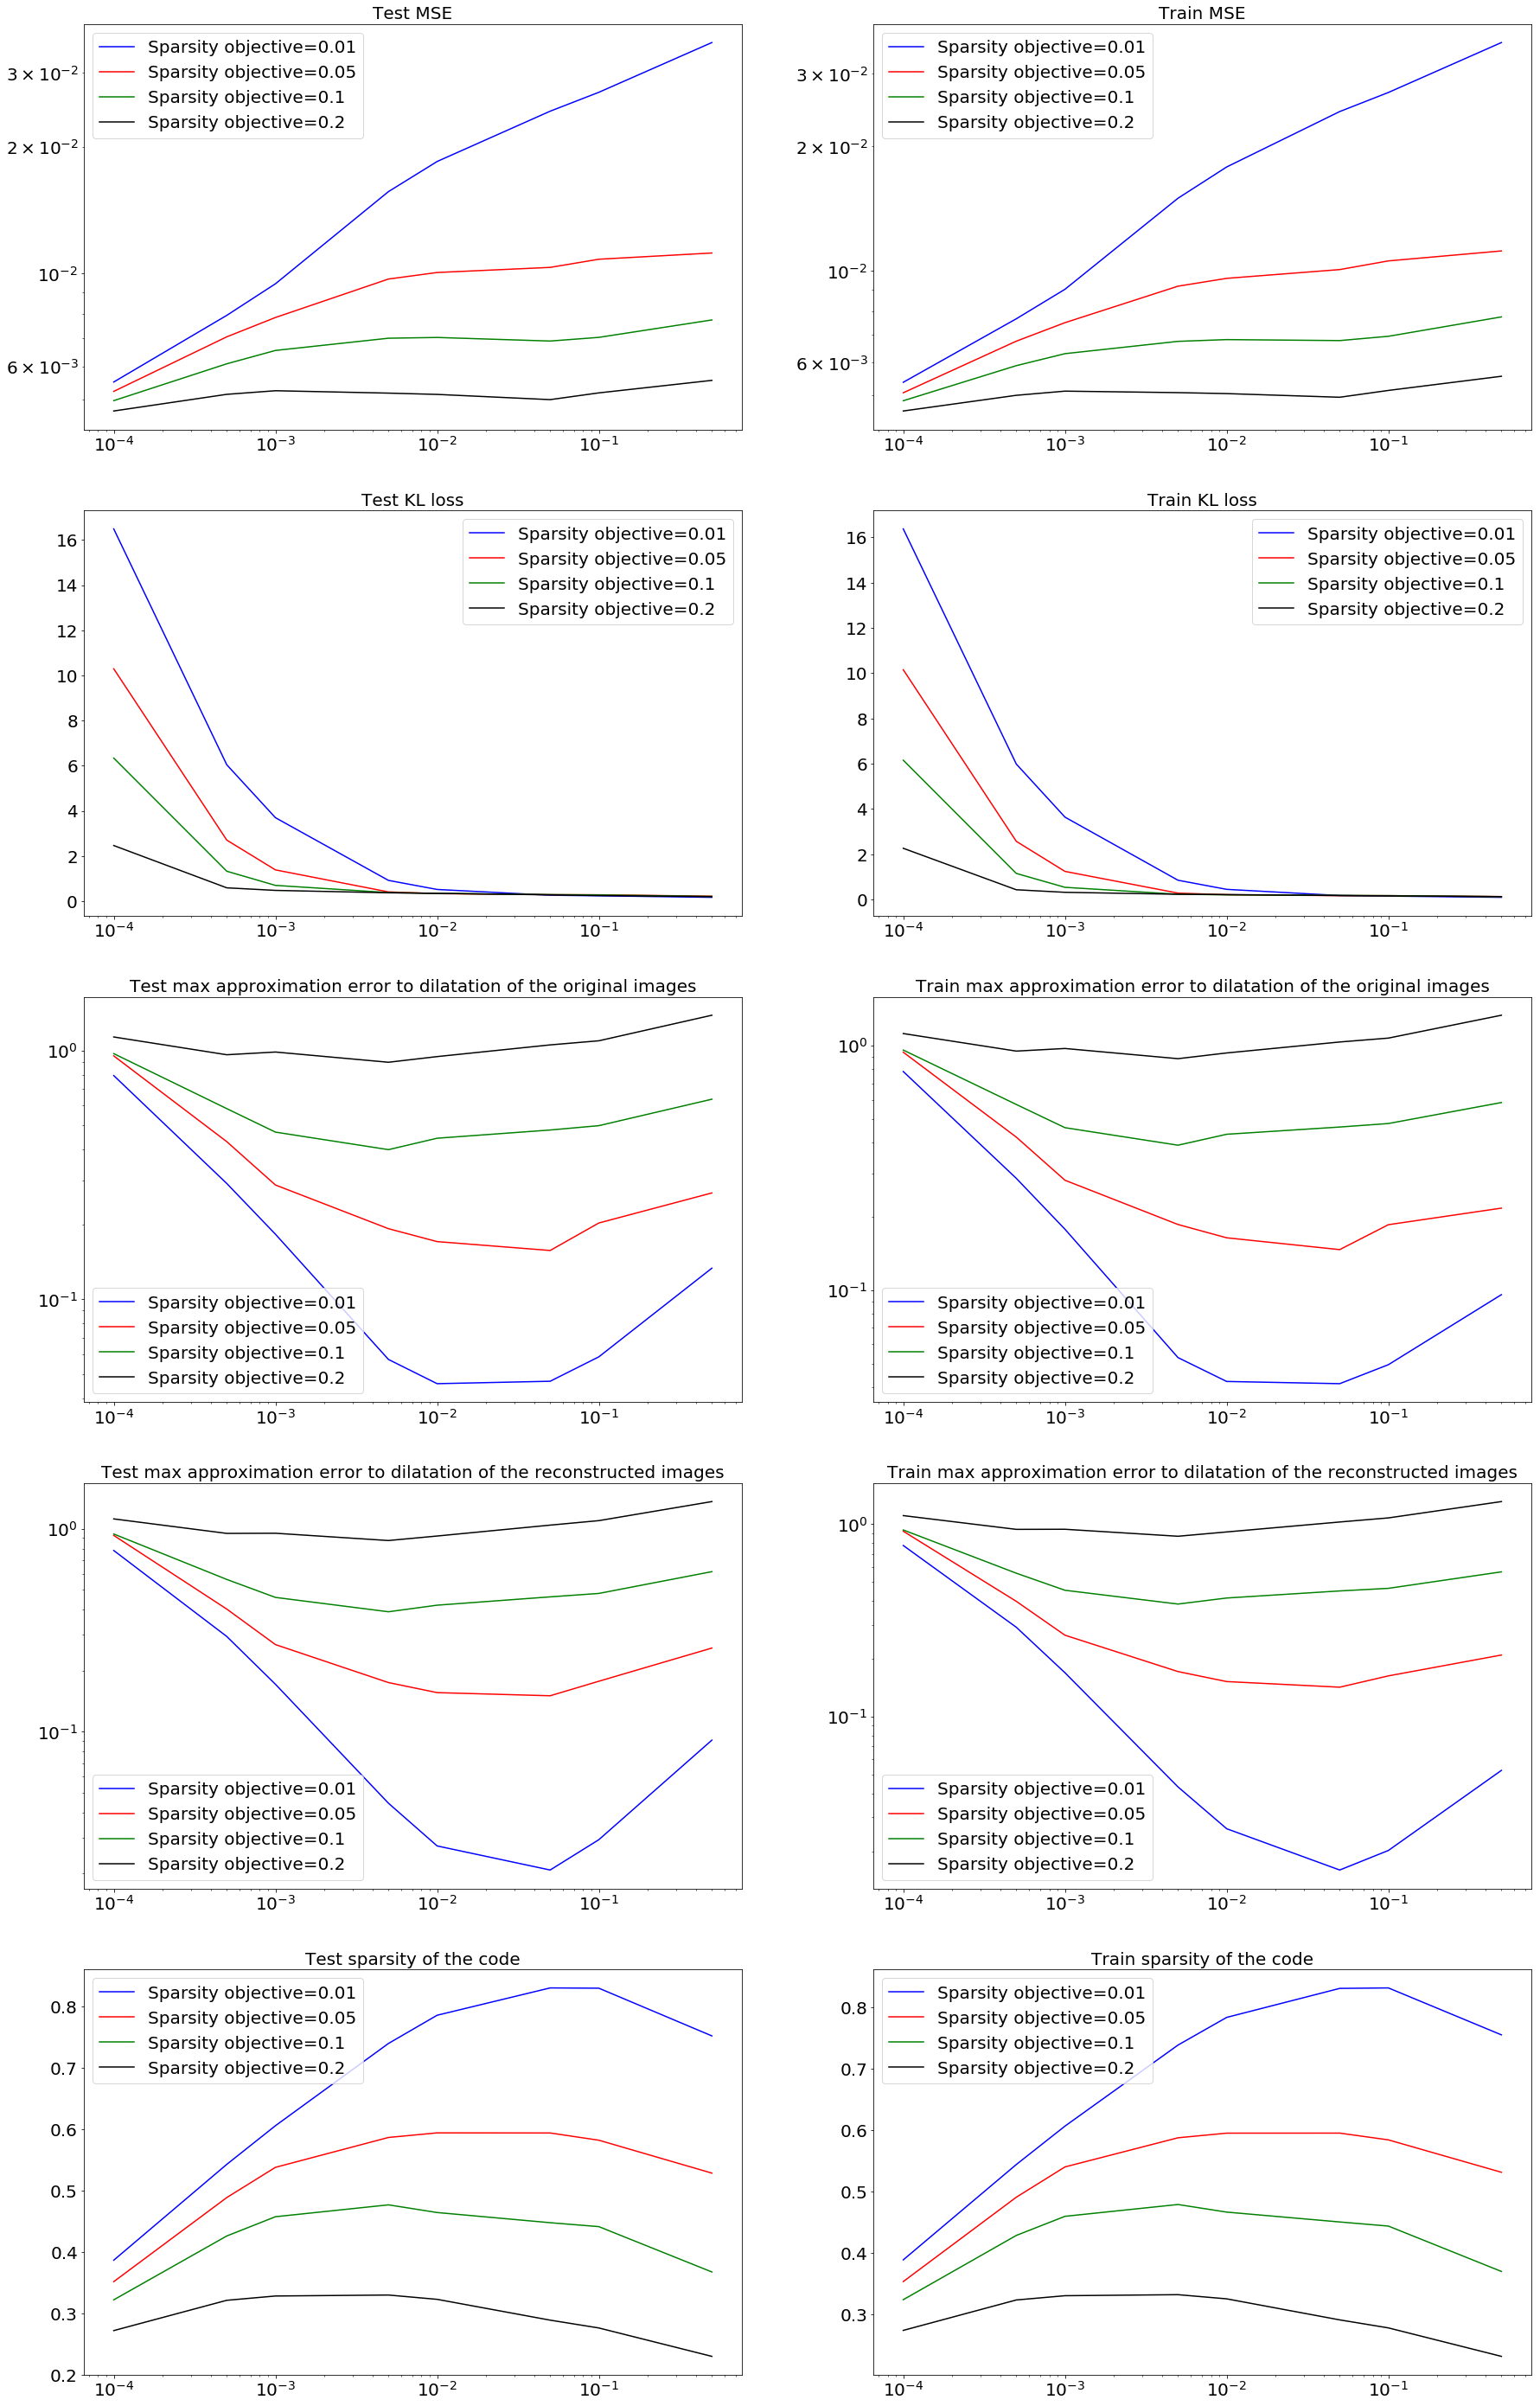

In [16]:
plt.figure(figsize=(30,50))

ax = plt.subplot(5, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test MSE')

ax = plt.subplot(5, 2, 2)
ax.plot(sparsity_weights, train_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,1], 'r')
ax.plot(sparsity_weights, train_mse[:,2], 'g')
ax.plot(sparsity_weights, train_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train MSE')

ax = plt.subplot(5, 2, 3)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test KL loss')


ax = plt.subplot(5, 2, 4)
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train KL loss')

ax = plt.subplot(5, 2, 5)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 6)
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 7)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the reconstructed images')

ax = plt.subplot(5, 2, 8)
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(5, 2, 9)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, test_sparsity[:,1], 'r')
ax.plot(sparsity_weights, test_sparsity[:,2], 'g')
ax.plot(sparsity_weights, test_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test sparsity of the code')


ax = plt.subplot(5, 2, 10)
ax.plot(sparsity_weights, train_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.plot(sparsity_weights, train_sparsity[:,2], 'g')
ax.plot(sparsity_weights, train_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train sparsity of the code')

plt.show()

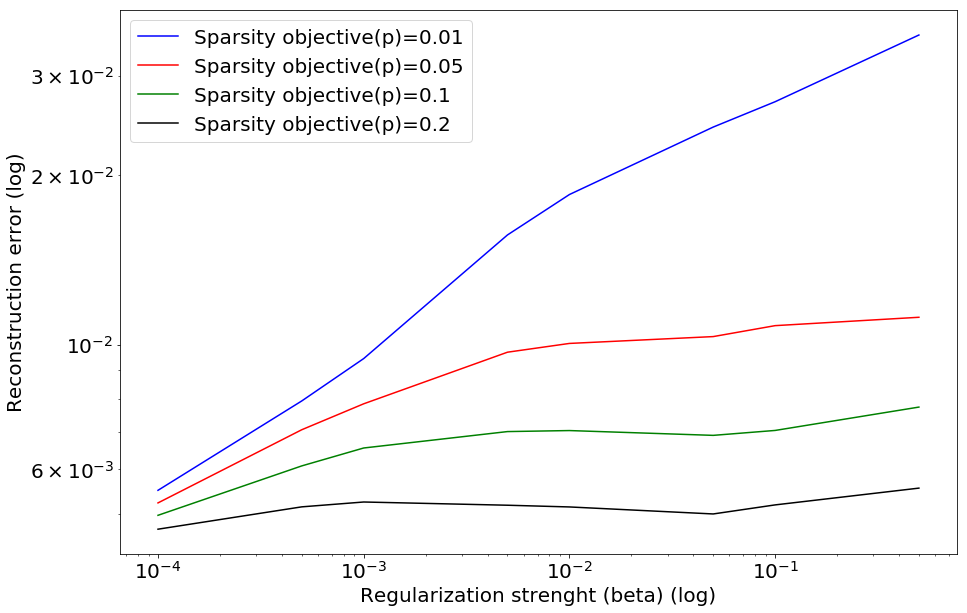

In [17]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_mse[:,0], 'b')
plt.plot(sparsity_weights, test_mse[:,1], 'r')
plt.plot(sparsity_weights, test_mse[:,2], 'g')
plt.plot(sparsity_weights, test_mse[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Reconstruction error (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

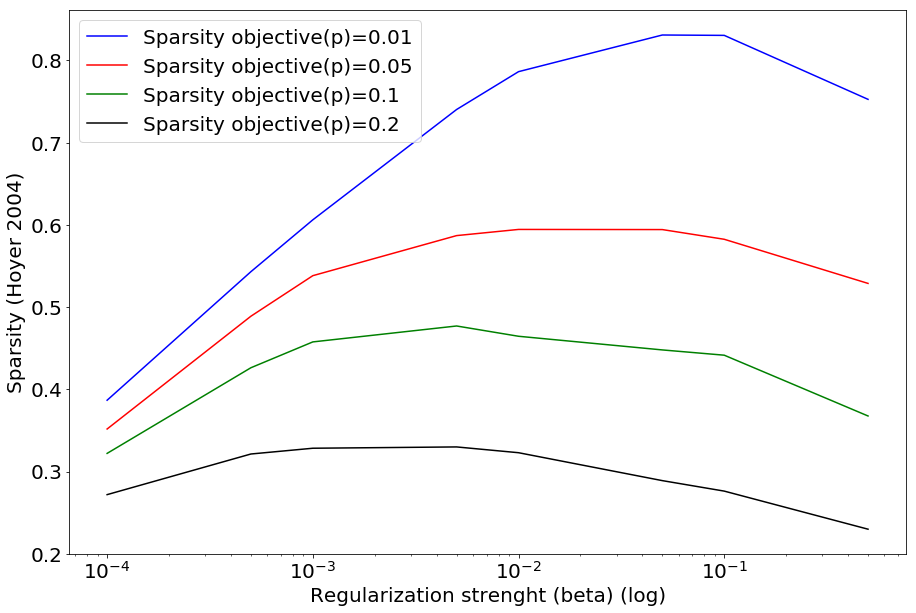

In [18]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_sparsity[:,0], 'b')
plt.plot(sparsity_weights, test_sparsity[:,1], 'r')
plt.plot(sparsity_weights, test_sparsity[:,2], 'g')
plt.plot(sparsity_weights, test_sparsity[:,3], 'k')
plt.xscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Sparsity (Hoyer 2004)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

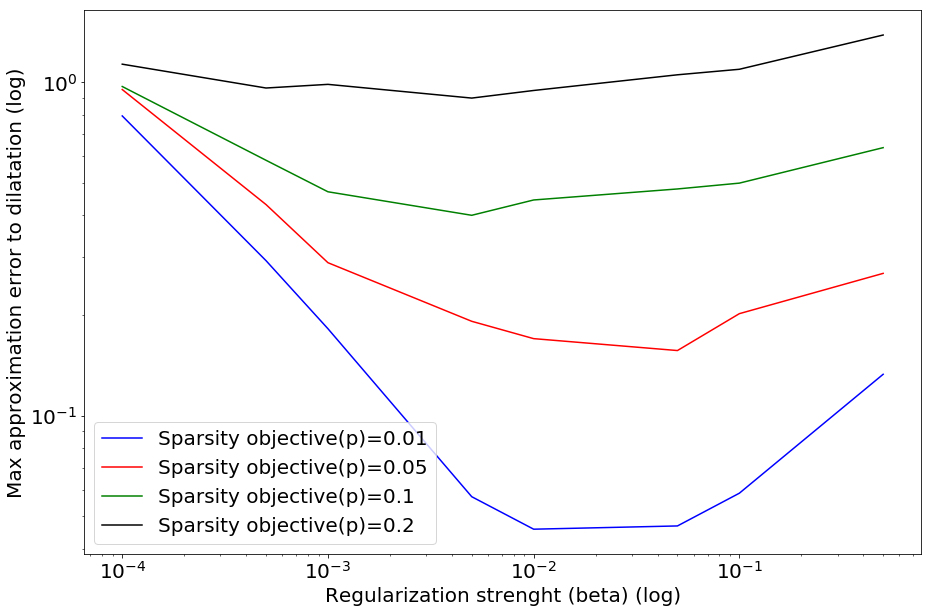

In [19]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilatation (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

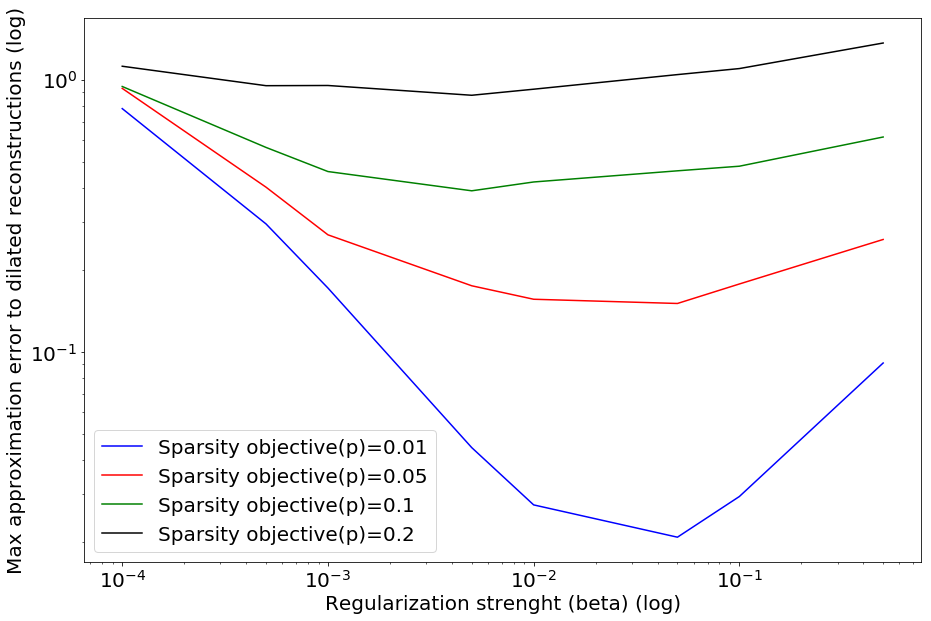

In [20]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilated reconstructions (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

# 1. Sparsity_Objective = 0.01

## 1.1 Sparsity_weight = 0.0001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.005509836475551129


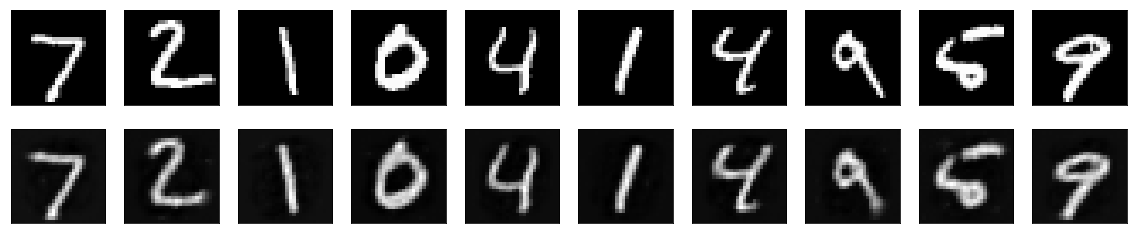

Histograms of the encodings - Sparsity (Hoyer):  0.3867120146751404


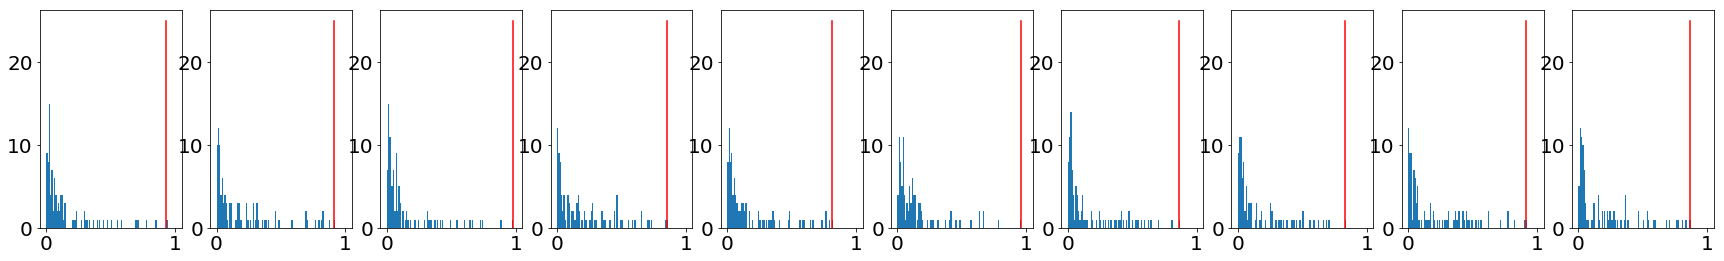

Atom images of the decoder


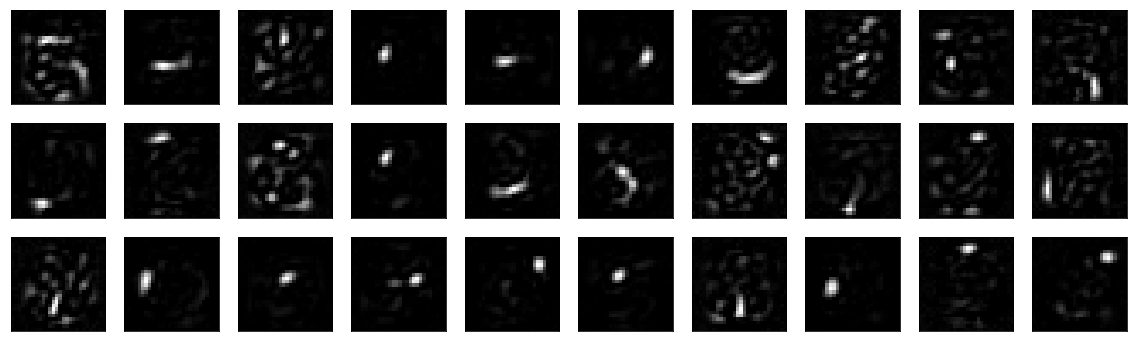

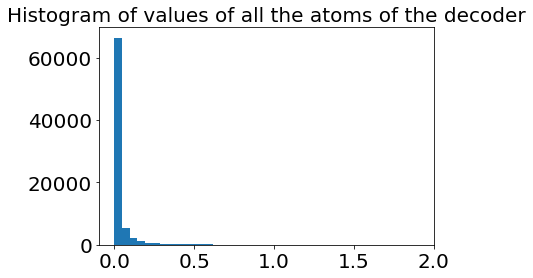

In [23]:
i = np.arange(8)[sparsity_weights==0.0001][0]
j = np.arange(4)[sparsity_objectives==0.01][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_13_dim100_KLdivSum_0.0001_0.01_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


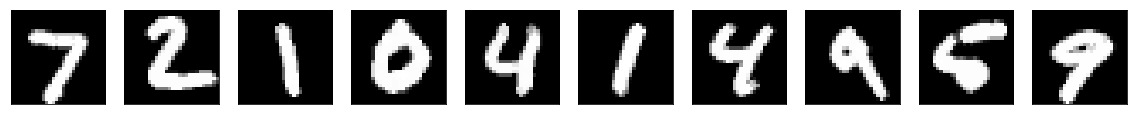

Dilatation of the reconstructions


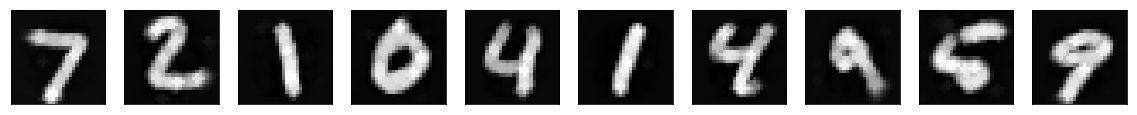

Original images and max-approximation to dilatation
Max-approx error to original:  0.7929351515769959  - Max-approx error to reconstruction:  0.7822708057403565


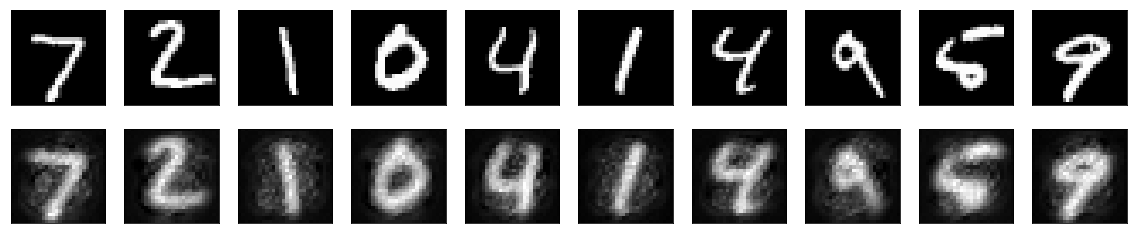

Dilated of the atom images of the decoder


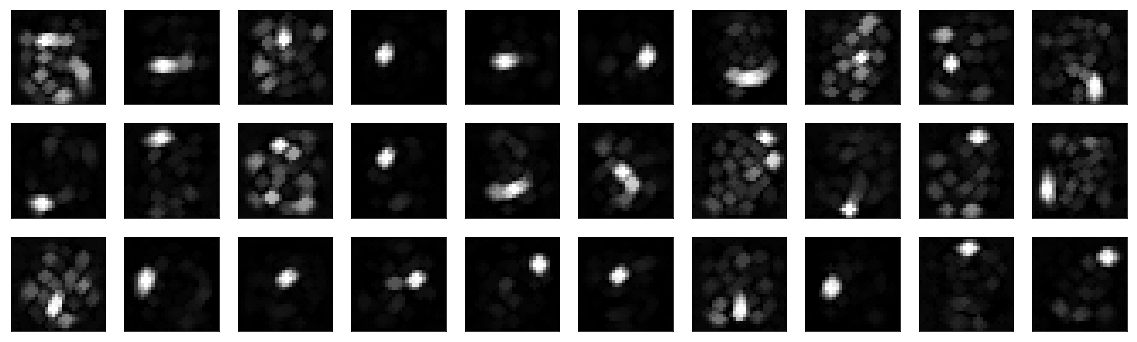

In [24]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.2 Sparsity_weight = 0.0005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.007941065087914466


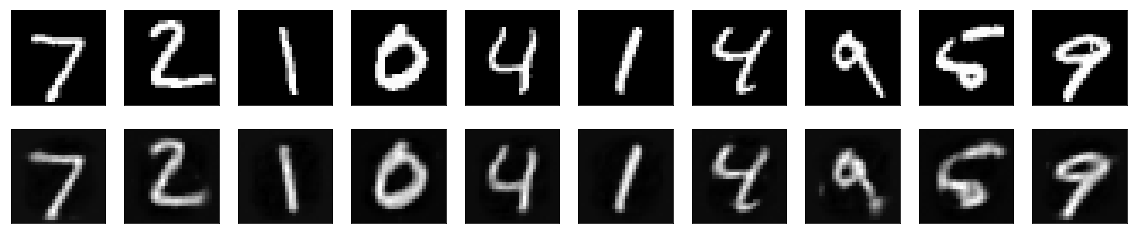

Histograms of the encodings - Sparsity (Hoyer):  0.5430342555046082


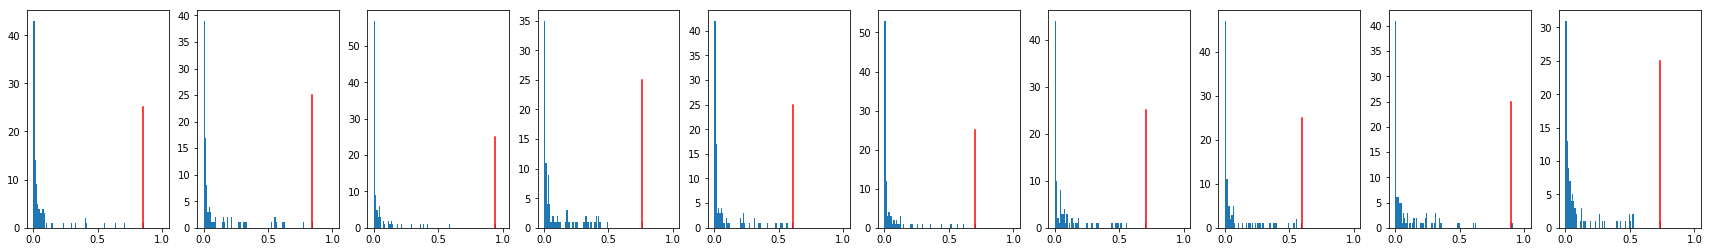

Atom images of the decoder


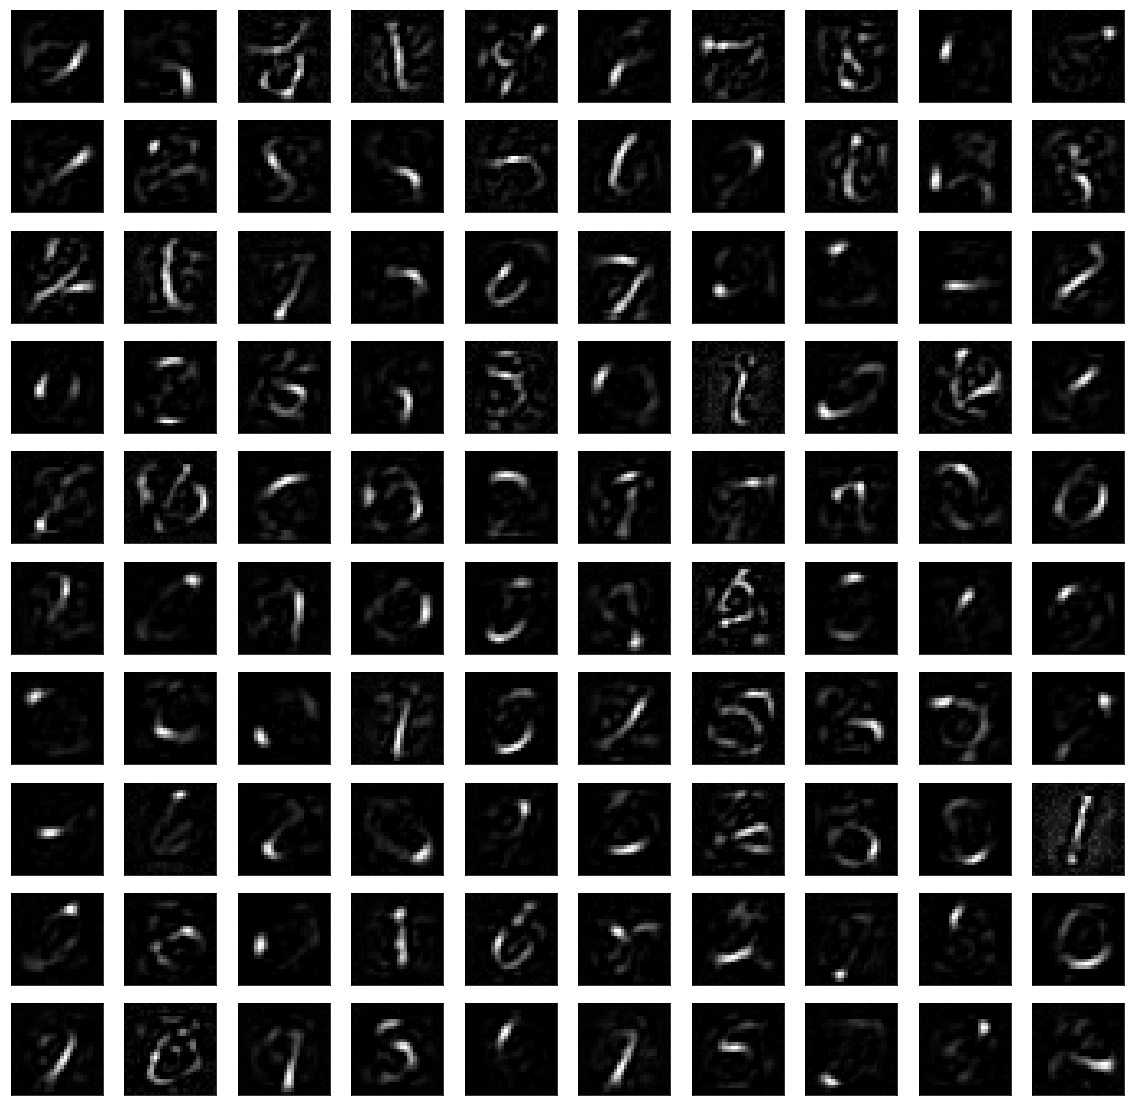

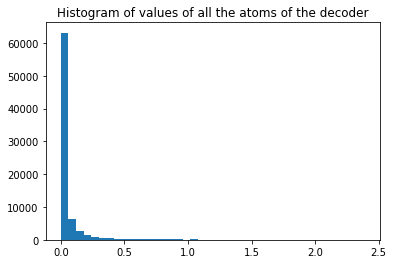

In [5]:
sp_o = 0.01
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_13_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=100)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


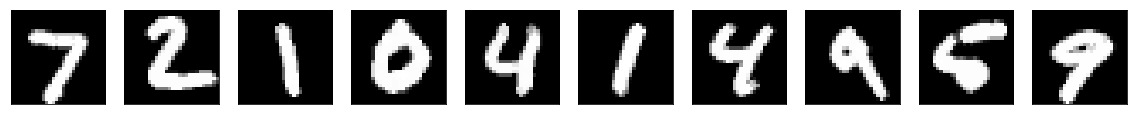

Dilatation of the reconstructions


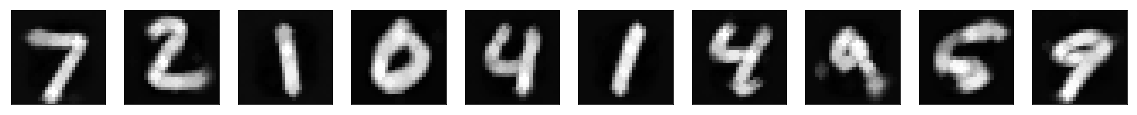

Original images and max-approximation to dilatation
Max-approx error to original:  0.29198162240982056  - Max-approx error to reconstruction:  0.2948429047584534


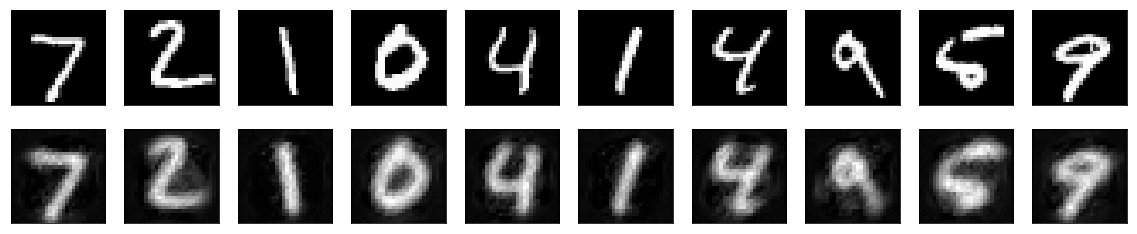

Dilated of the atom images of the decoder


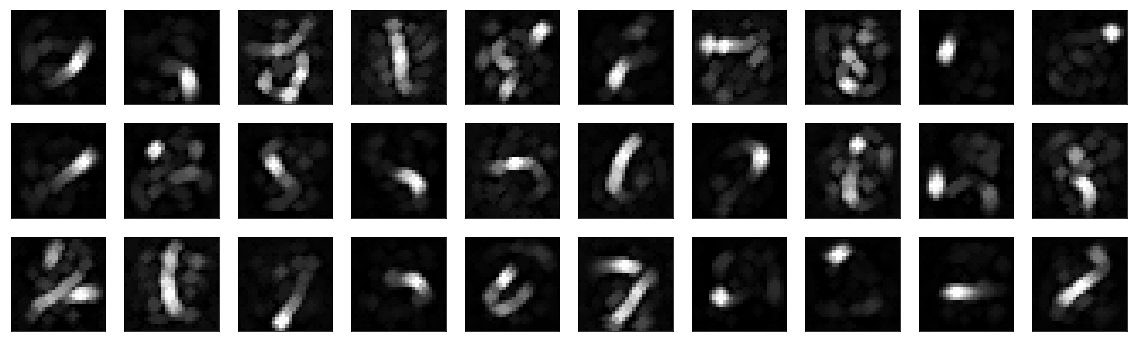

In [26]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity_weight = 0.001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.009443202304840088


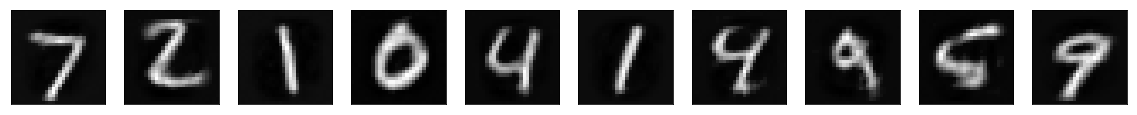

Histograms of the encodings - Sparsity (Hoyer):  0.6061040163040161


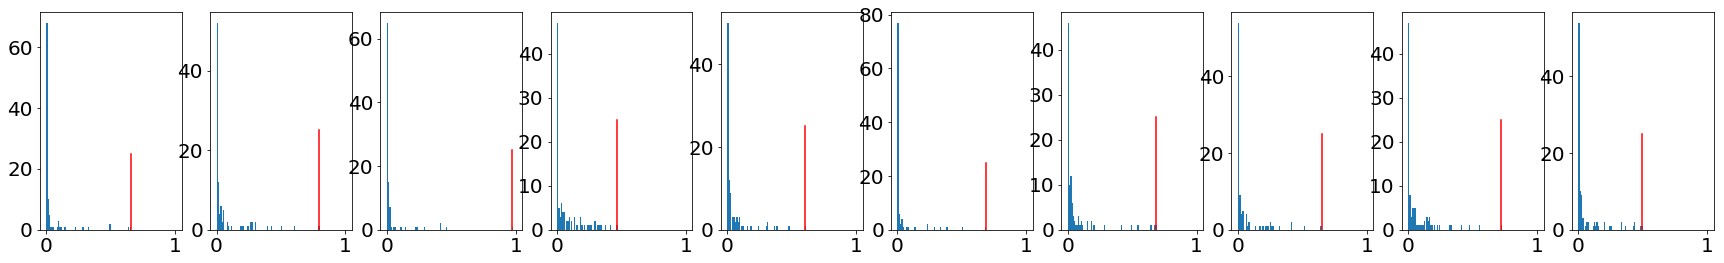

Atom images of the decoder


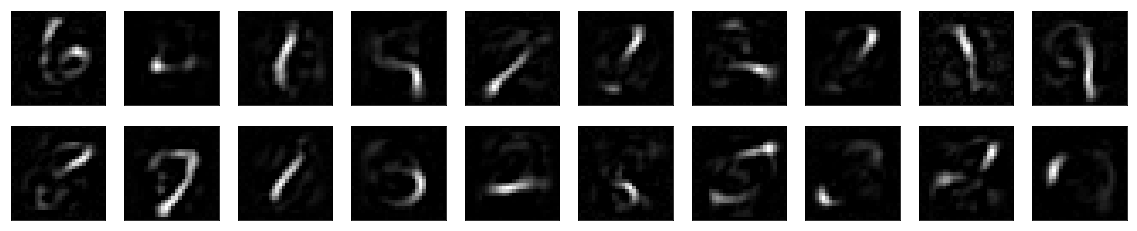

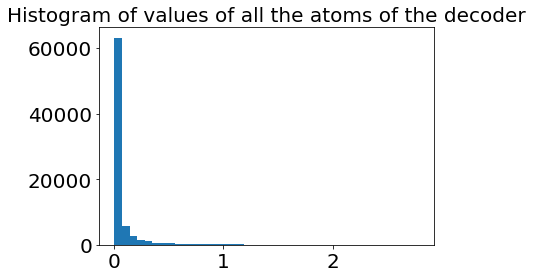

In [29]:
sp_o = 0.01
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_13_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


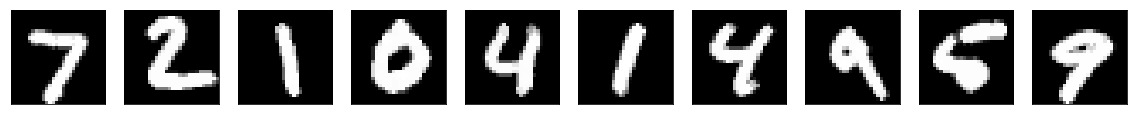

Dilatation of the reconstructions


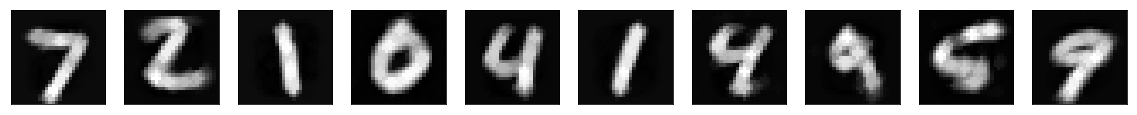

Original images and max-approximation to dilatation
Max-approx error to original:  0.1825170979499817  - Max-approx error to reconstruction:  0.17140579900741576


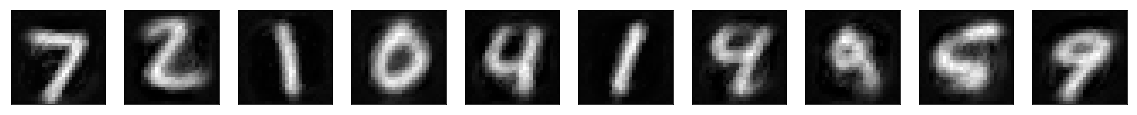

Dilated of the atom images of the decoder


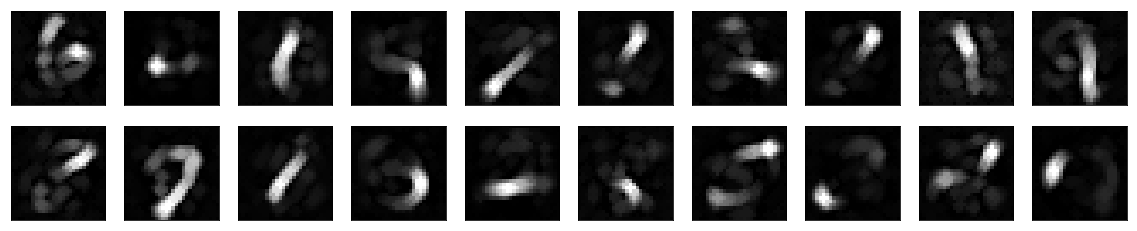

In [30]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

## 1.4 Sparsity_weight = 0.005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.015655771078169345


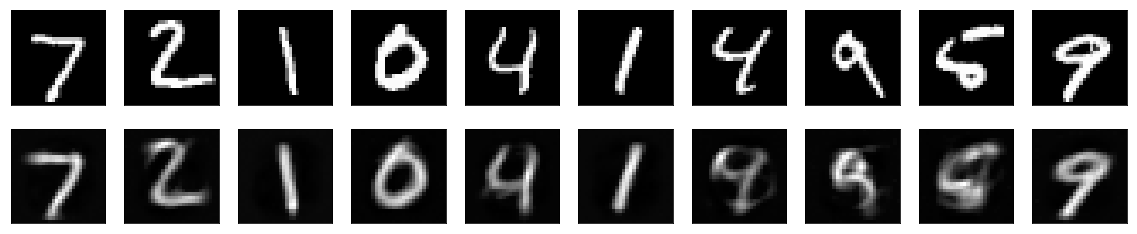

Histograms of the encodings - Sparsity (Hoyer):  0.7402779459953308


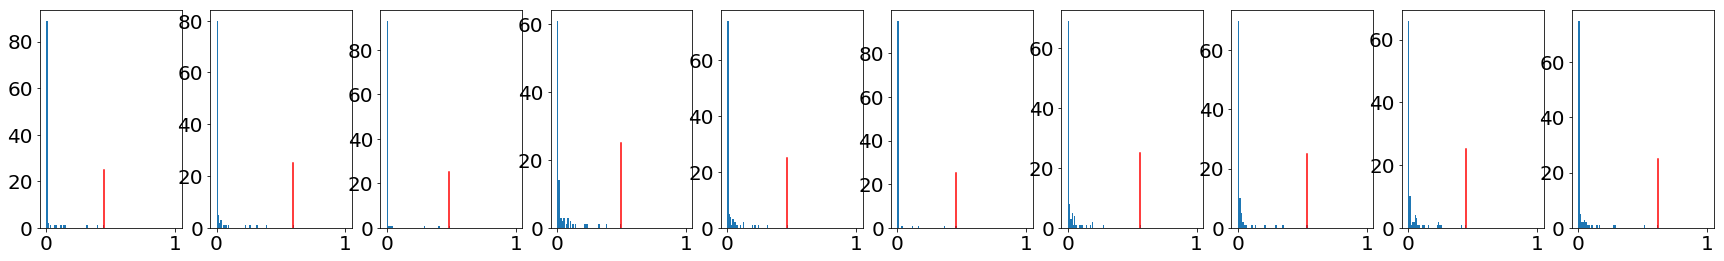

Atom images of the decoder


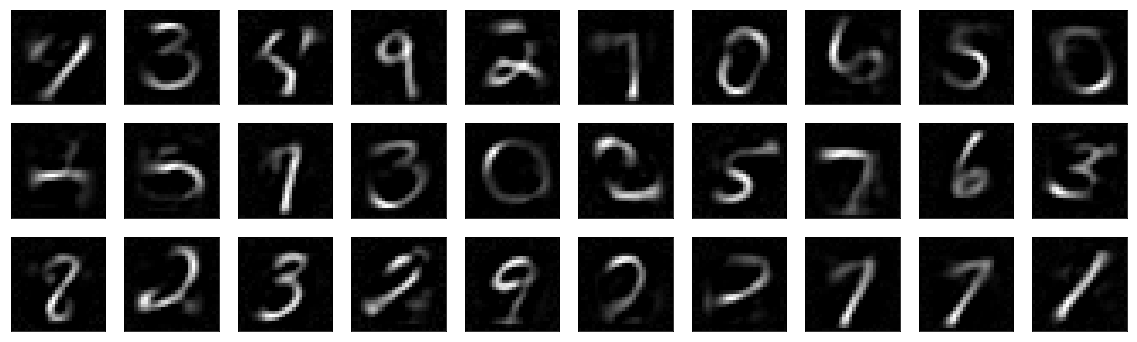

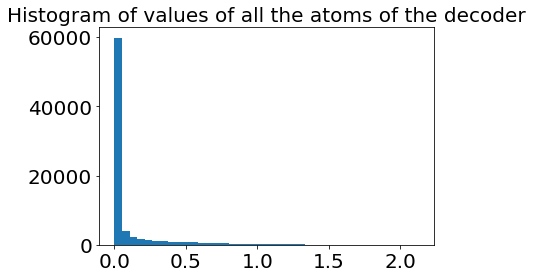

In [31]:
sp_o = 0.01
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


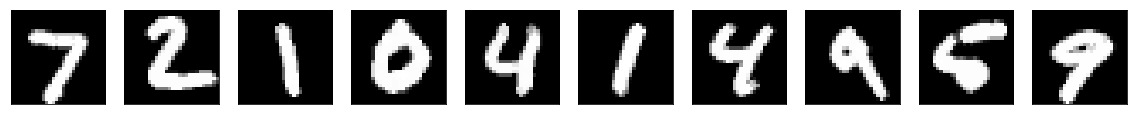

Dilatation of the reconstructions


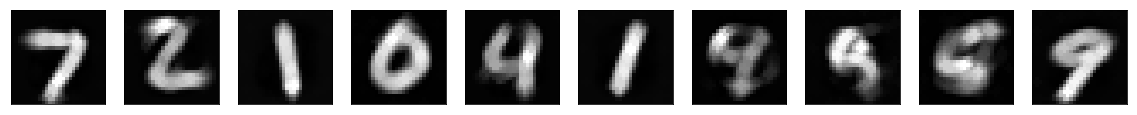

Original images and max-approximation to dilatation
Max-approx error to original:  0.05724421575069427  - Max-approx error to reconstruction:  0.04442667465209961


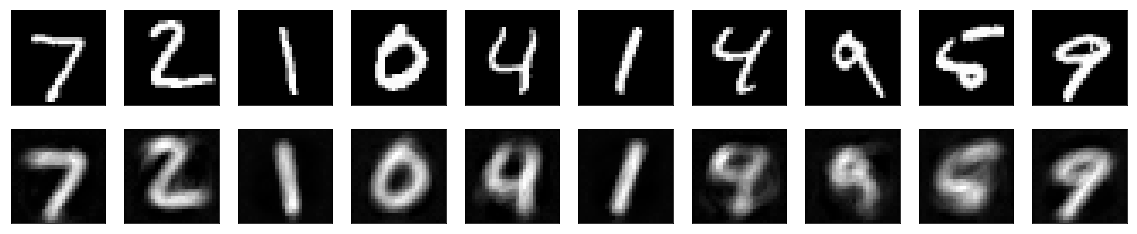

Dilated of the atom images of the decoder


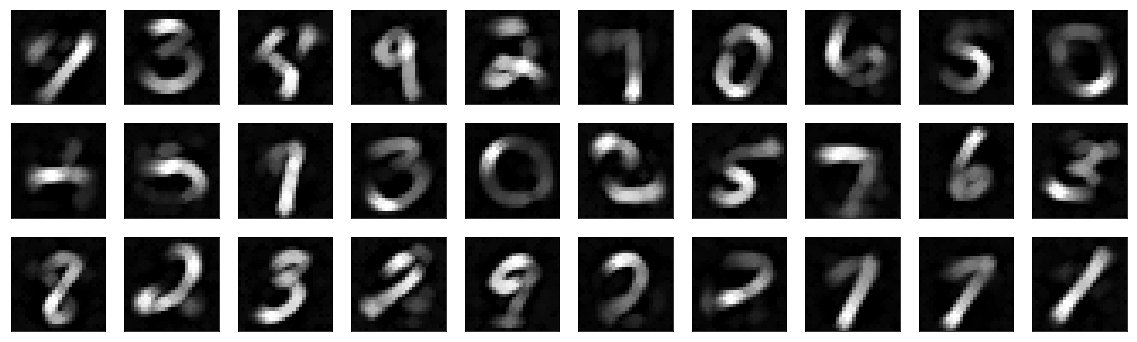

In [32]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.5 Sparsity_weight = 0.01 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.018468098998069764


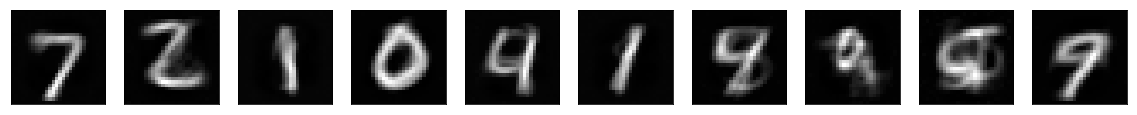

Histograms of the encodings - Sparsity (Hoyer):  0.786300778388977


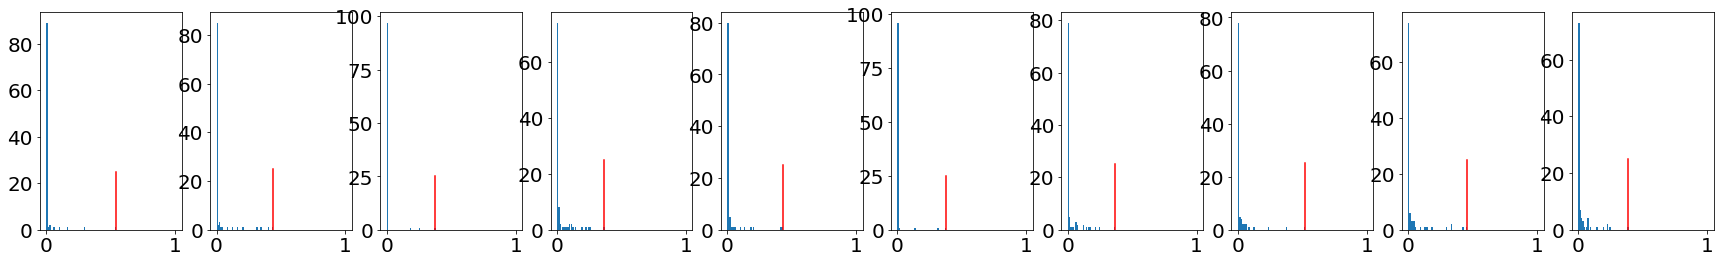

Atom images of the decoder


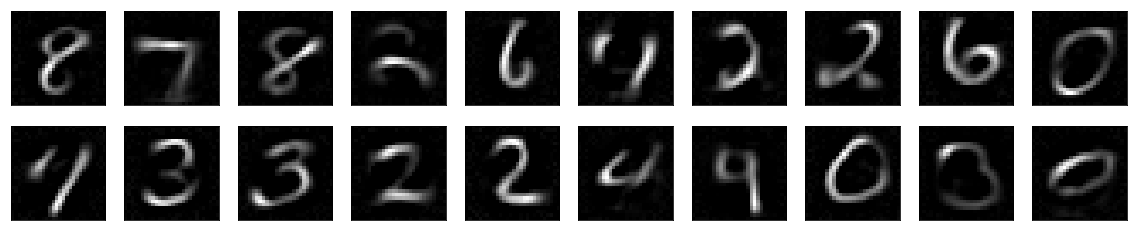

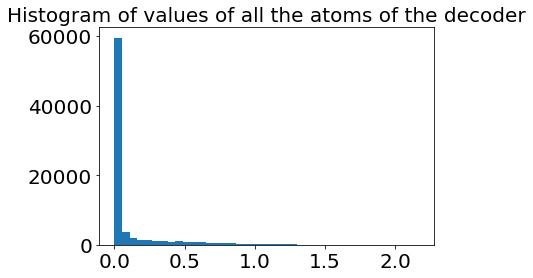

In [33]:
sp_o = 0.01
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


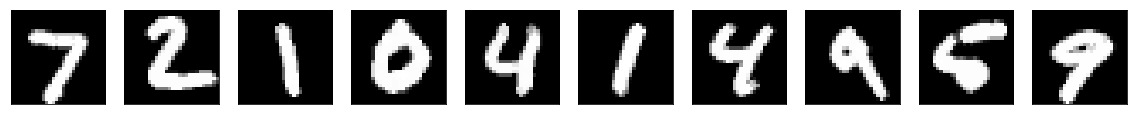

Dilatation of the reconstructions


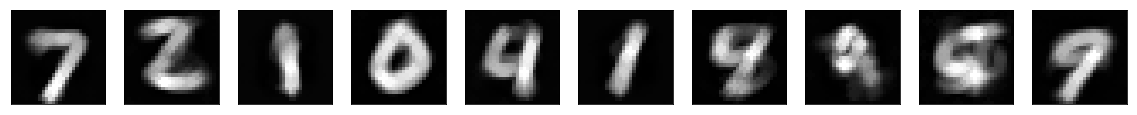

Original images and max-approximation to dilatation
Max-approx error to original:  0.04574420764446258  - Max-approx error to reconstruction:  0.02736281063556671


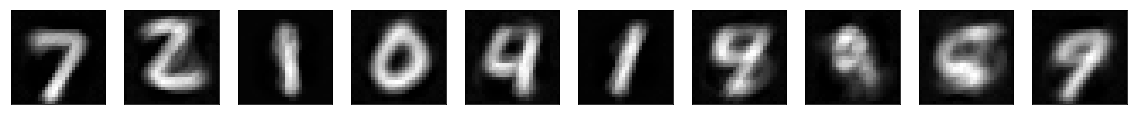

Dilated of the atom images of the decoder


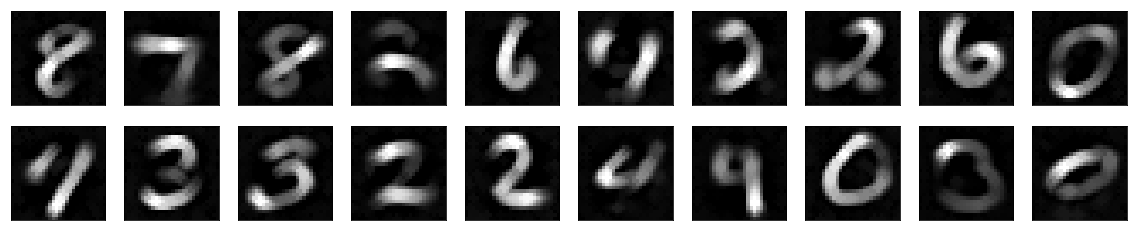

In [34]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

## 1.6 Sparsity_weight = 0.05 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.024335432112216948


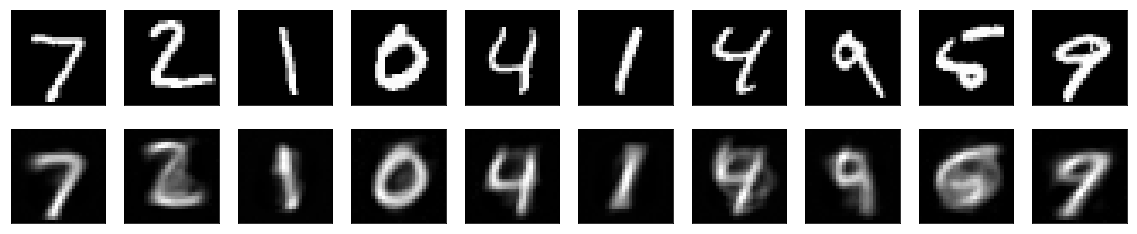

Histograms of the encodings - Sparsity (Hoyer):  0.8308718800544739


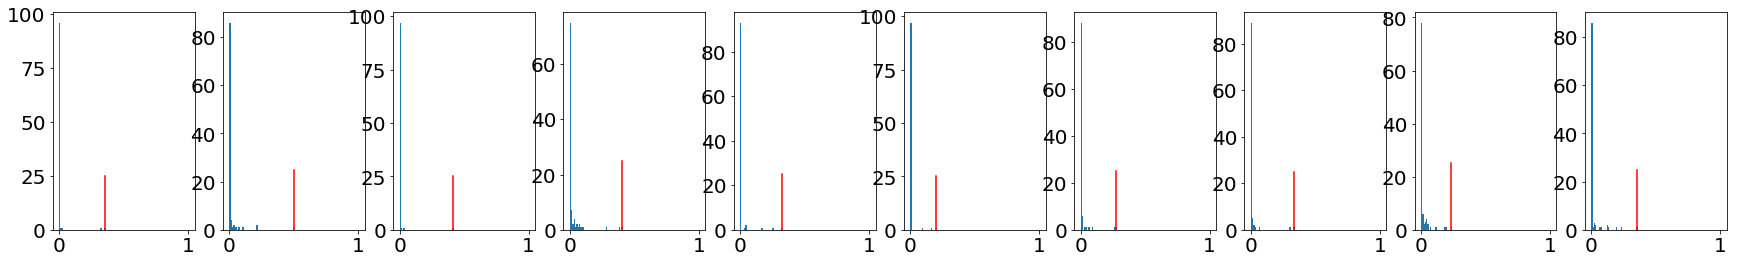

Atom images of the decoder


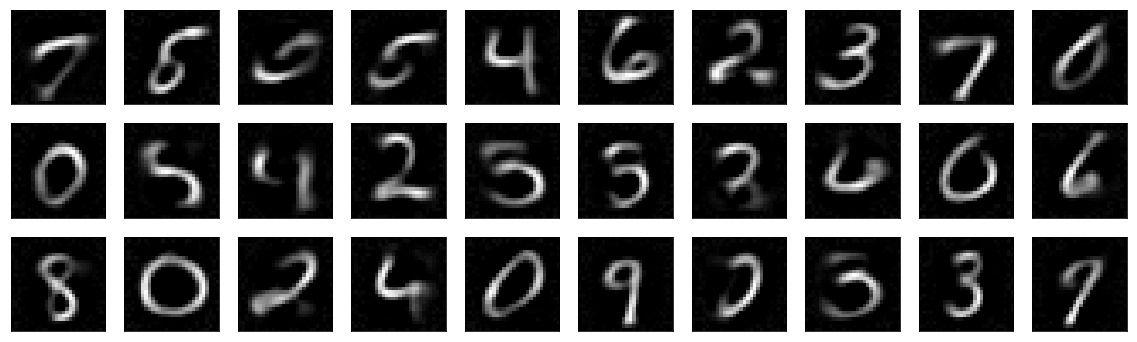

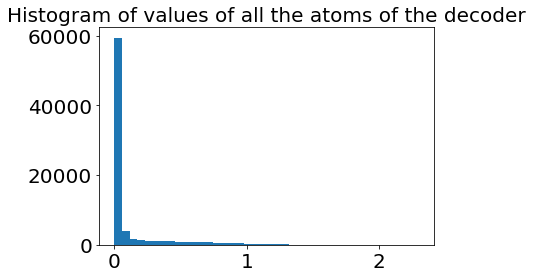

In [35]:
sp_o = 0.01
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


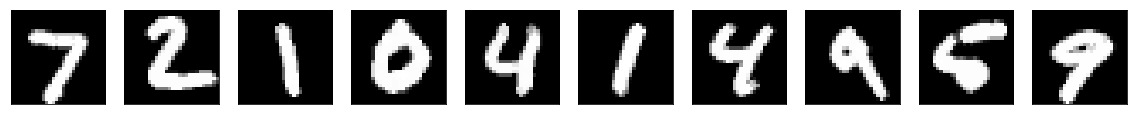

Dilatation of the reconstructions


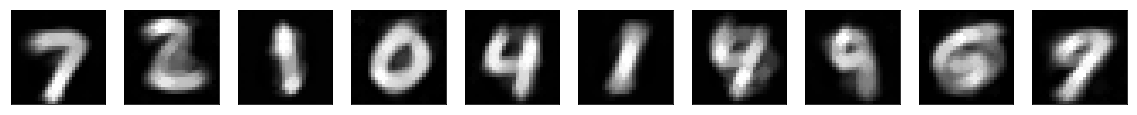

Original images and max-approximation to dilatation
Max-approx error to original:  0.04678134306669235  - Max-approx error to reconstruction:  0.020820197582244872


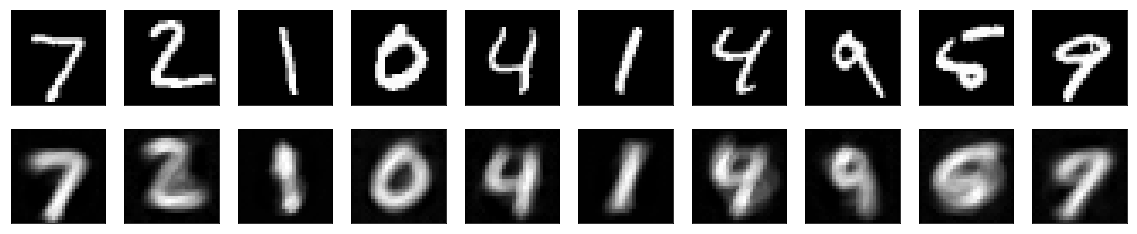

Dilated of the atom images of the decoder


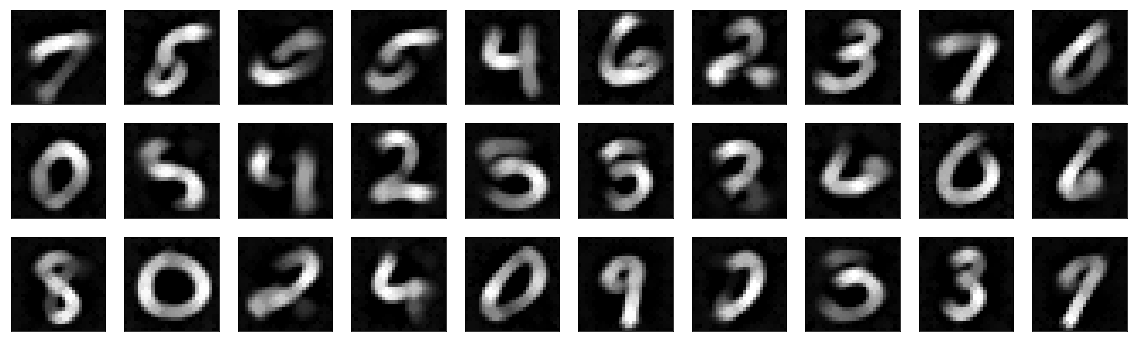

In [36]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.7 Sparsity_weight = 0.1 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.026993629086017608


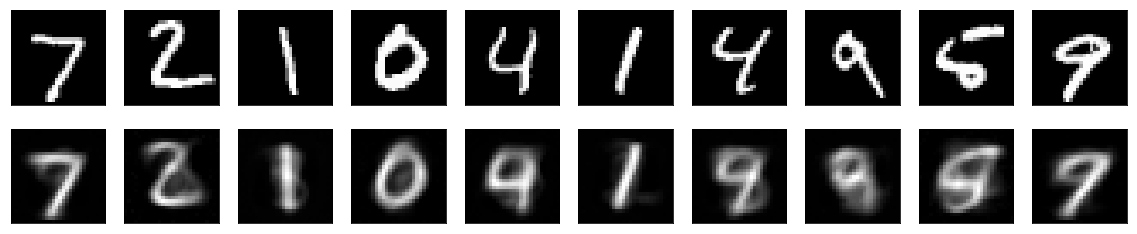

Histograms of the encodings - Sparsity (Hoyer):  0.8304136991500854


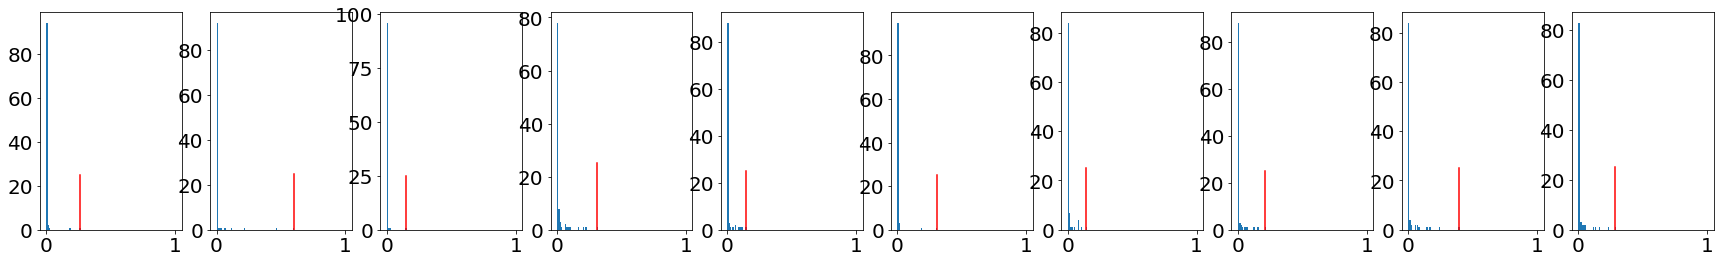

Atom images of the decoder


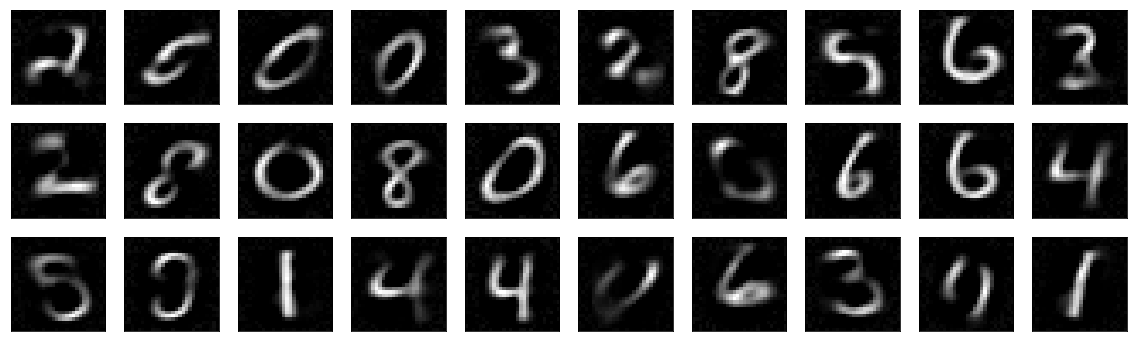

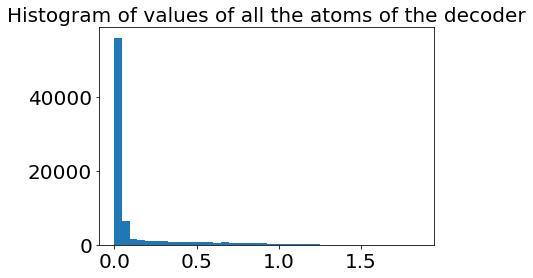

In [37]:
sp_o = 0.01
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


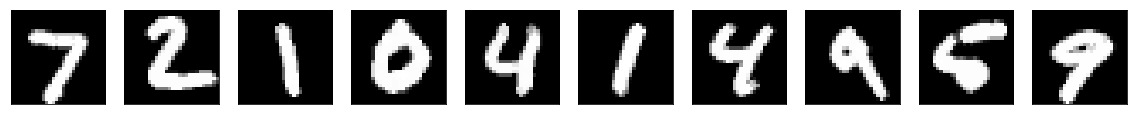

Dilatation of the reconstructions


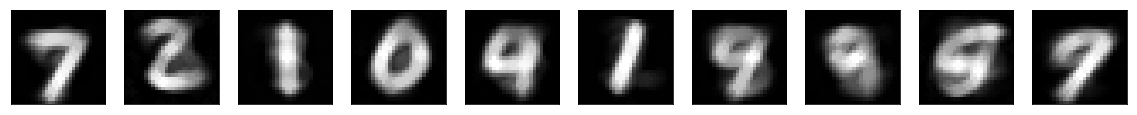

Original images and max-approximation to dilatation
Max-approx error to original:  0.058647762072086336  - Max-approx error to reconstruction:  0.029373944574594496


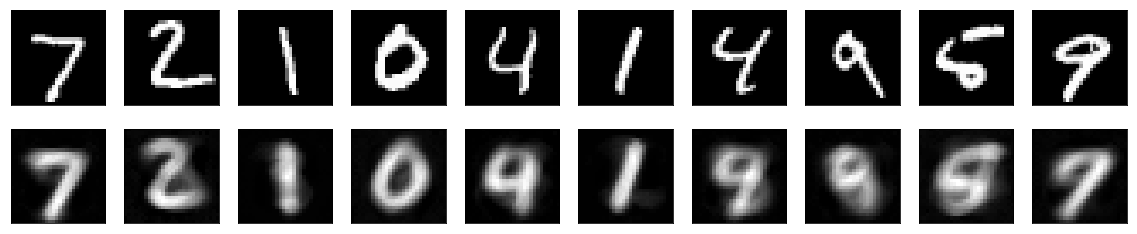

Dilated of the atom images of the decoder


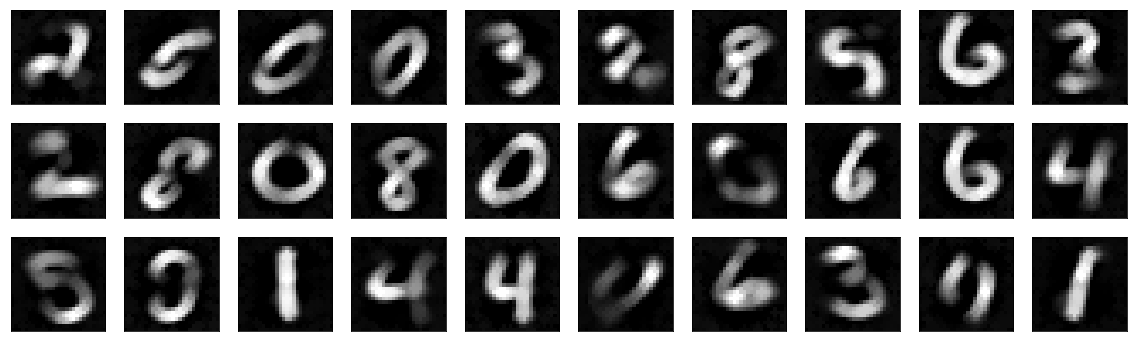

In [38]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.8 Sparsity_weight = 0.5 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.035460150307416914


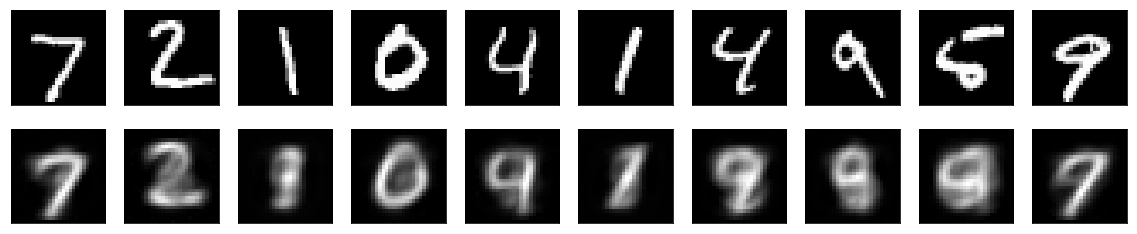

Histograms of the encodings - Sparsity (Hoyer):  0.7526288032531738


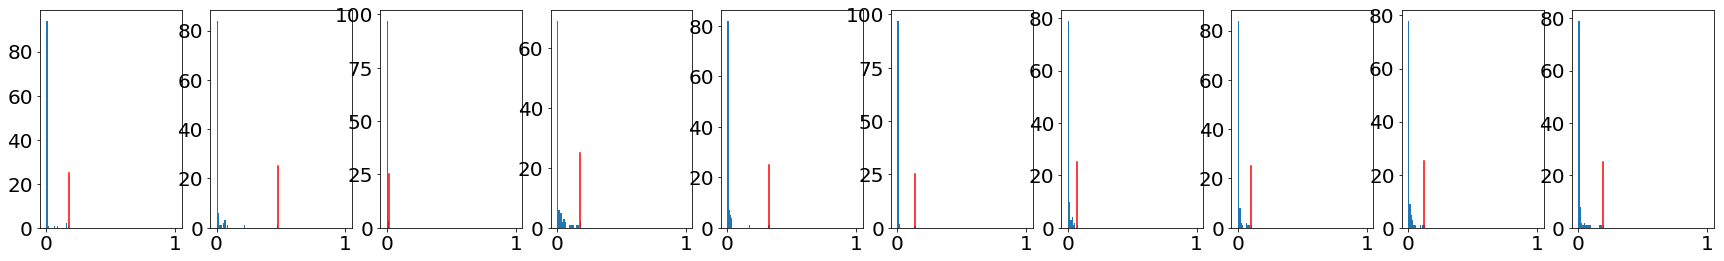

Atom images of the decoder


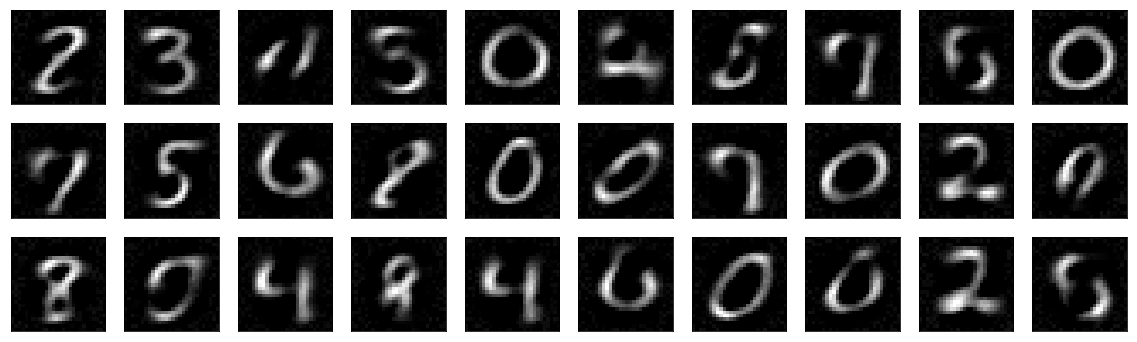

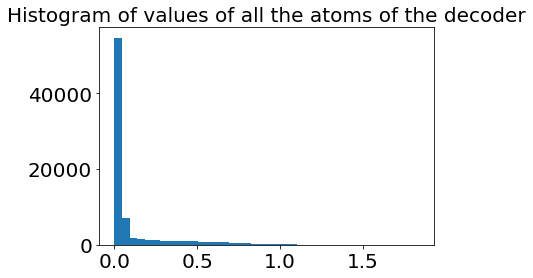

In [40]:
sp_o = 0.01
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


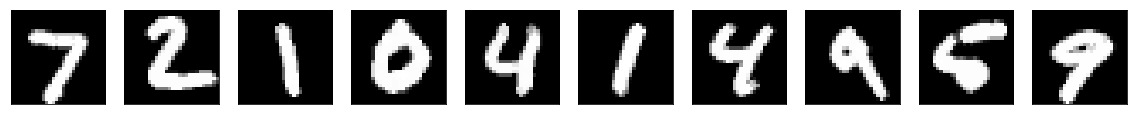

Dilatation of the reconstructions


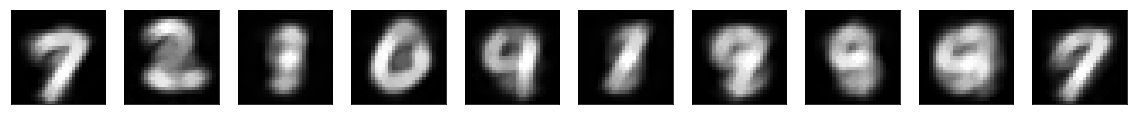

Original images and max-approximation to dilatation
Max-approx error to original:  0.13327086234092714  - Max-approx error to reconstruction:  0.09089891760349274


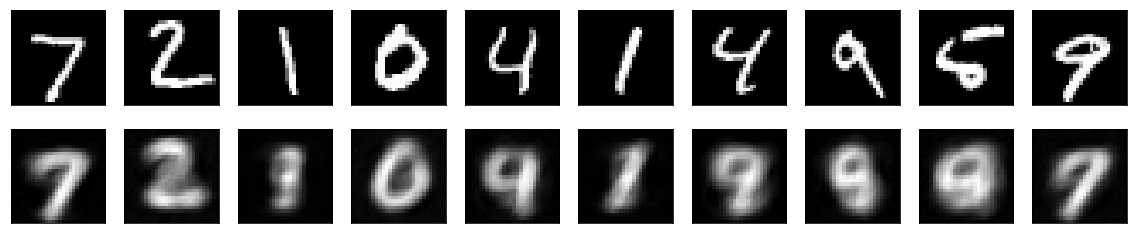

Dilated of the atom images of the decoder


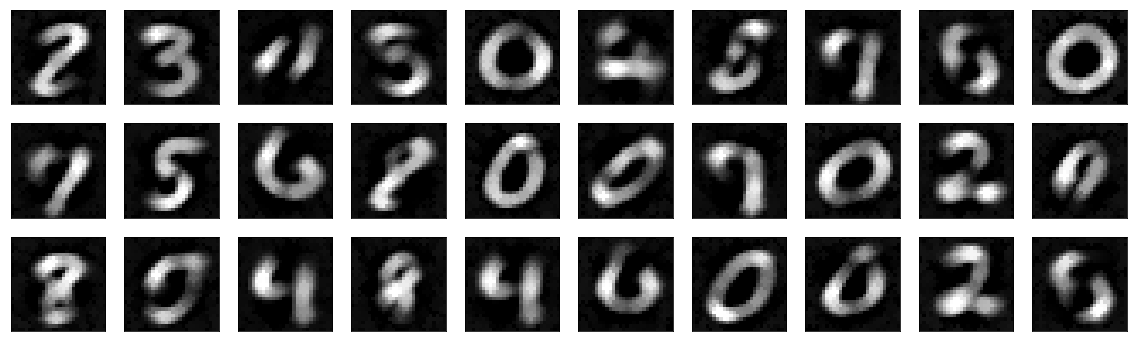

In [41]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 2. Sparsity_Objective = 0.05

## 2.1 Sparsity_weight = 0.0001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.005233198644220829


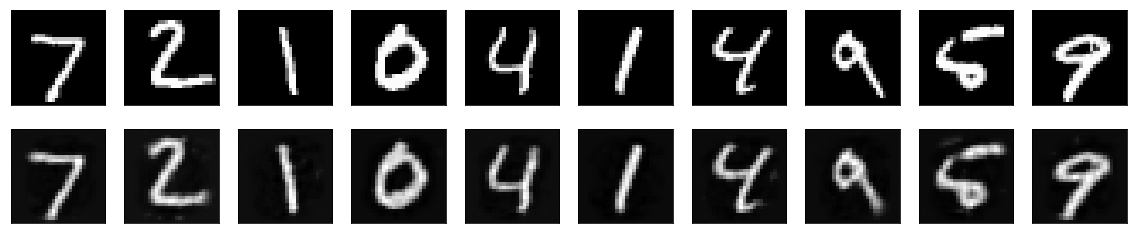

Histograms of the encodings - Sparsity (Hoyer):  0.35170629620552063


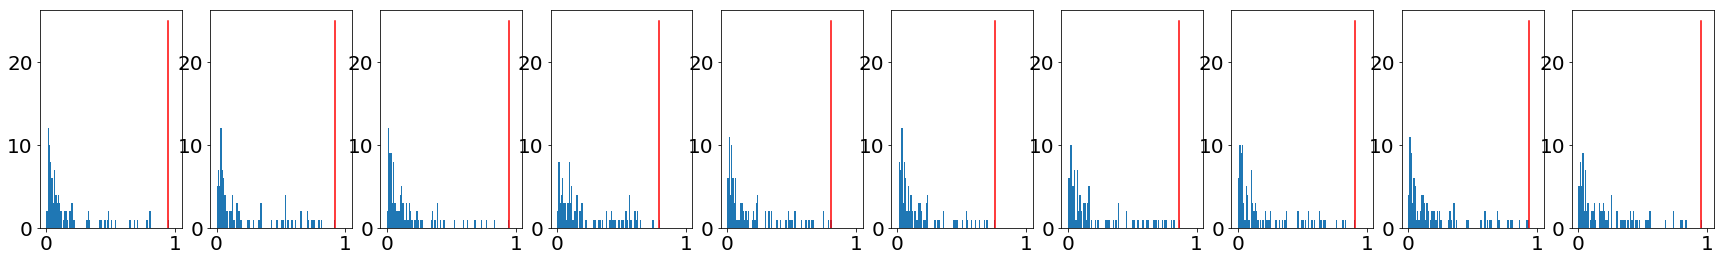

Atom images of the decoder


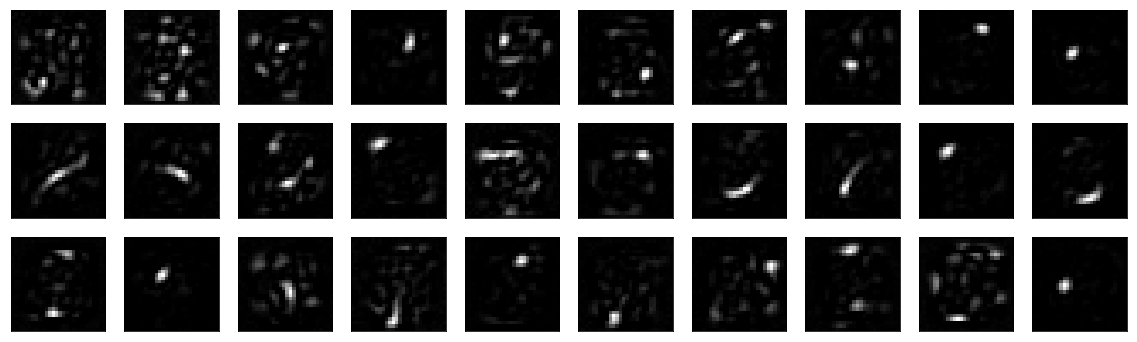

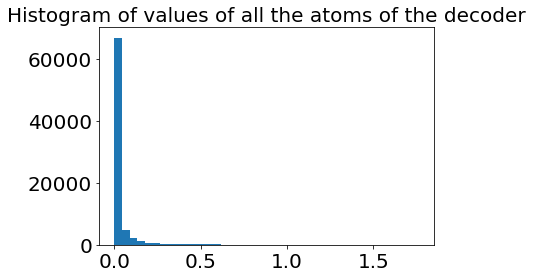

In [42]:
sp_o = 0.05
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_13_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


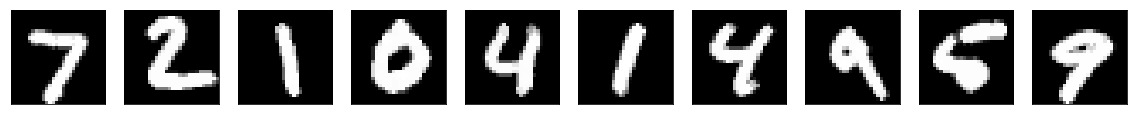

Dilatation of the reconstructions


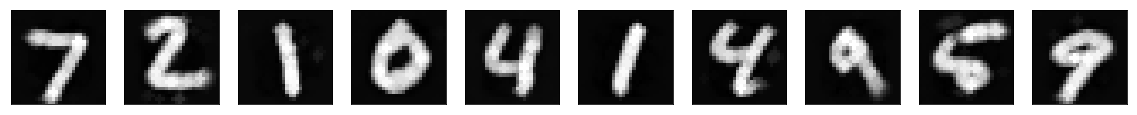

Original images and max-approximation to dilatation
Max-approx error to original:  0.9514296117782592  - Max-approx error to reconstruction:  0.9281941080093383


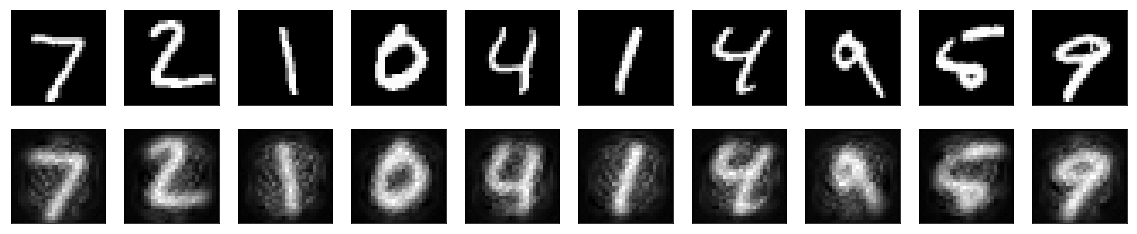

Dilated of the atom images of the decoder


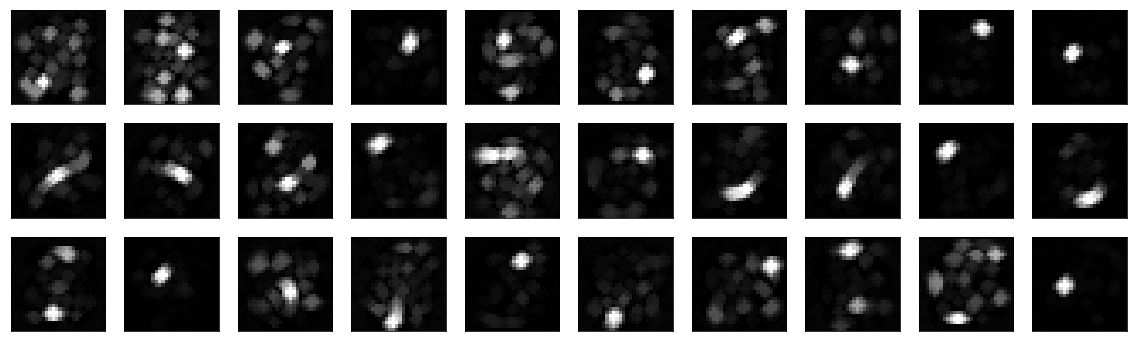

In [43]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.2 Sparsity_weight = 0.0005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.00705890688970685


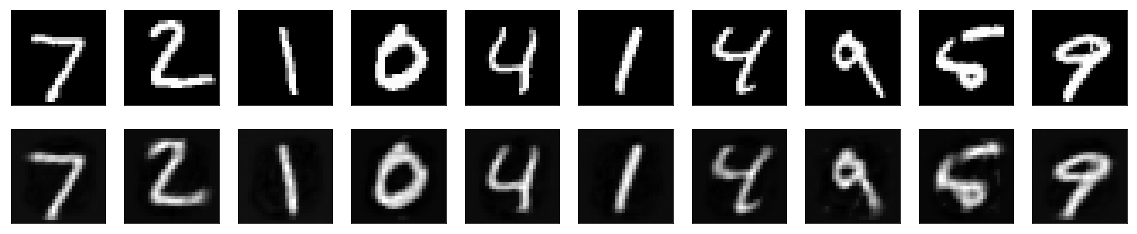

Histograms of the encodings - Sparsity (Hoyer):  0.4888749420642853


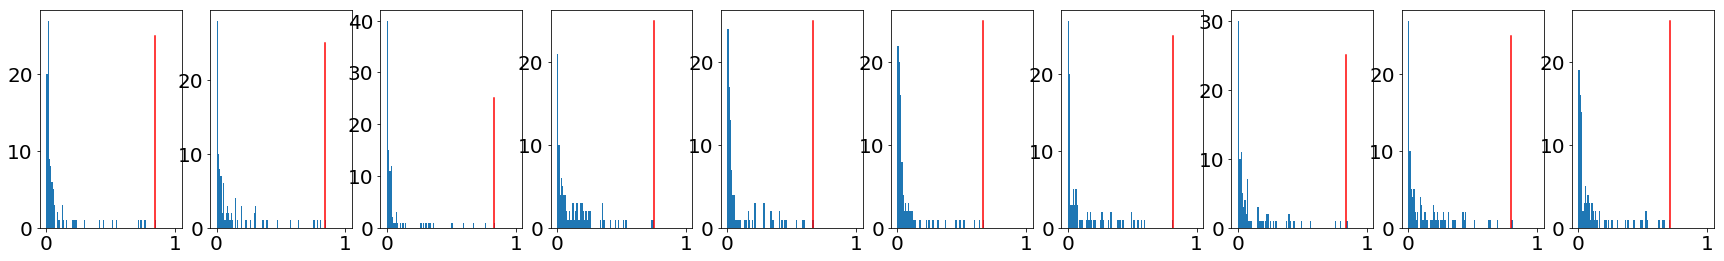

Atom images of the decoder


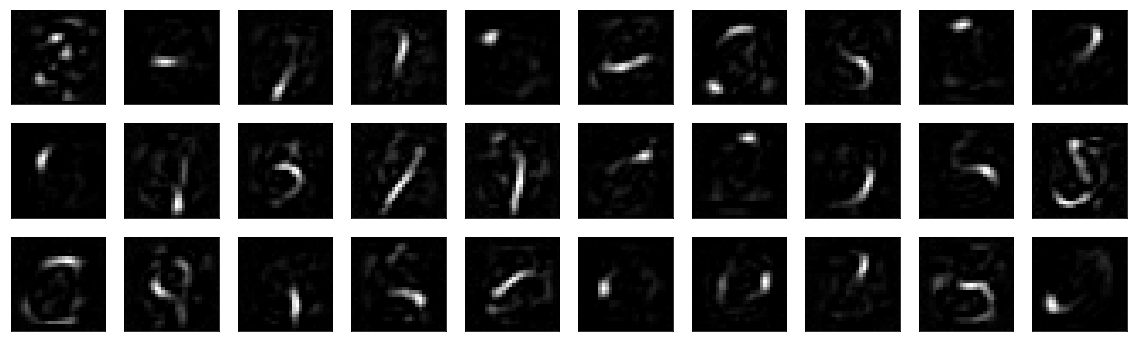

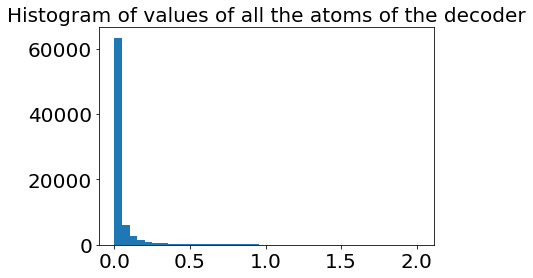

In [45]:
sp_o = 0.05
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_13_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


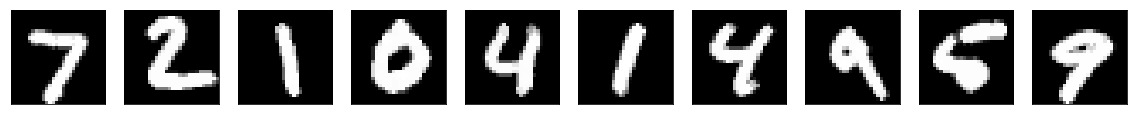

Dilatation of the reconstructions


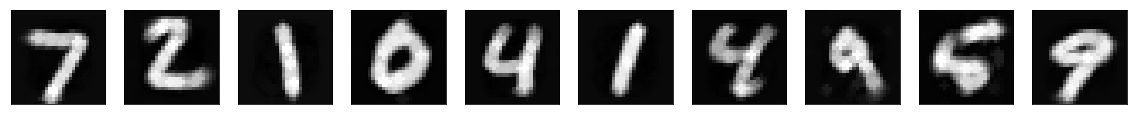

Original images and max-approximation to dilatation
Max-approx error to original:  0.43007483224868776  - Max-approx error to reconstruction:  0.4023853844642639


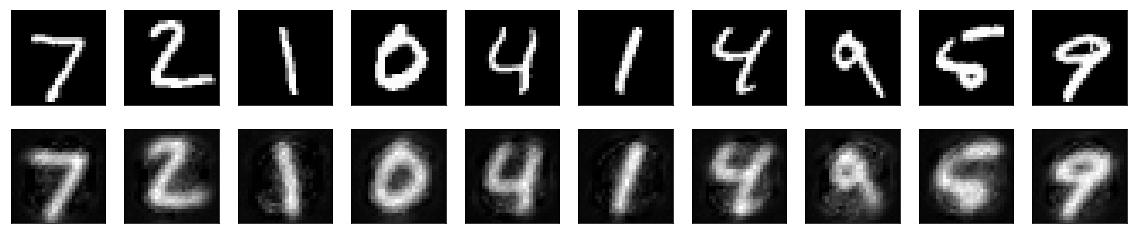

Dilated of the atom images of the decoder


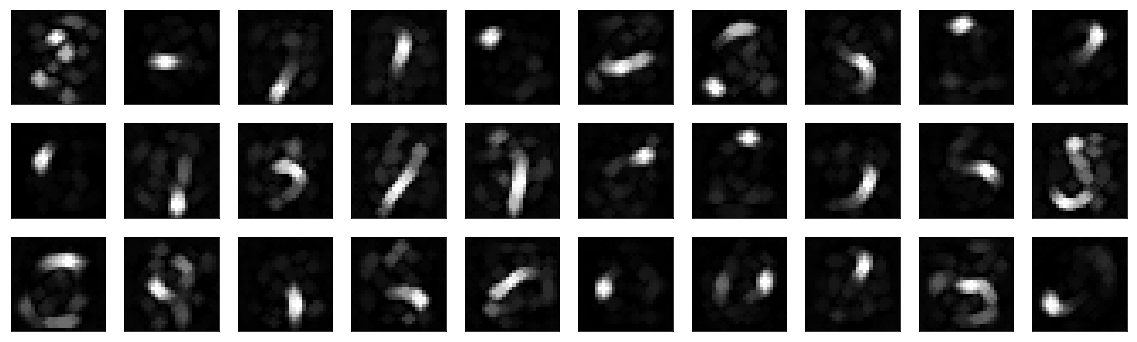

In [46]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.3 Sparsity_weight = 0.001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.007848508796095848


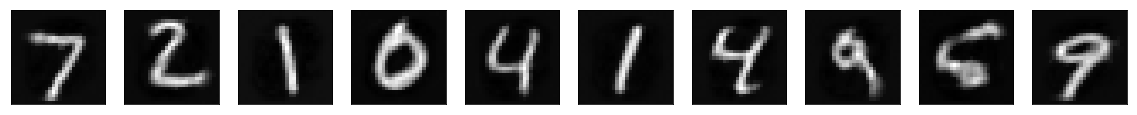

Histograms of the encodings - Sparsity (Hoyer):  0.5381872653961182


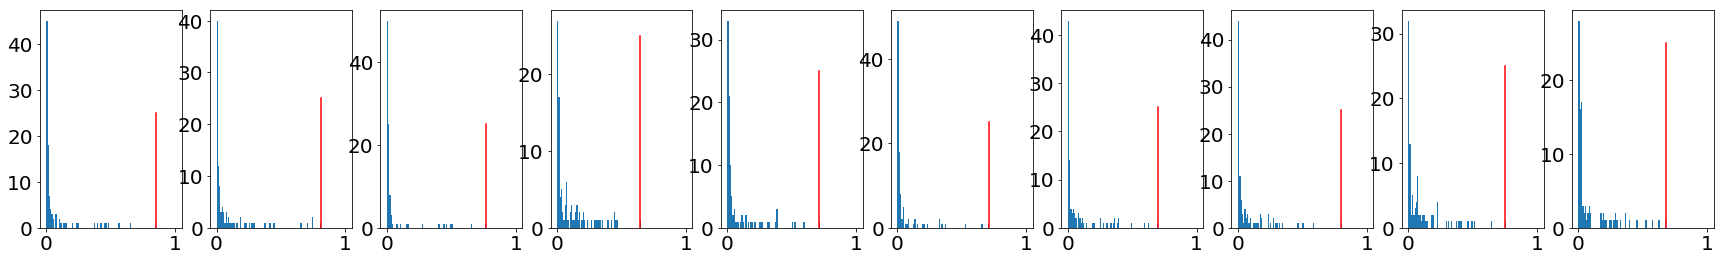

Atom images of the decoder


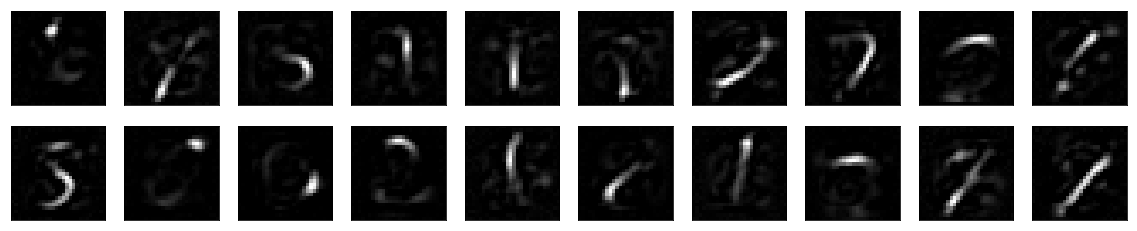

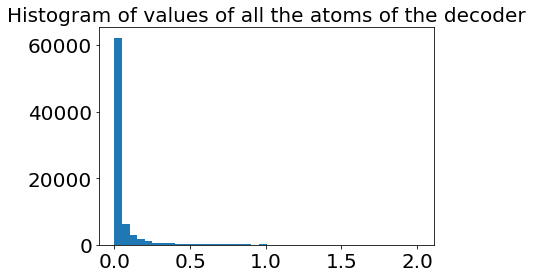

In [47]:
sp_o = 0.05
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


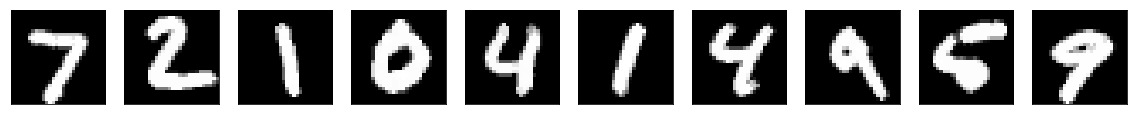

Dilatation of the reconstructions


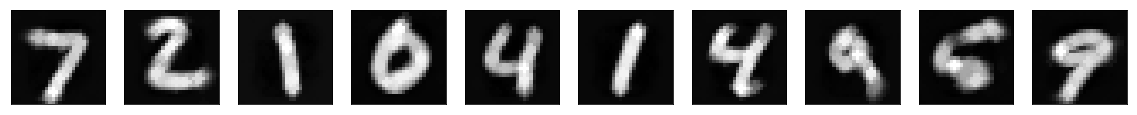

Original images and max-approximation to dilatation
Max-approx error to original:  0.2878965256214142  - Max-approx error to reconstruction:  0.26887501935958863


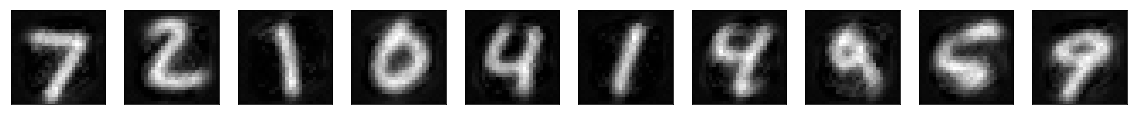

Dilated of the atom images of the decoder


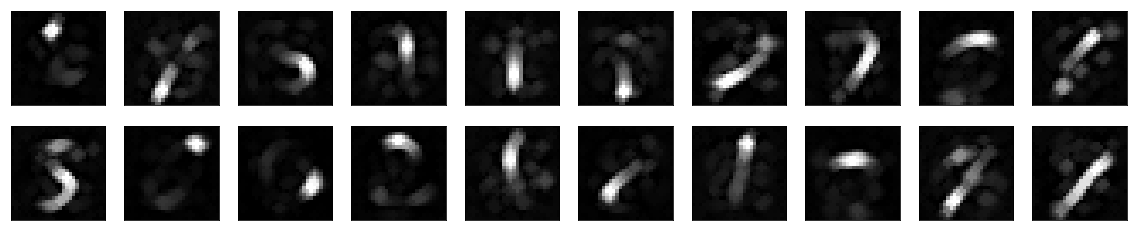

In [48]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small,plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

## 2.4 Sparsity_weight = 0.005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.009692410445213318


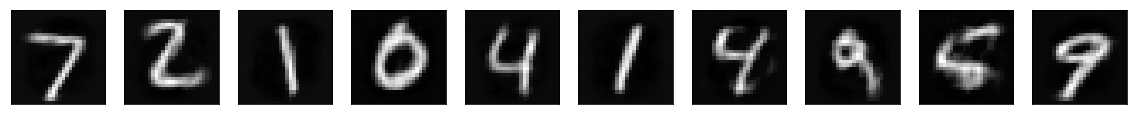

Histograms of the encodings - Sparsity (Hoyer):  0.5869216322898865


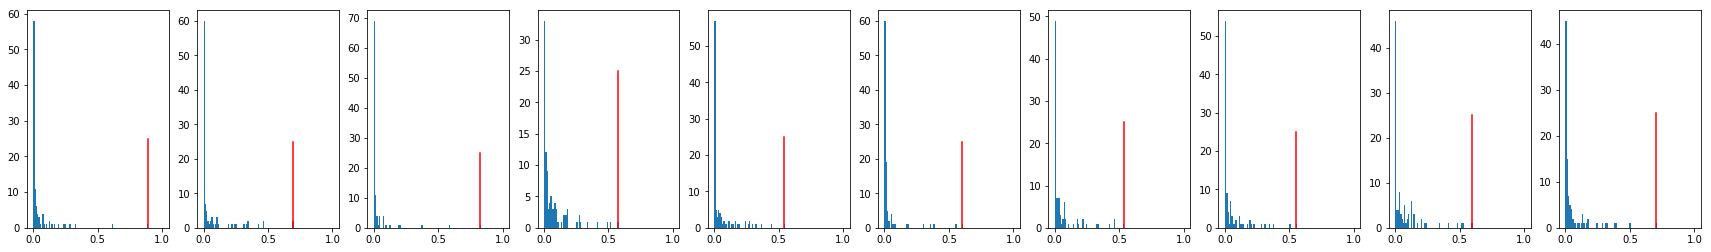

Atom images of the decoder


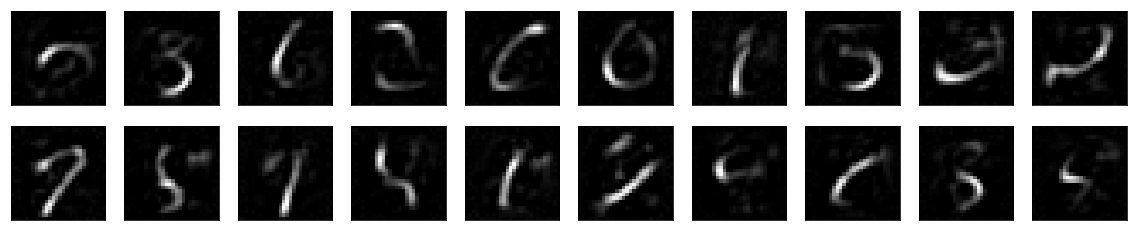

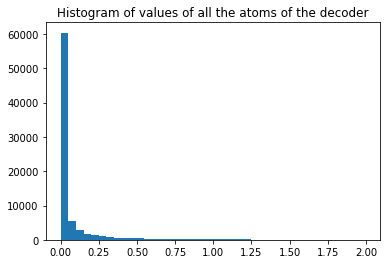

In [4]:
sp_o = 0.05
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


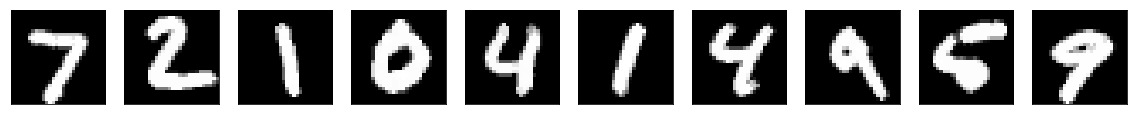

Dilatation of the reconstructions


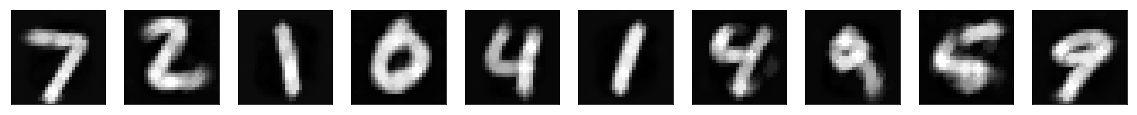

Original images and max-approximation to dilatation
Max-approx error to original:  0.1921191927909851  - Max-approx error to reconstruction:  0.17471901848316193


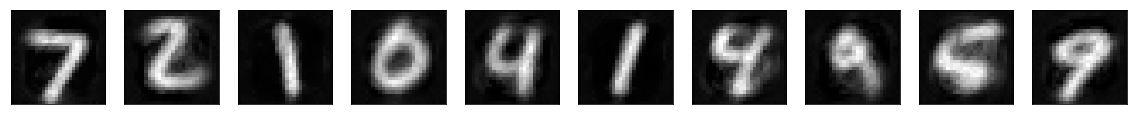

Dilated of the atom images of the decoder


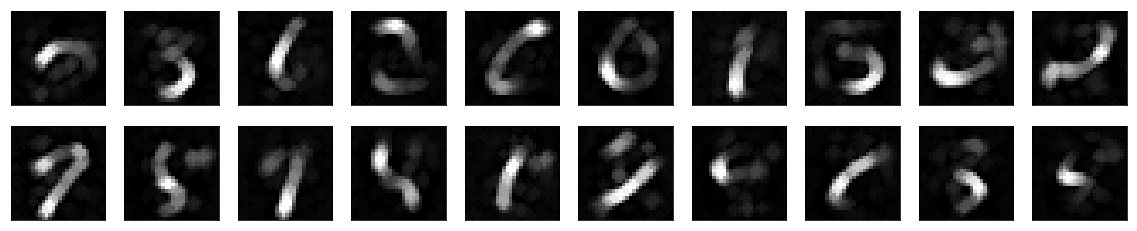

In [20]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

In [21]:
P = AE_dil.decoder.layers[1].get_weights()

In [22]:
W,B = P

In [23]:
P = [W, np.zeros(784)]

In [24]:
AE_dil.decoder.layers[1].set_weights(P)

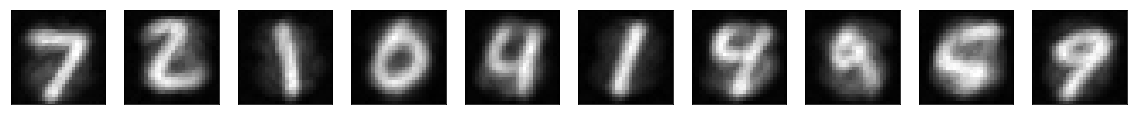

In [25]:
AE_dil.plot_reconstructions(x_small,plot_input=False)

## 2.5 Sparsity_weight = 0.01 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.010046073573827743


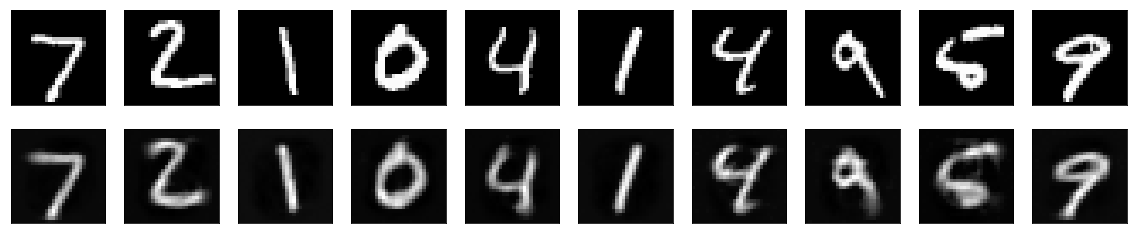

Histograms of the encodings - Sparsity (Hoyer):  0.5944191217422485


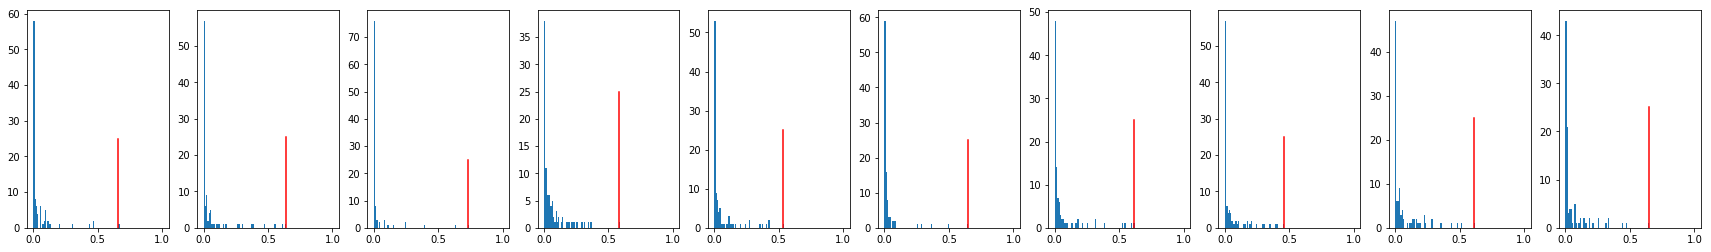

Atom images of the decoder


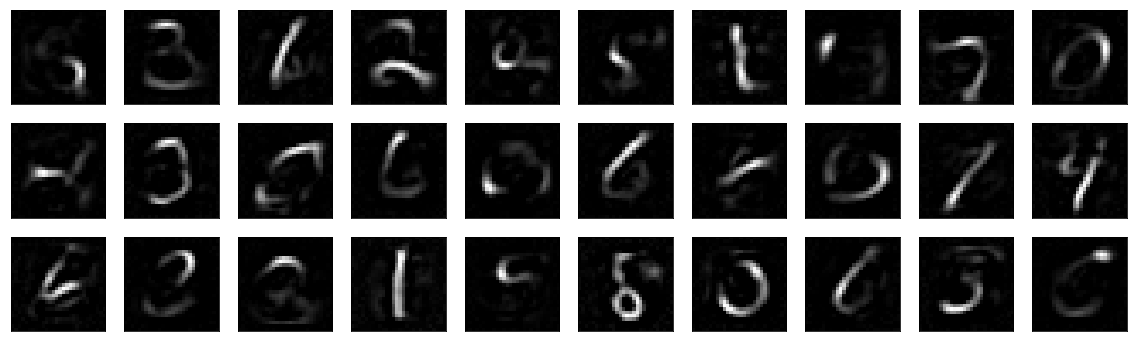

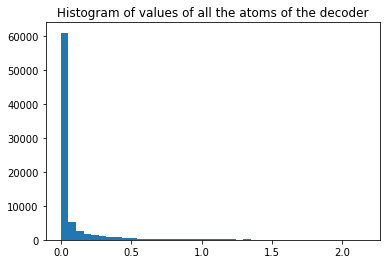

In [26]:
sp_o = 0.05
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


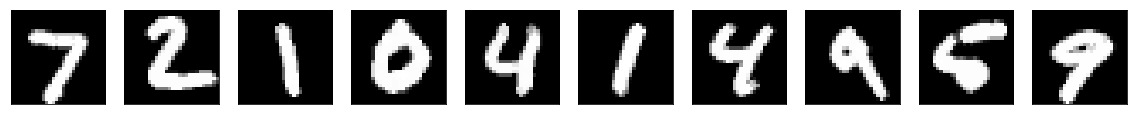

Dilatation of the reconstructions


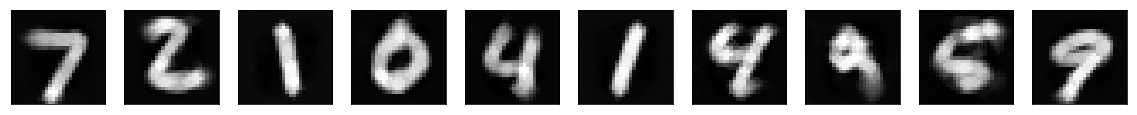

Original images and max-approximation to dilatation
Max-approx error to original:  0.1704462473154068  - Max-approx error to reconstruction:  0.15588775970935823


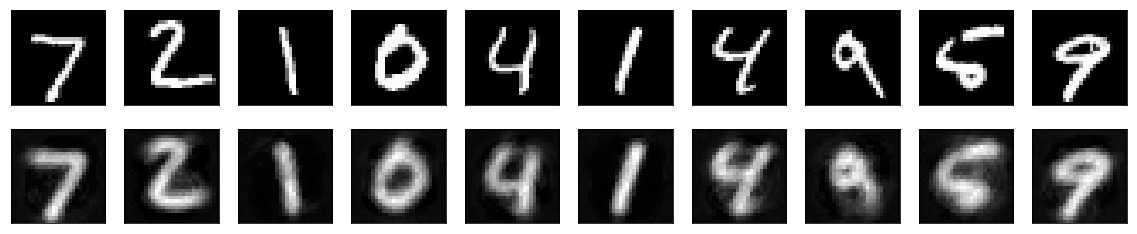

Dilated of the atom images of the decoder


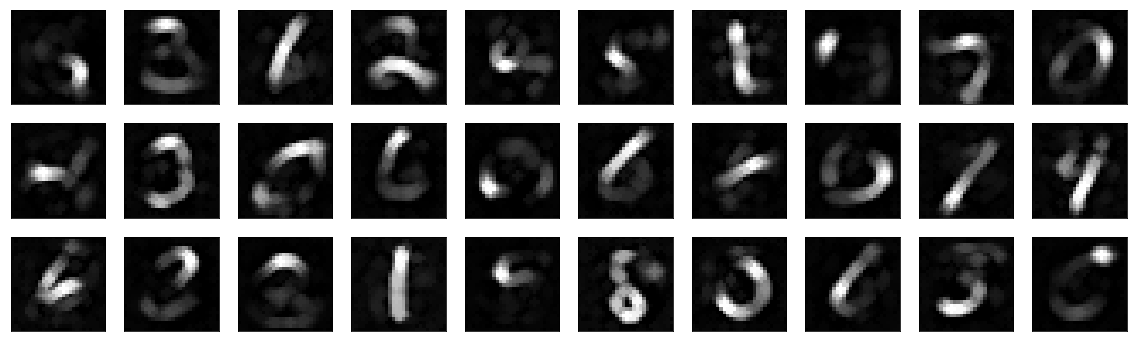

In [28]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.6 Sparsity_weight = 0.05 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.010331037884950638


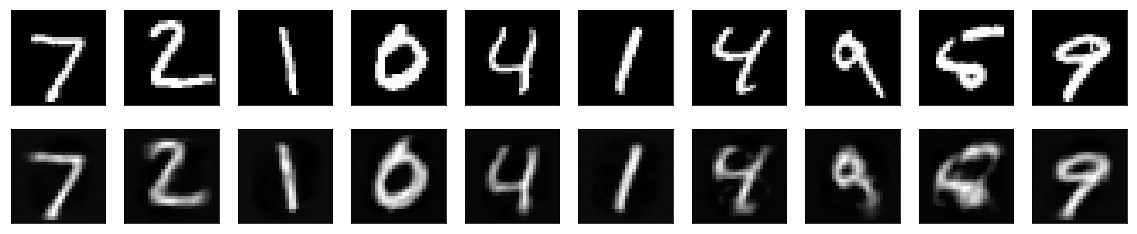

Histograms of the encodings - Sparsity (Hoyer):  0.5942497253417969


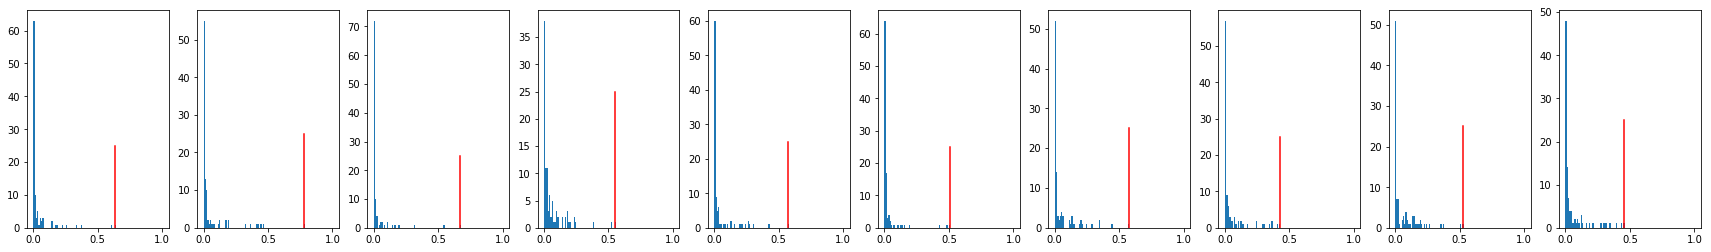

Atom images of the decoder


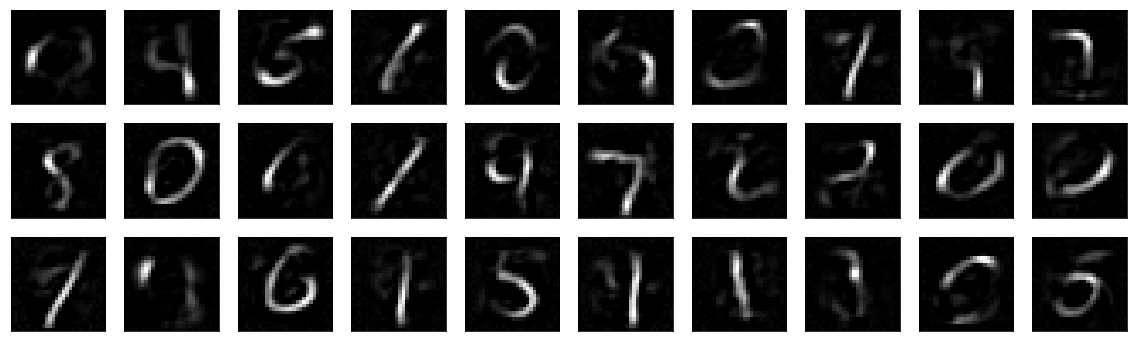

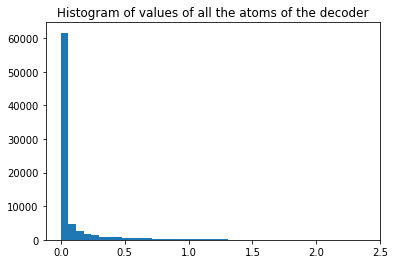

In [29]:
sp_o = 0.05
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


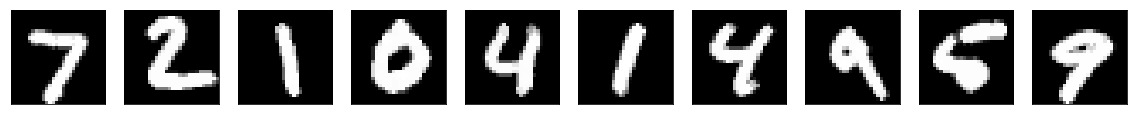

Dilatation of the reconstructions


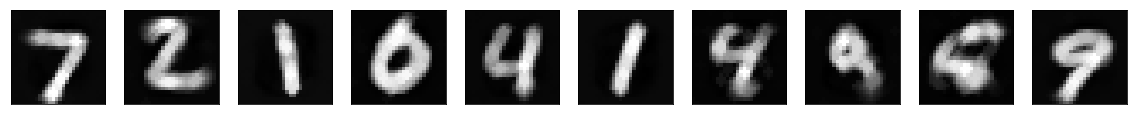

Original images and max-approximation to dilatation
Max-approx error to original:  0.15700038101673125  - Max-approx error to reconstruction:  0.1504167090177536


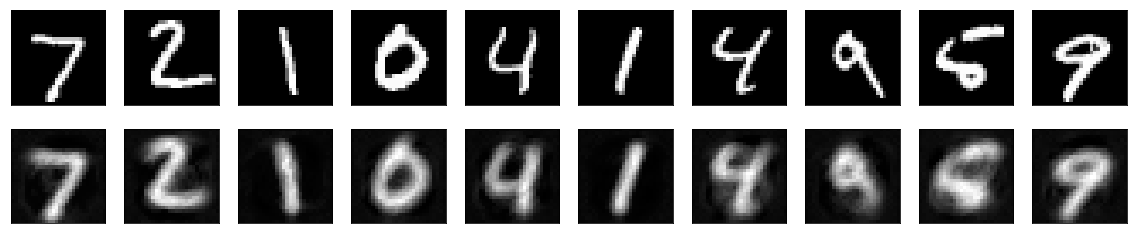

Dilated of the atom images of the decoder


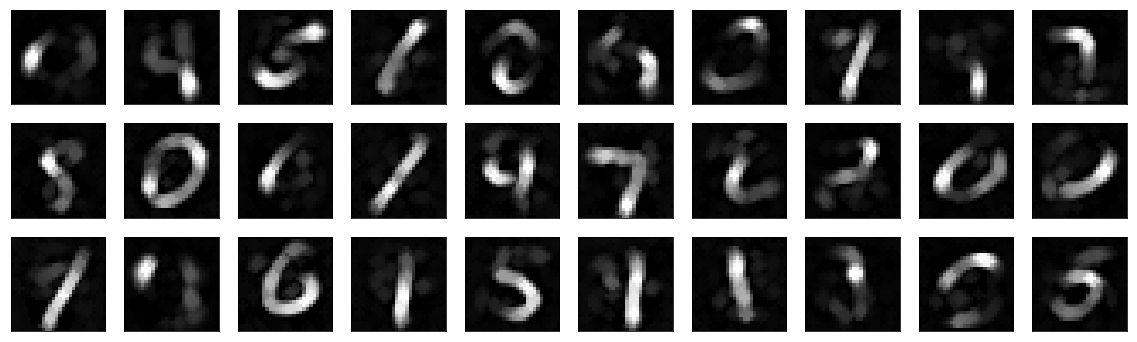

In [30]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.7 Sparsity_weight = 0.1 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.010804055362939834


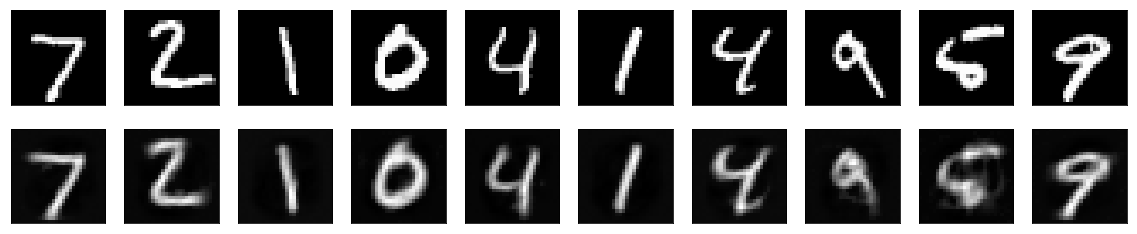

Histograms of the encodings - Sparsity (Hoyer):  0.5824477076530457


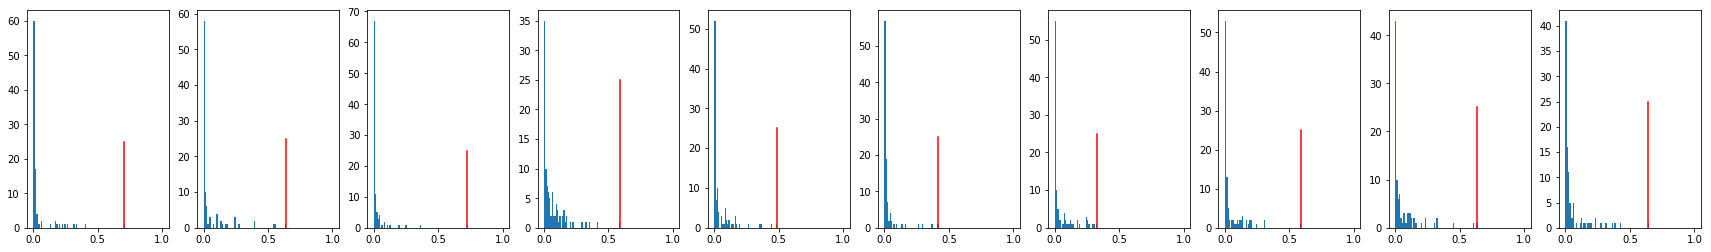

Atom images of the decoder


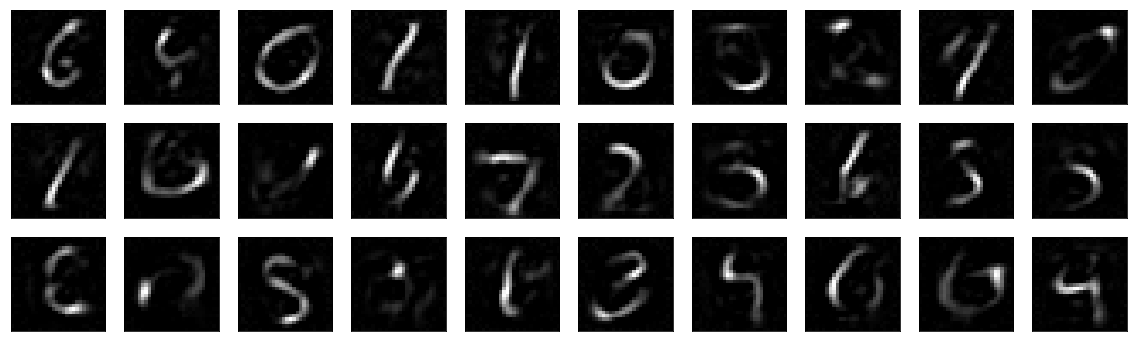

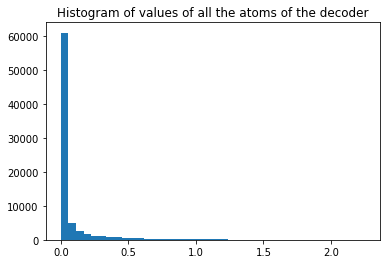

In [31]:
sp_o = 0.05
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


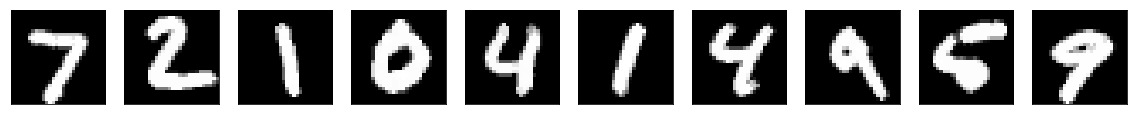

Dilatation of the reconstructions


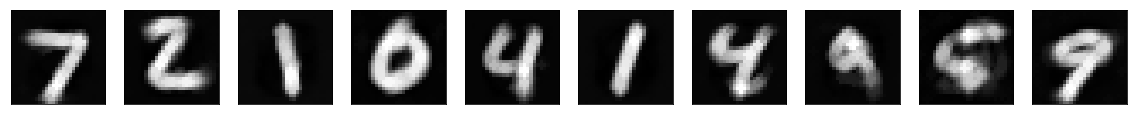

Original images and max-approximation to dilatation
Max-approx error to original:  0.20252854356765748  - Max-approx error to reconstruction:  0.17738067348003386


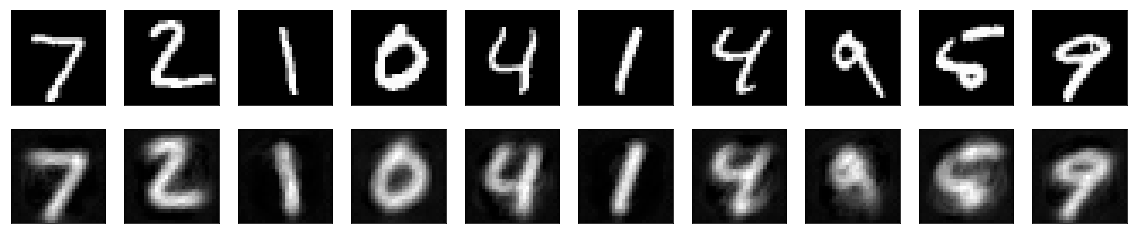

Dilated of the atom images of the decoder


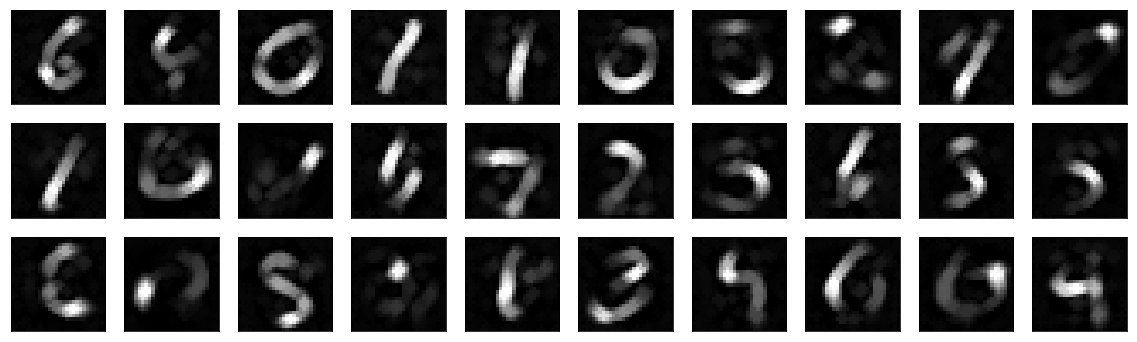

In [32]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.8 Sparsity_weight = 0.5 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.011180141006410122


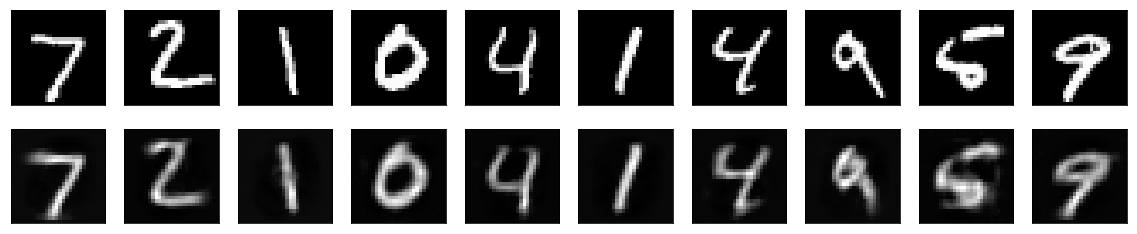

Histograms of the encodings - Sparsity (Hoyer):  0.5287806391716003


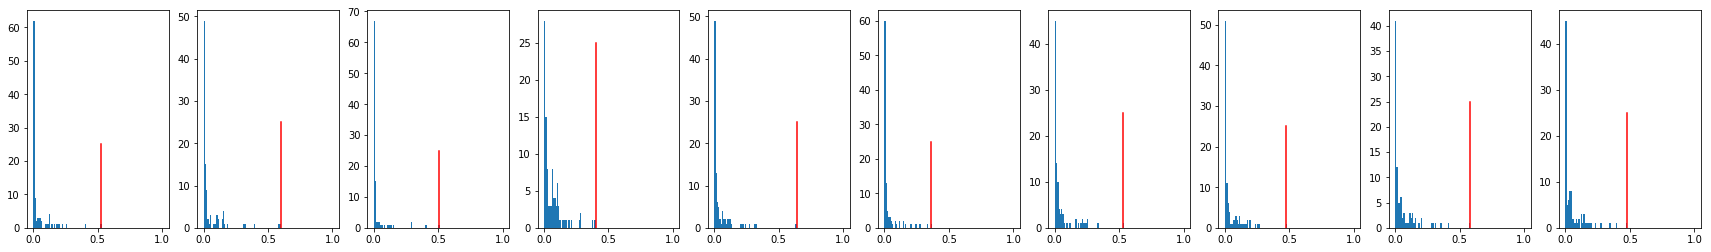

Atom images of the decoder


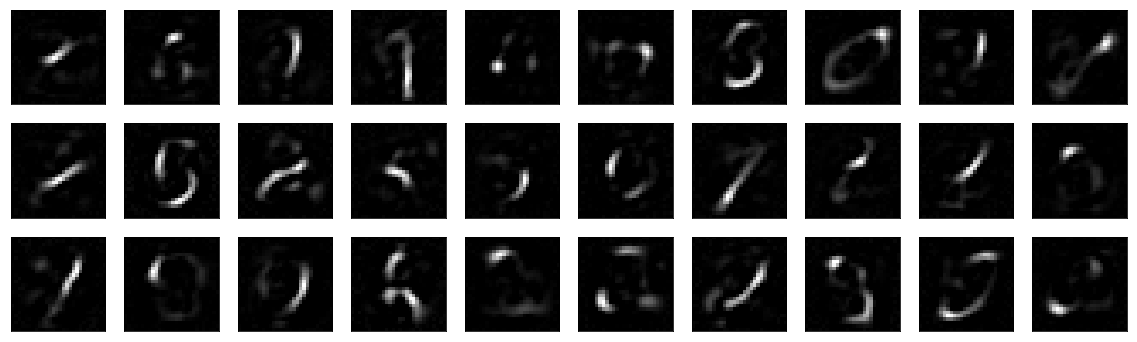

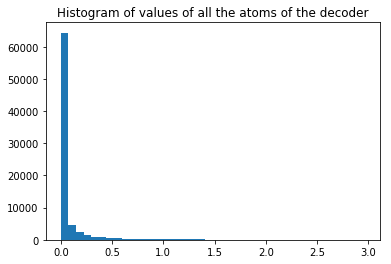

In [33]:
sp_o = 0.05
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


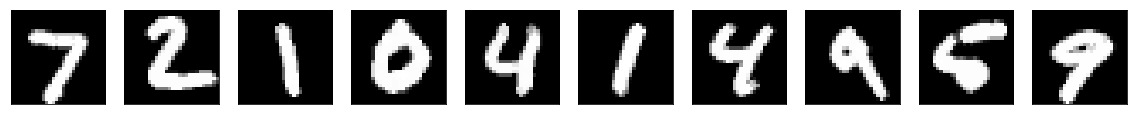

Dilatation of the reconstructions


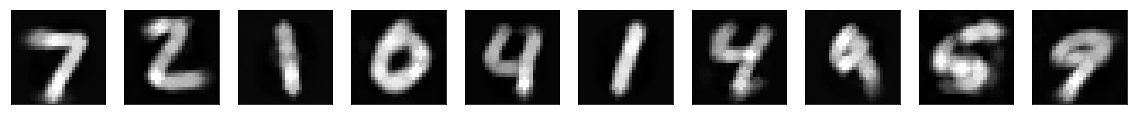

Original images and max-approximation to dilatation
Max-approx error to original:  0.2674522819519043  - Max-approx error to reconstruction:  0.2585131402015686


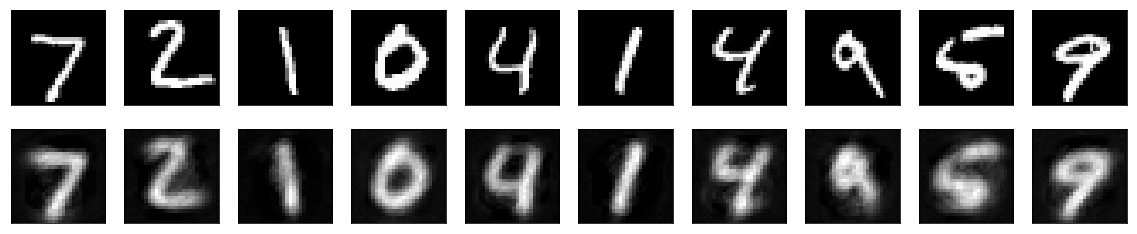

Dilated of the atom images of the decoder


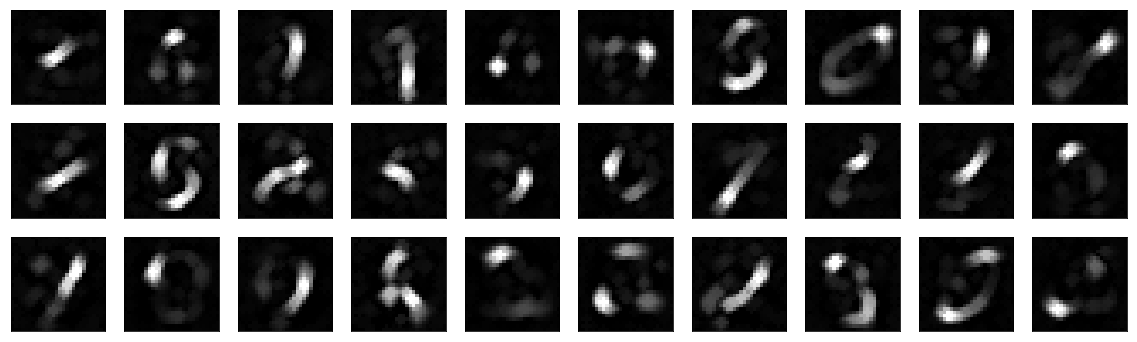

In [34]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 3. Sparsity_Objective = 0.1

## 3.1 Sparsity_weight = 0.0001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.004974494230747223


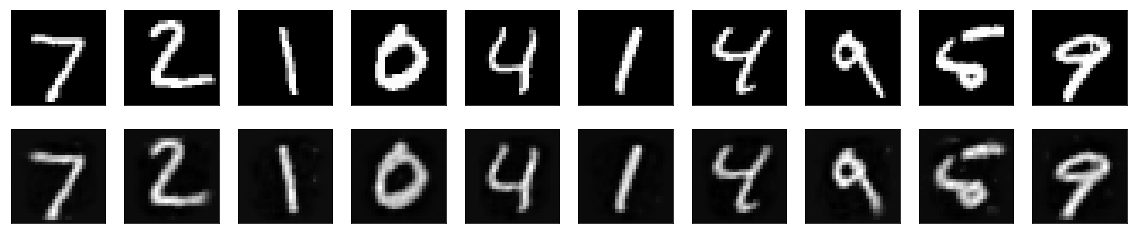

Histograms of the encodings - Sparsity (Hoyer):  0.322063148021698


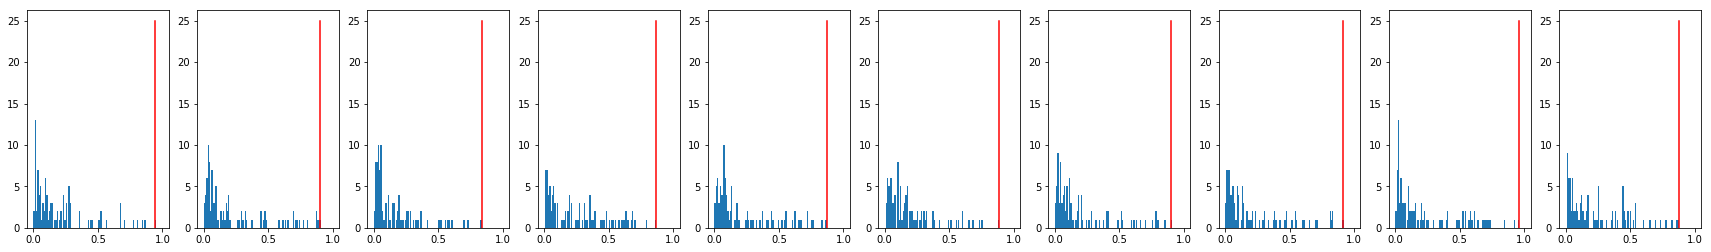

Atom images of the decoder


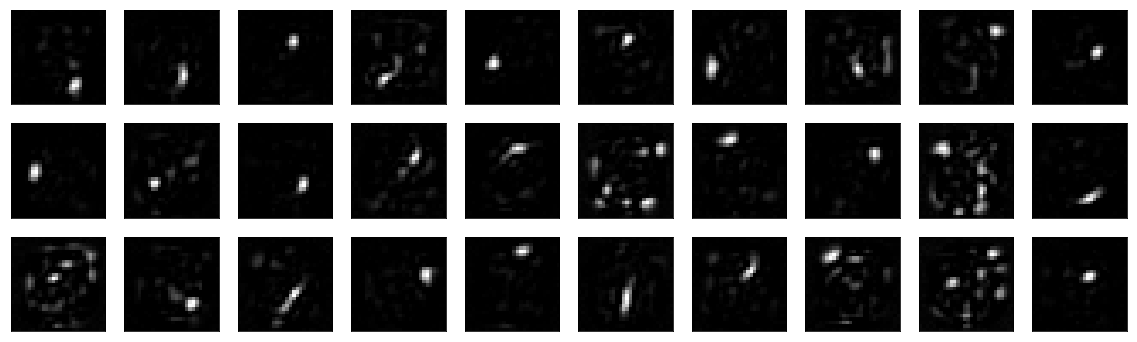

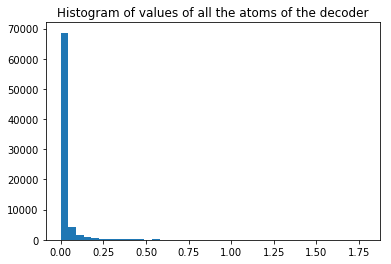

In [35]:
sp_o = 0.1
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_13_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


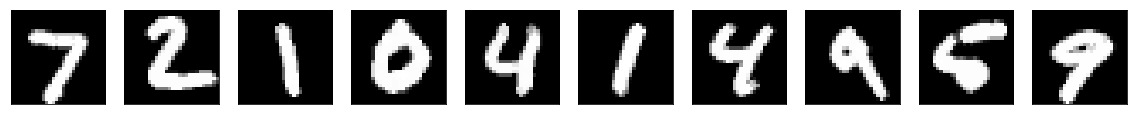

Dilatation of the reconstructions


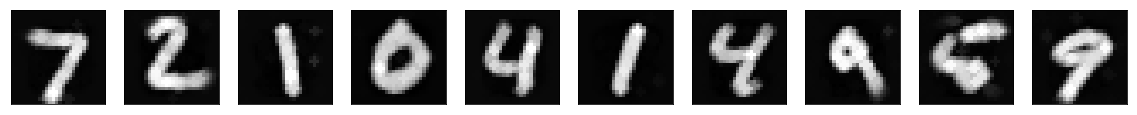

Original images and max-approximation to dilatation
Max-approx error to original:  0.9715260780334473  - Max-approx error to reconstruction:  0.9432040857315064


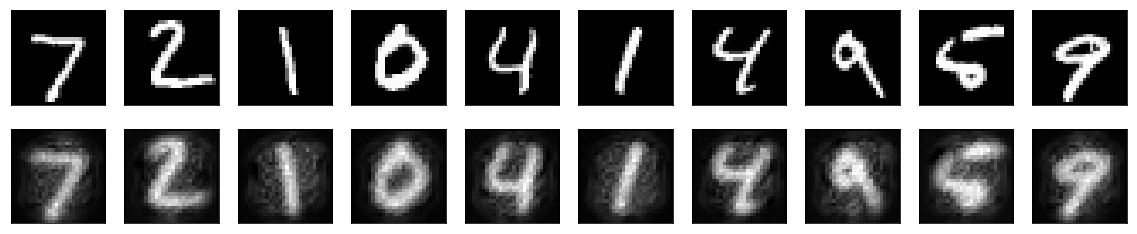

Dilated of the atom images of the decoder


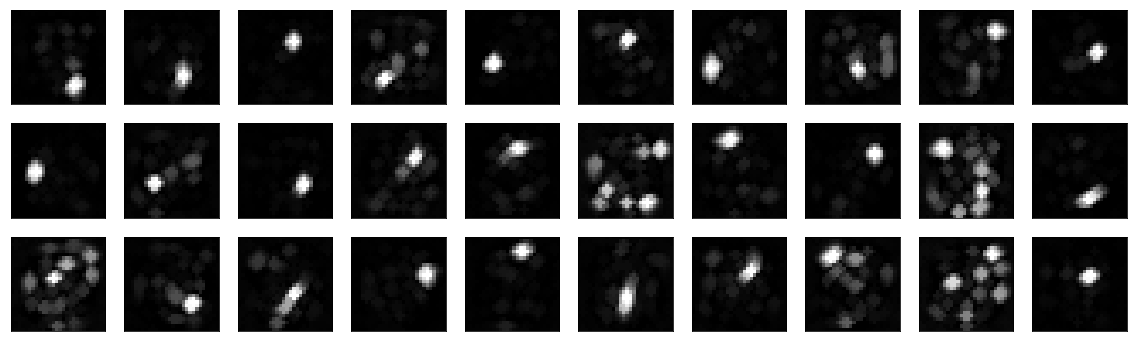

In [36]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.2 Sparsity_weight = 0.0005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.006088481272757054


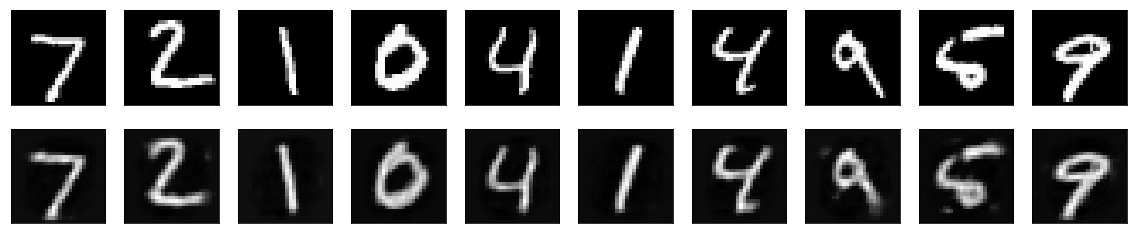

Histograms of the encodings - Sparsity (Hoyer):  0.4262181222438812


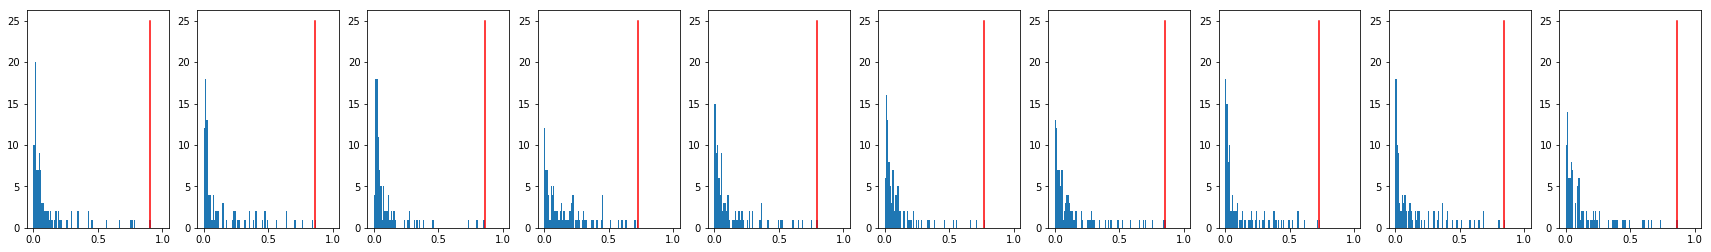

Atom images of the decoder


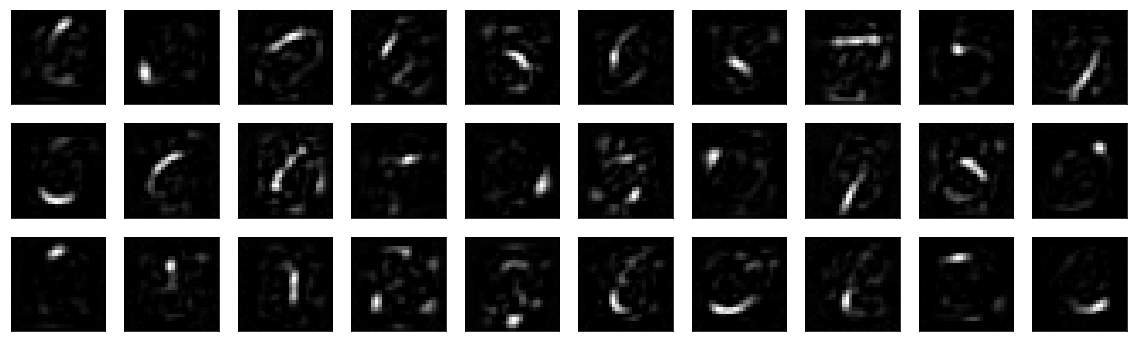

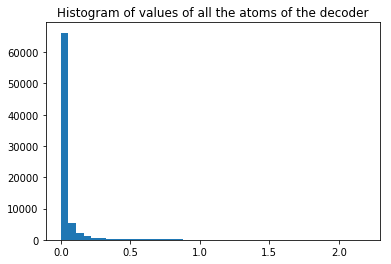

In [38]:
sp_o = 0.1
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_13_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


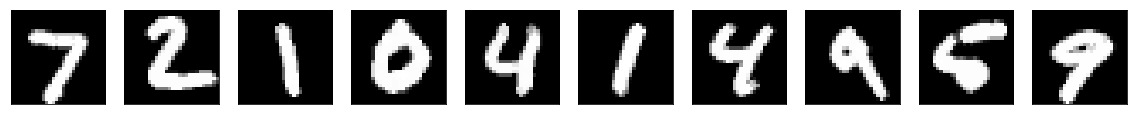

Dilatation of the reconstructions


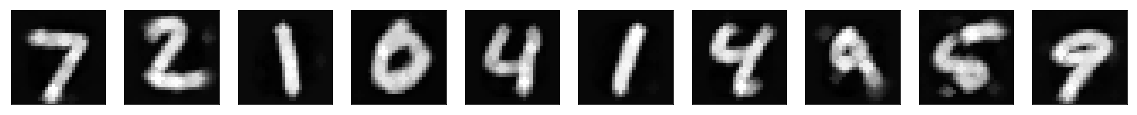

Original images and max-approximation to dilatation
Max-approx error to original:  0.5838387104988099  - Max-approx error to reconstruction:  0.5632420701026917


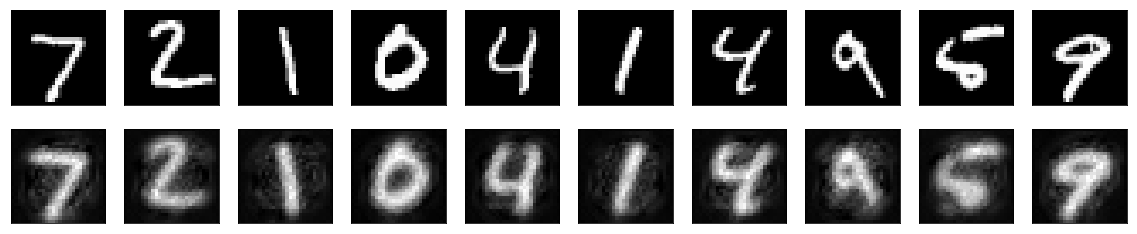

Dilated of the atom images of the decoder


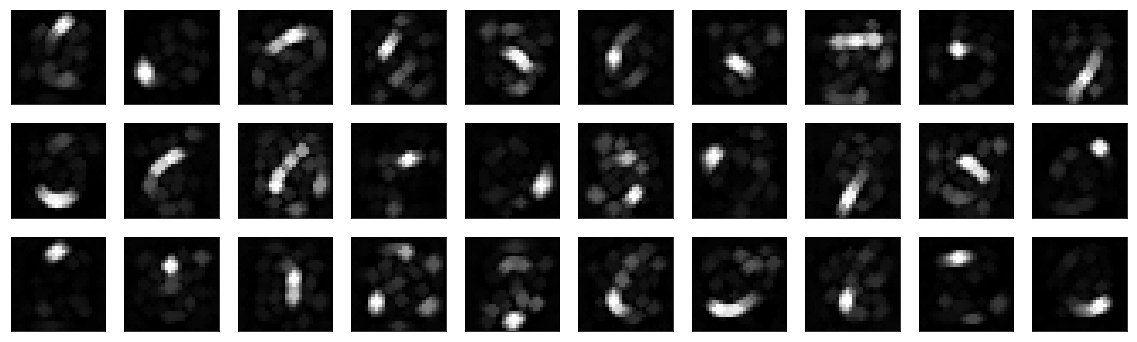

In [39]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.3 Sparsity_weight = 0.001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.0065509696885943415


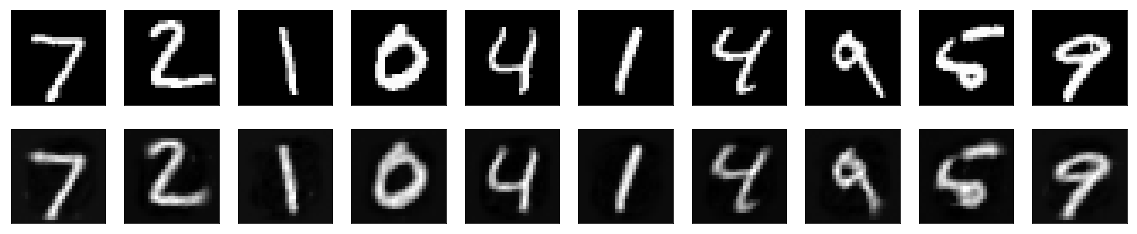

Histograms of the encodings - Sparsity (Hoyer):  0.4576319456100464


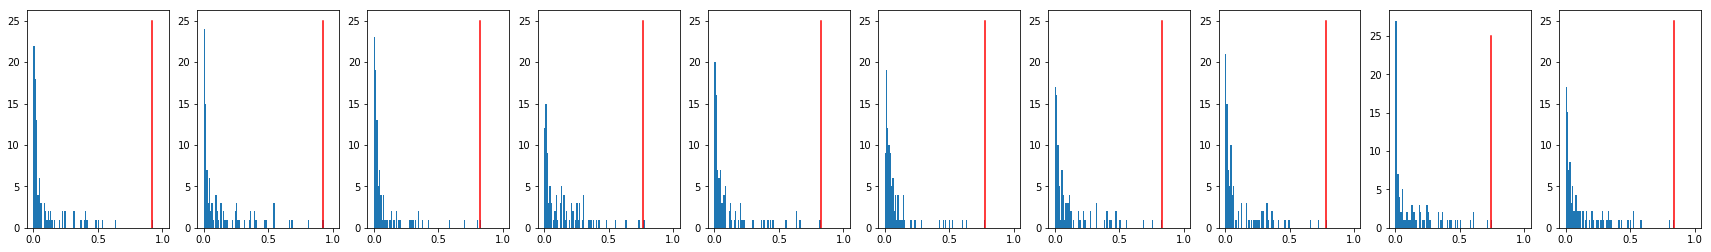

Atom images of the decoder


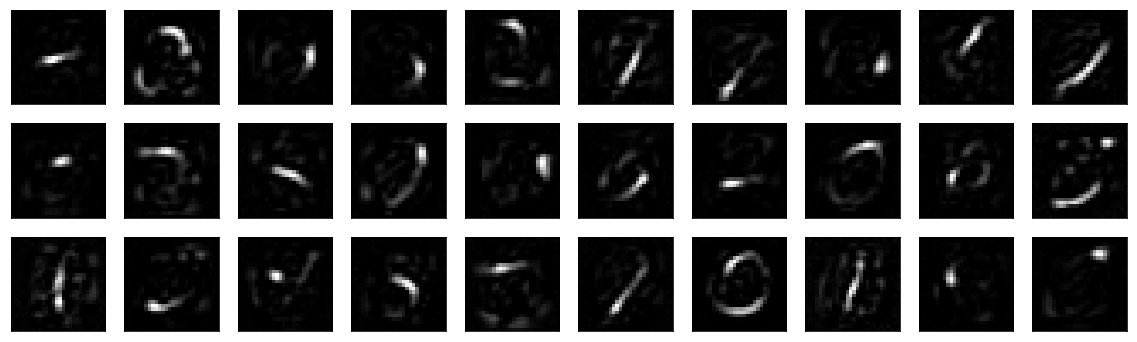

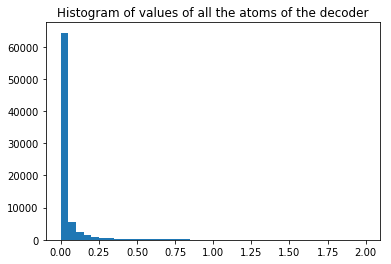

In [40]:
sp_o = 0.1
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


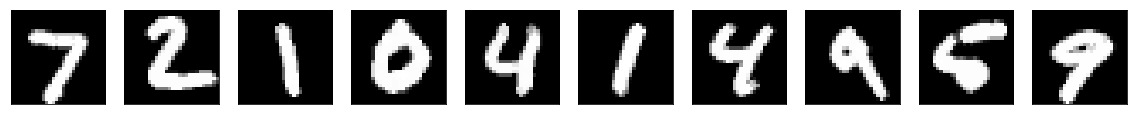

Dilatation of the reconstructions


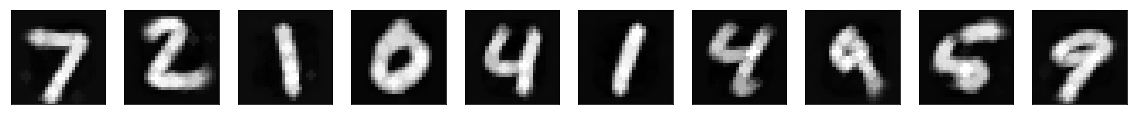

Original images and max-approximation to dilatation
Max-approx error to original:  0.4697344864845276  - Max-approx error to reconstruction:  0.4592857526779175


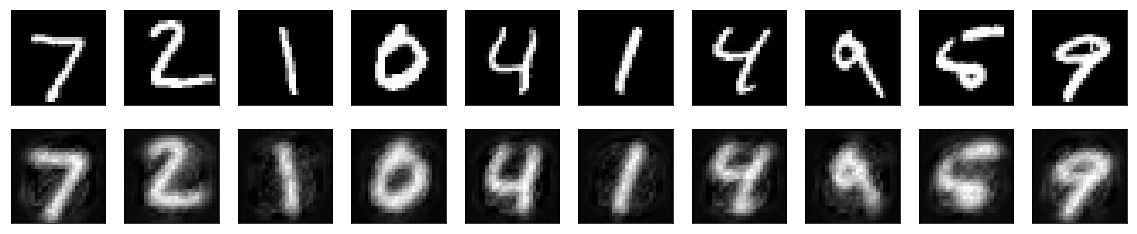

Dilated of the atom images of the decoder


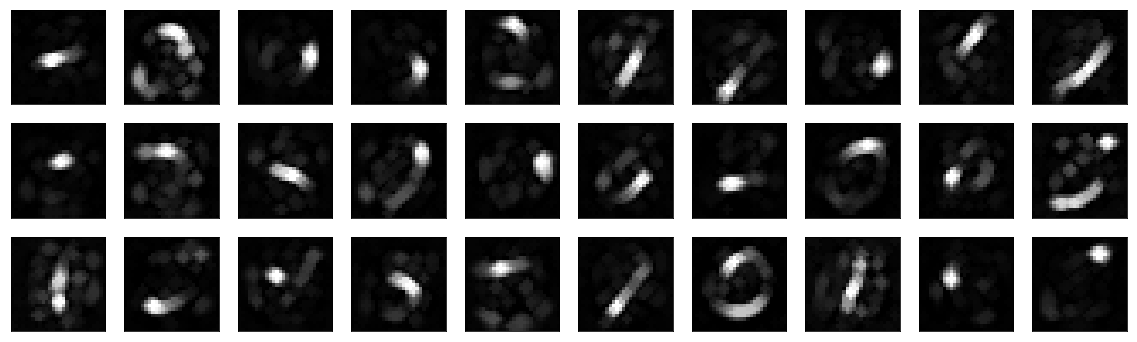

In [41]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.4 Sparsity_weight = 0.005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.007005758572369814


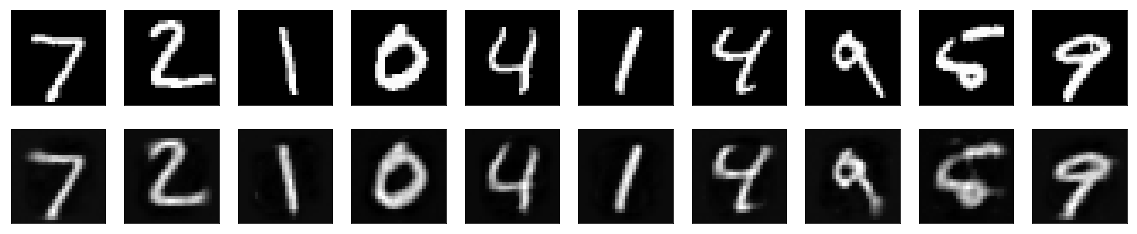

Histograms of the encodings - Sparsity (Hoyer):  0.4769963324069977


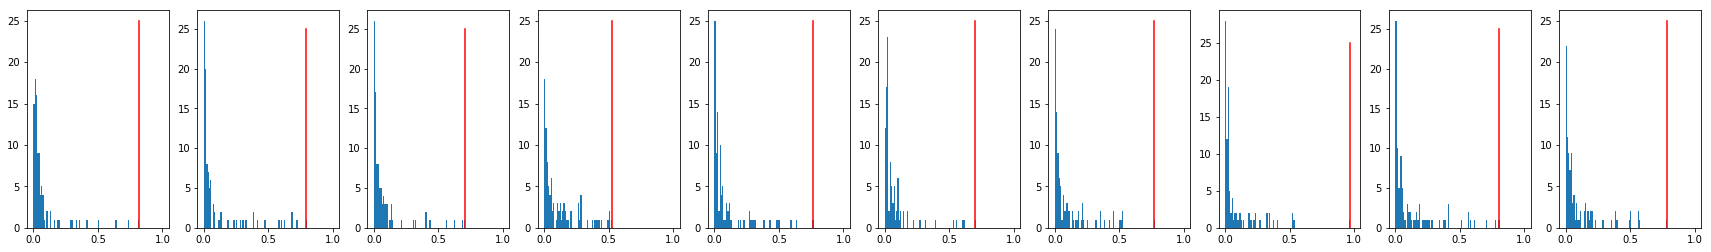

Atom images of the decoder


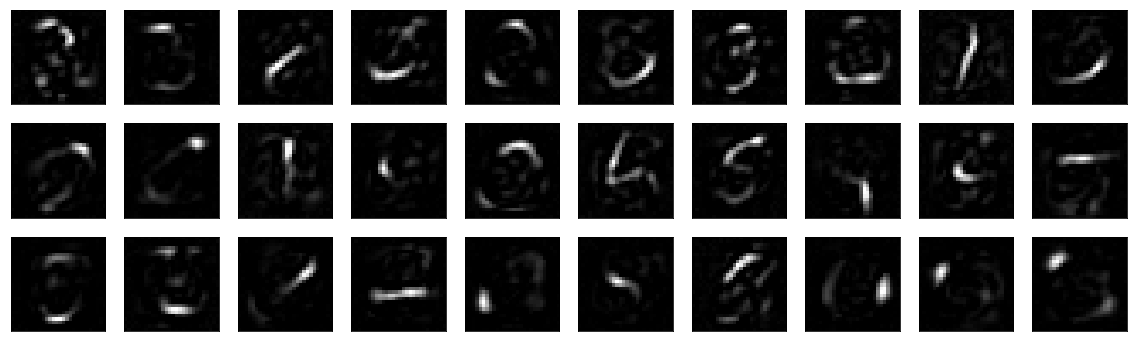

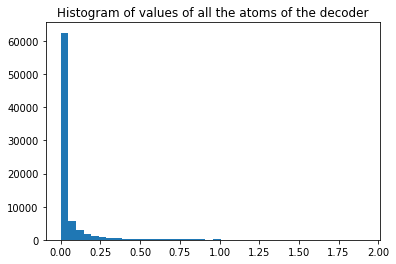

In [42]:
sp_o = 0.1
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


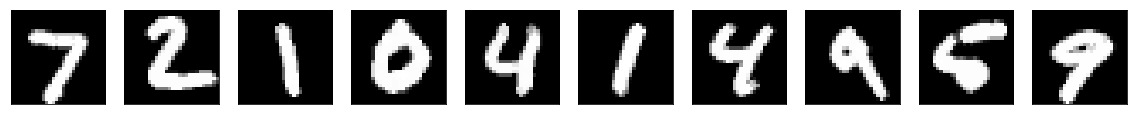

Dilatation of the reconstructions


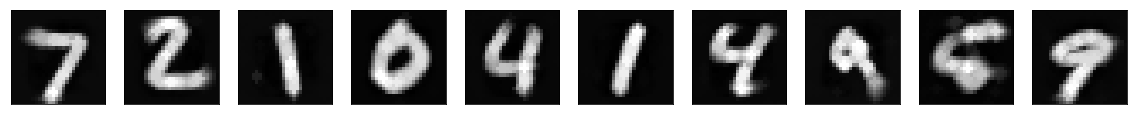

Original images and max-approximation to dilatation
Max-approx error to original:  0.3993527395248413  - Max-approx error to reconstruction:  0.39023230628967287


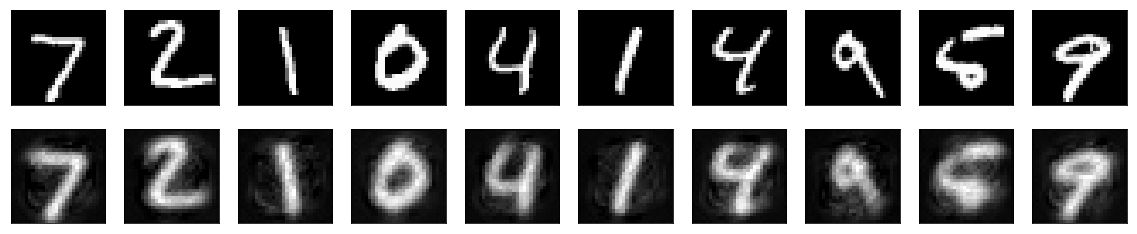

Dilated of the atom images of the decoder


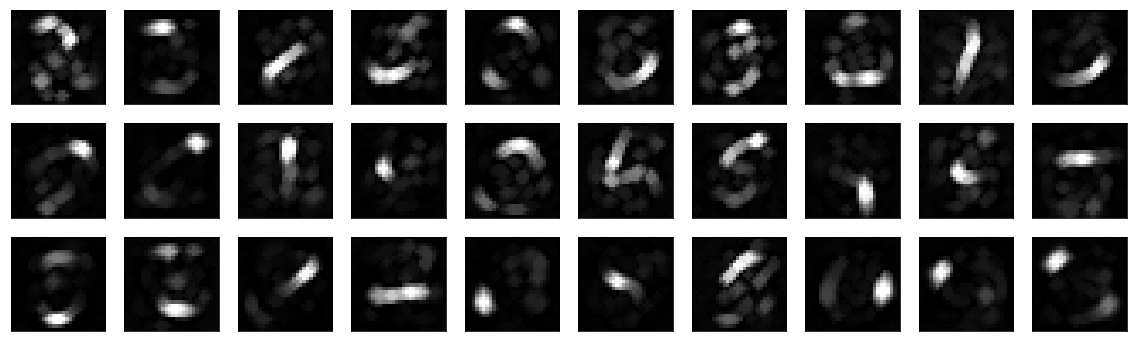

In [43]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.5 Sparsity_weight = 0.01 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.007034865160286427


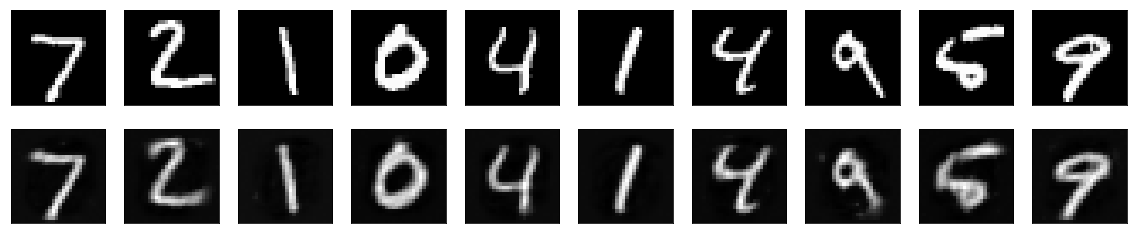

Histograms of the encodings - Sparsity (Hoyer):  0.46449360251426697


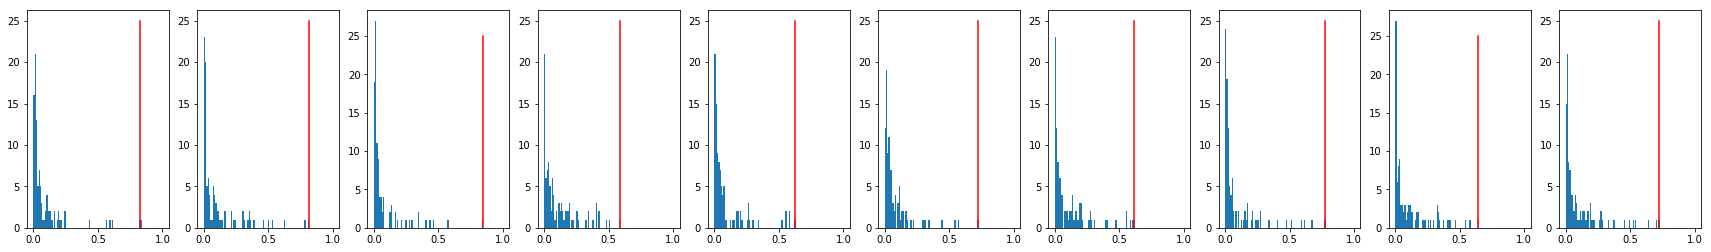

Atom images of the decoder


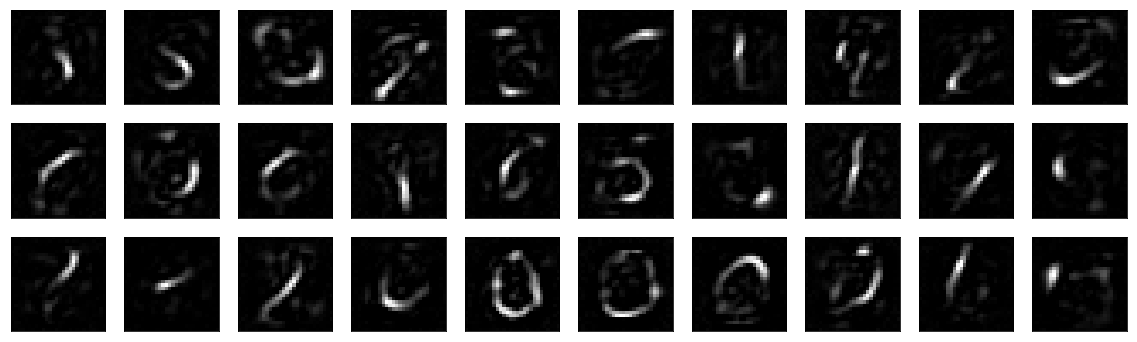

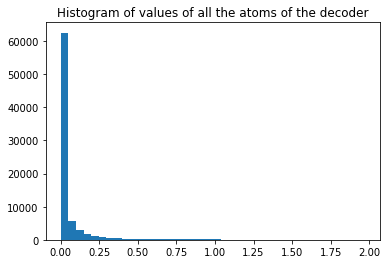

In [44]:
sp_o = 0.1
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


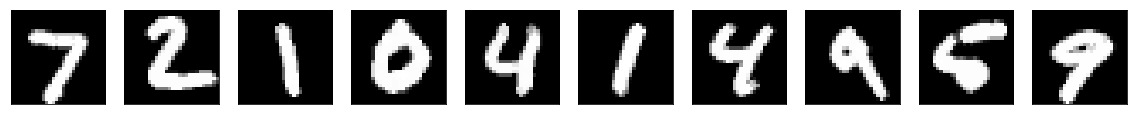

Dilatation of the reconstructions


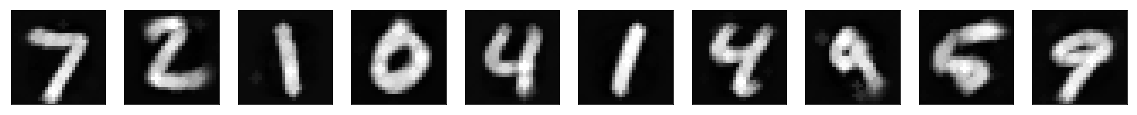

Original images and max-approximation to dilatation
Max-approx error to original:  0.4439087738037109  - Max-approx error to reconstruction:  0.4204765410423279


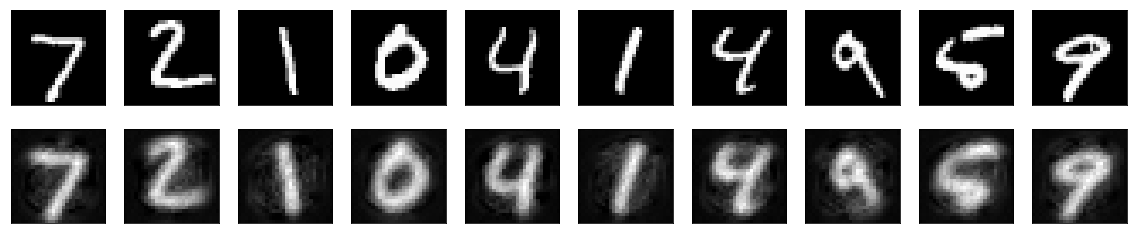

Dilated of the atom images of the decoder


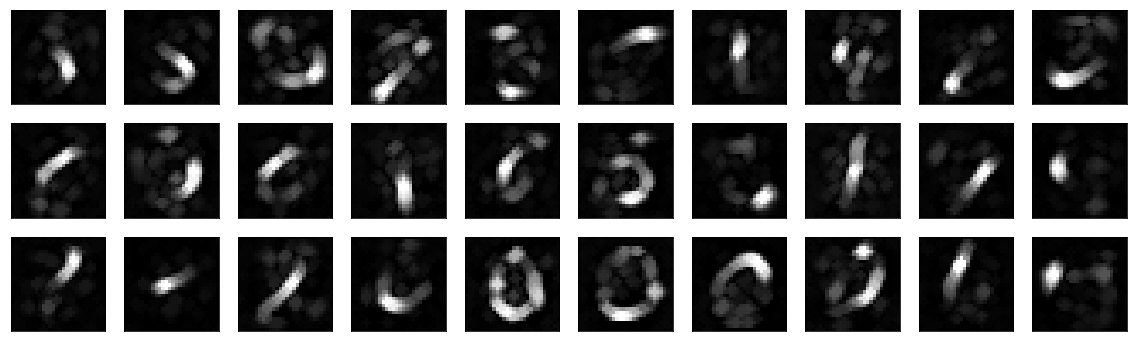

In [45]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.6 Sparsity_weight = 0.05 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.006898116475343705


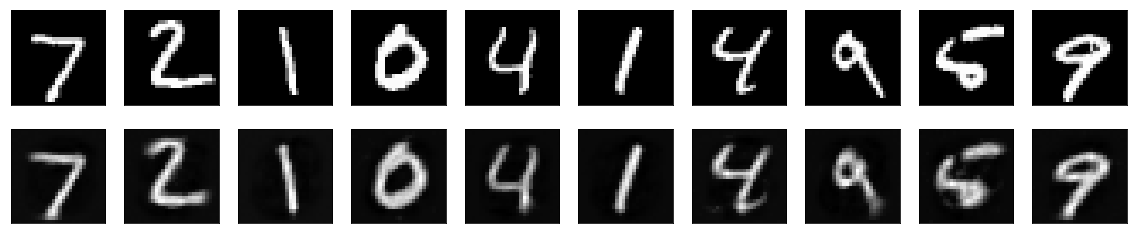

Histograms of the encodings - Sparsity (Hoyer):  0.44788429141044617


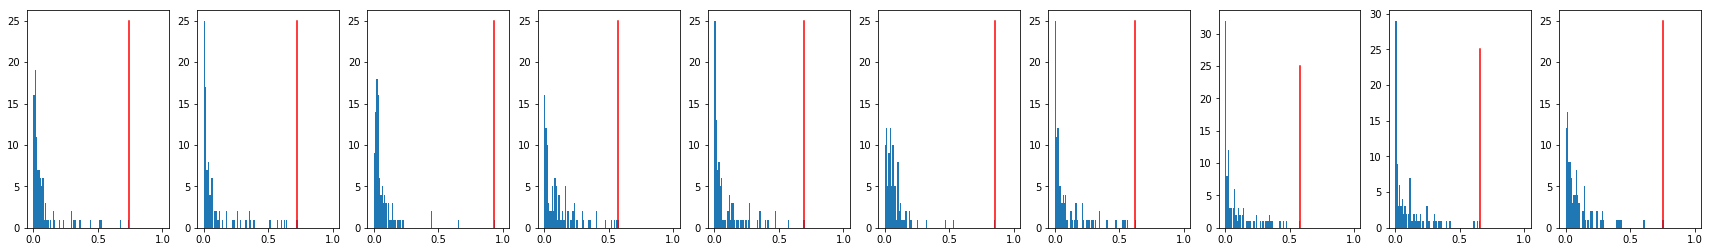

Atom images of the decoder


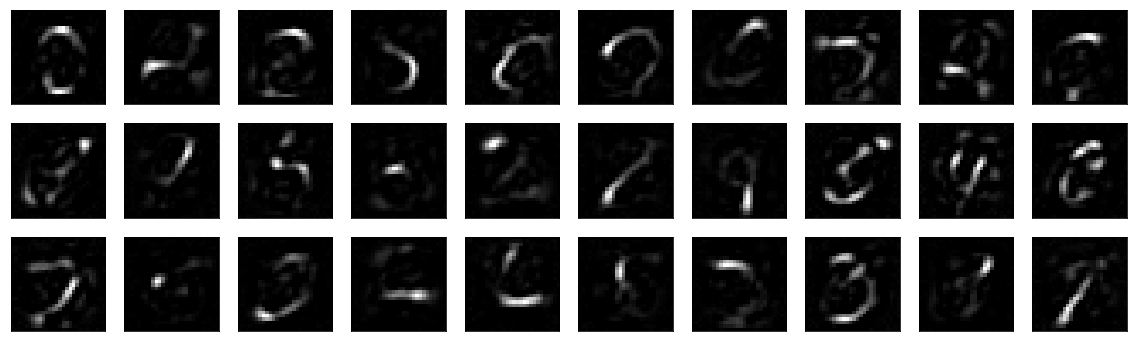

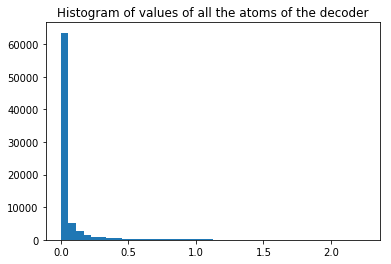

In [46]:
sp_o = 0.1
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


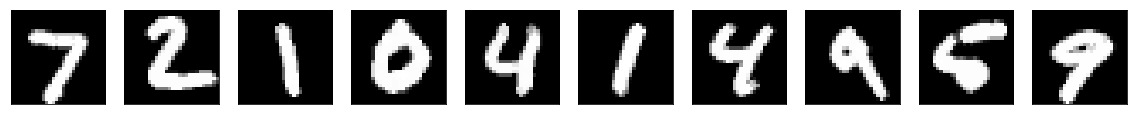

Dilatation of the reconstructions


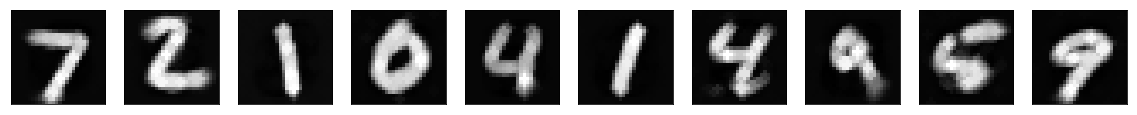

Original images and max-approximation to dilatation
Max-approx error to original:  0.47898128576278687  - Max-approx error to reconstruction:  0.4621212514877319


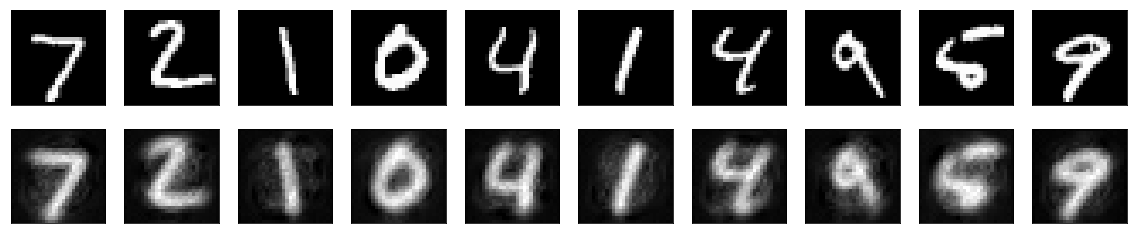

Dilated of the atom images of the decoder


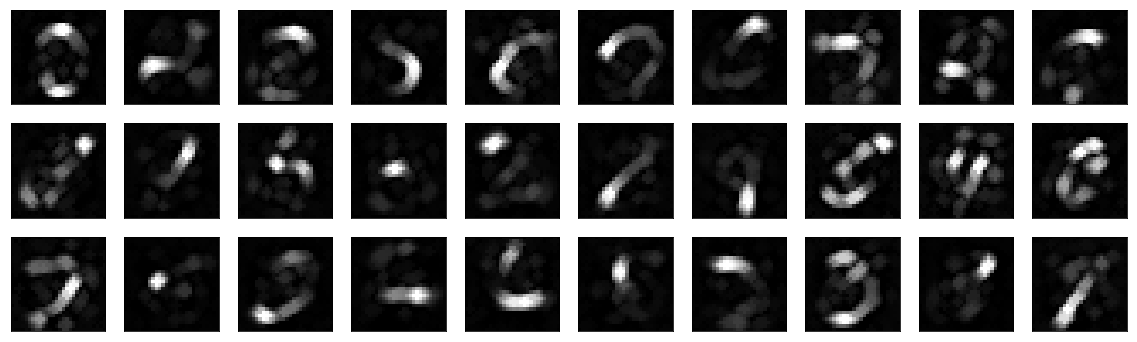

In [47]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.7 Sparsity_weight = 0.1 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.007038314341753721


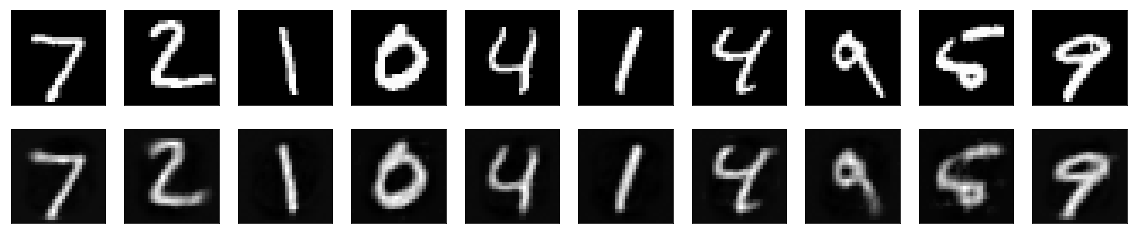

Histograms of the encodings - Sparsity (Hoyer):  0.4414783716201782


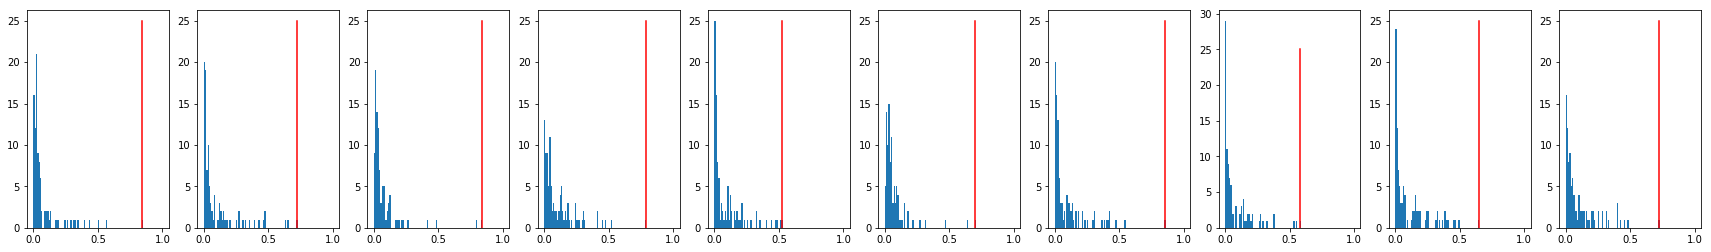

Atom images of the decoder


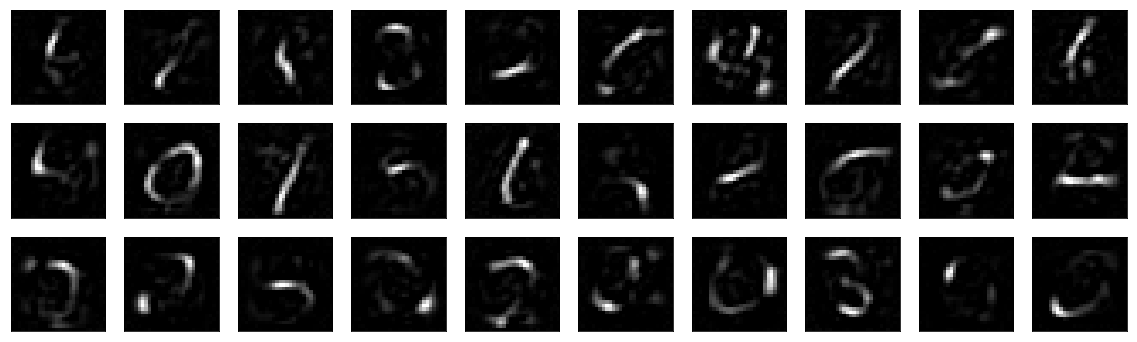

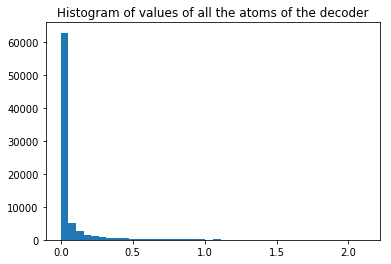

In [48]:
sp_o = 0.1
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


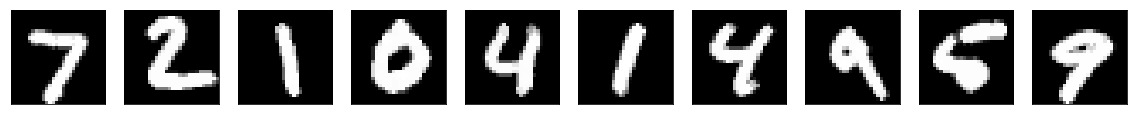

Dilatation of the reconstructions


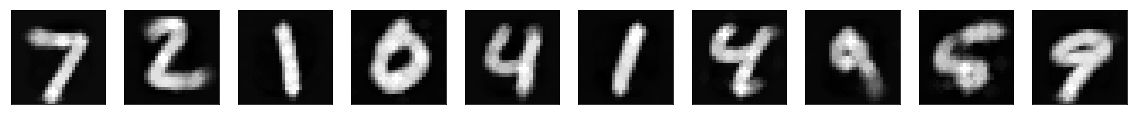

Original images and max-approximation to dilatation
Max-approx error to original:  0.49864642210006715  - Max-approx error to reconstruction:  0.4804910717010498


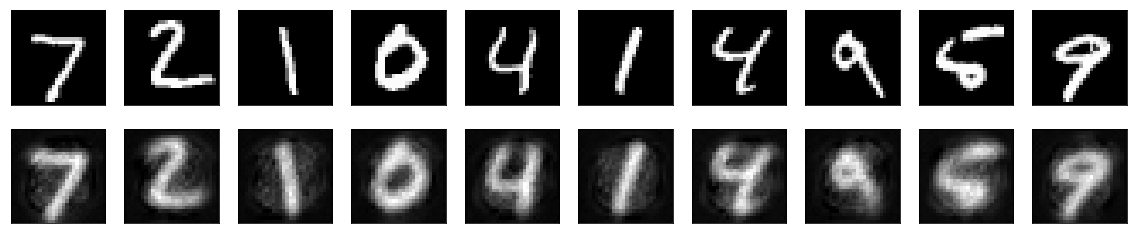

Dilated of the atom images of the decoder


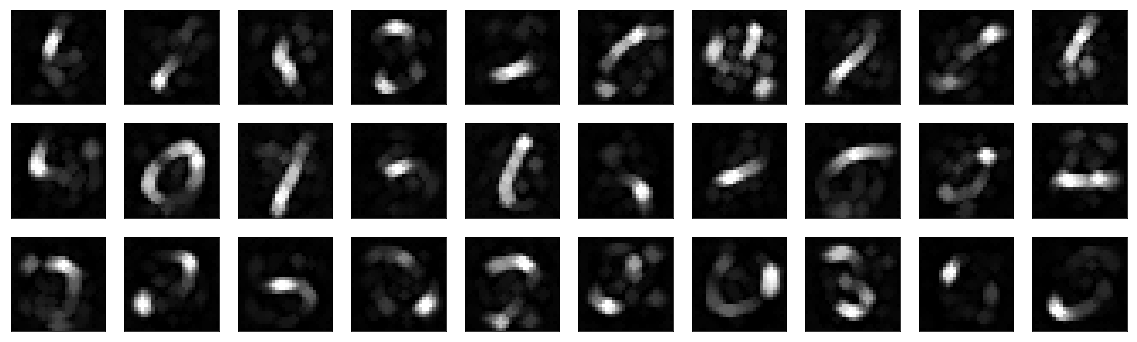

In [49]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.8 Sparsity_weight = 0.5 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.007743726968020201


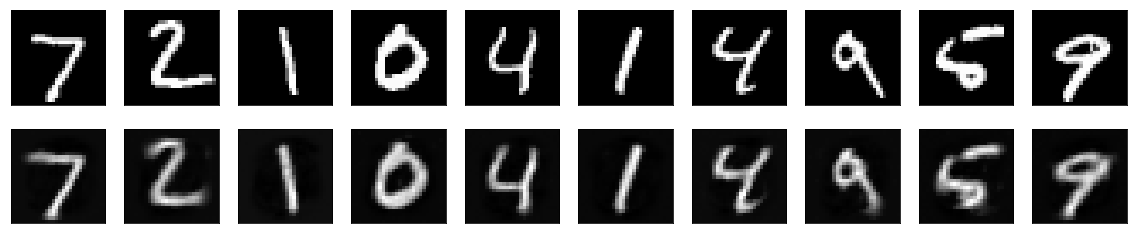

Histograms of the encodings - Sparsity (Hoyer):  0.36754605174064636


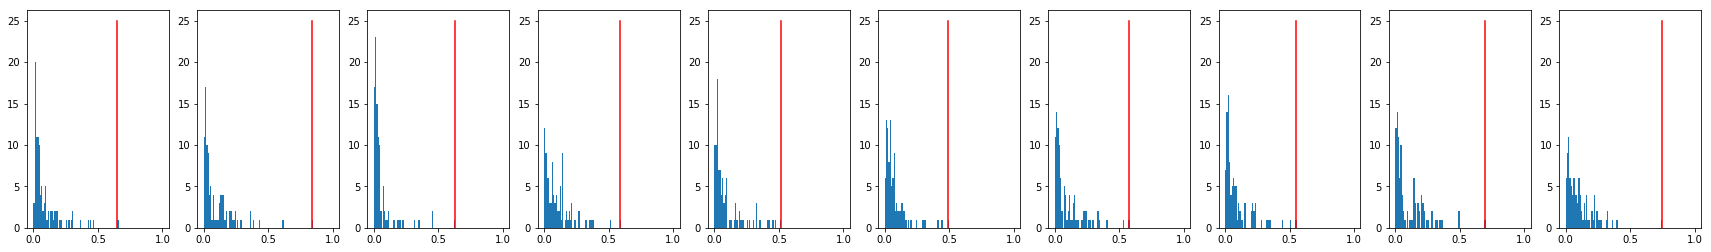

Atom images of the decoder


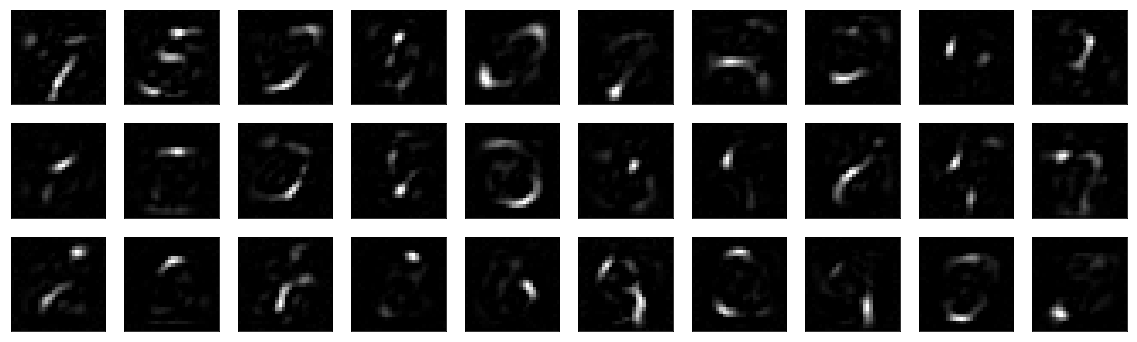

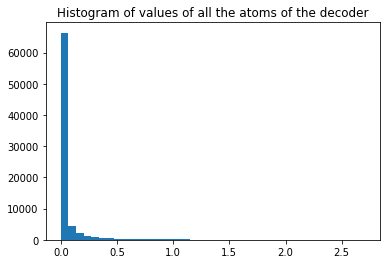

In [50]:
sp_o = 0.1
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


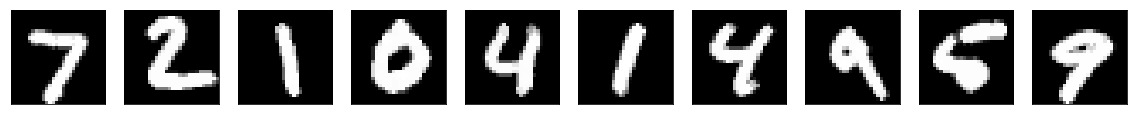

Dilatation of the reconstructions


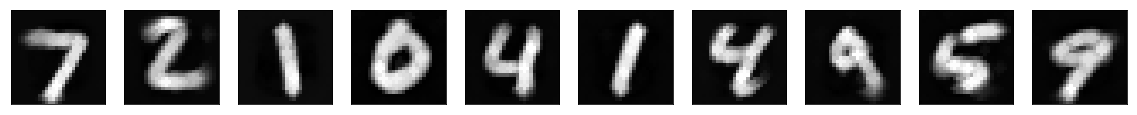

Original images and max-approximation to dilatation
Max-approx error to original:  0.6369798009872436  - Max-approx error to reconstruction:  0.6151974042892456


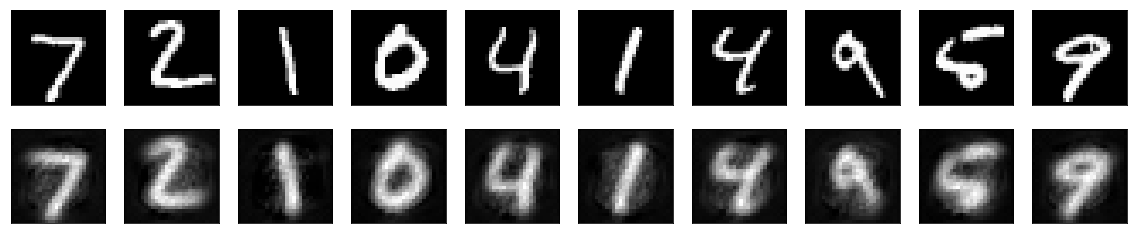

Dilated of the atom images of the decoder


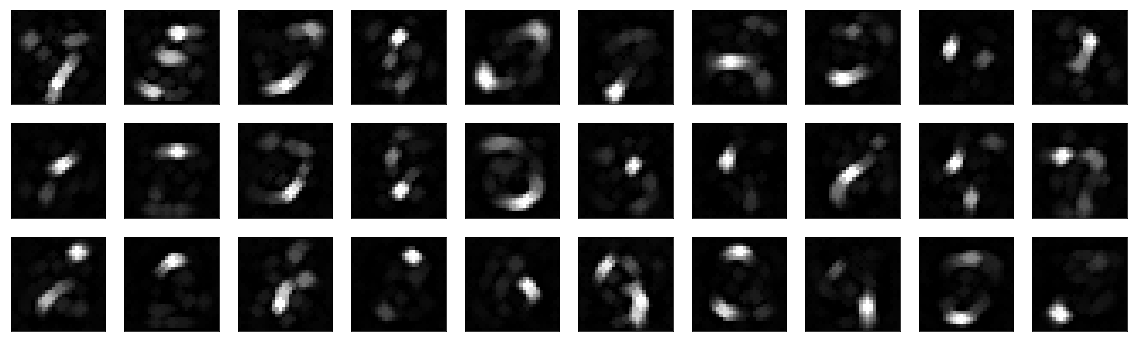

In [51]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 4. Sparsity_Objective = 0.2

## 4.1 Sparsity_weight = 0.0001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.004700015006959438


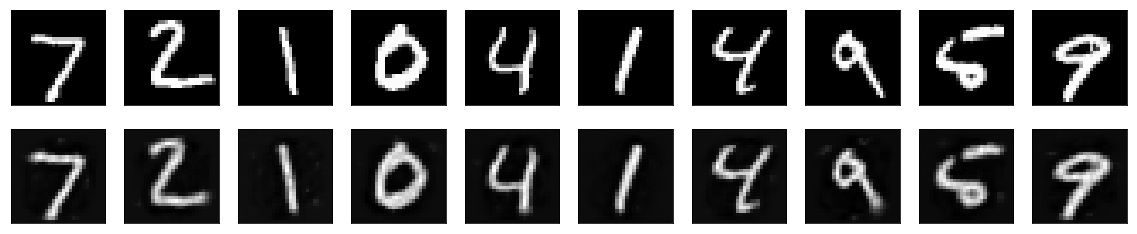

Histograms of the encodings - Sparsity (Hoyer):  0.2718920409679413


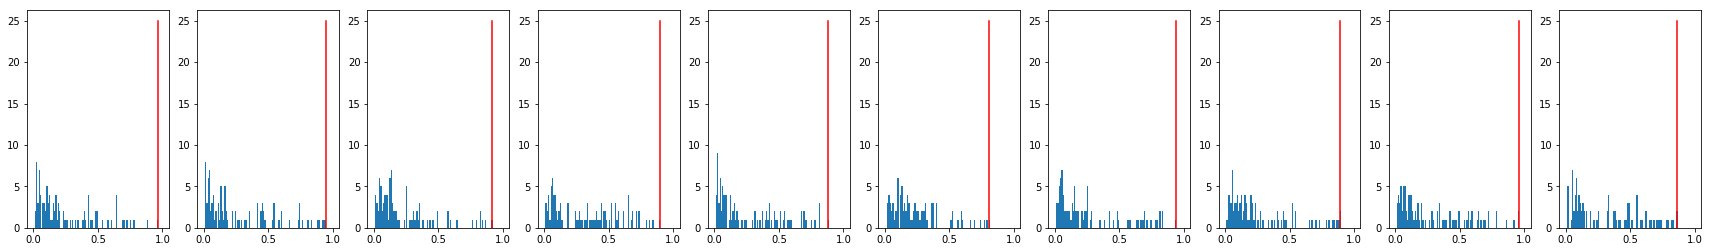

Atom images of the decoder


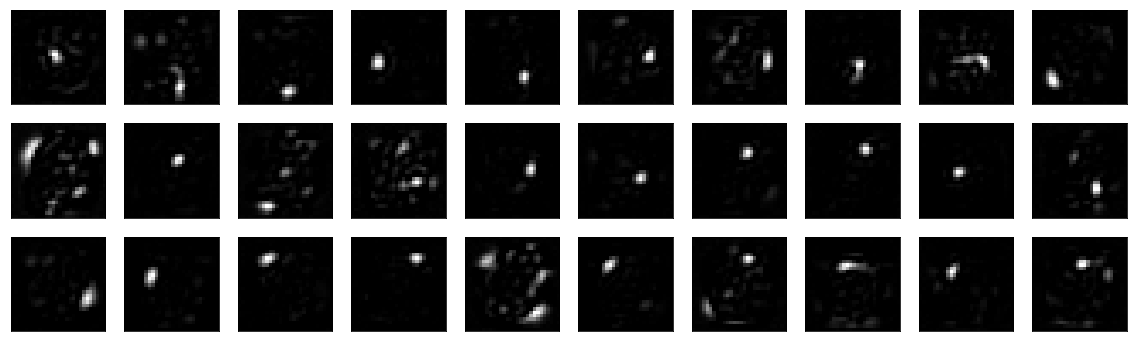

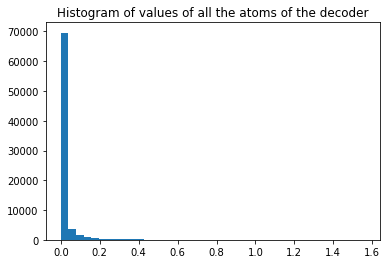

In [52]:
sp_o = 0.2
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_13_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


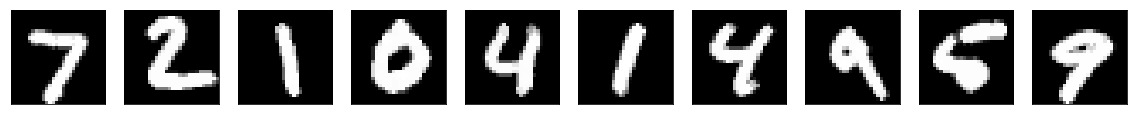

Dilatation of the reconstructions


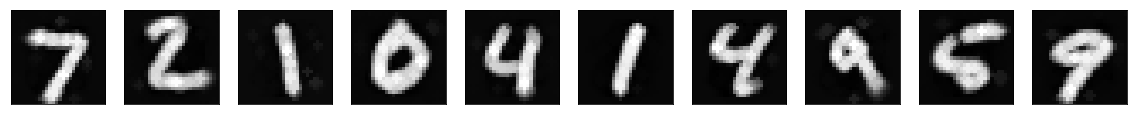

Original images and max-approximation to dilatation
Max-approx error to original:  1.1334828357696534  - Max-approx error to reconstruction:  1.11953970413208


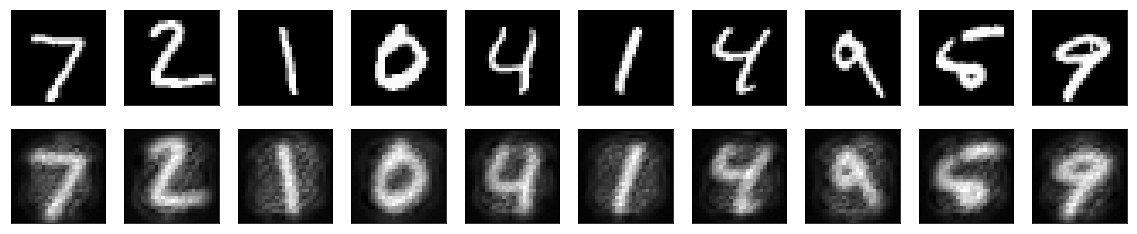

Dilated of the atom images of the decoder


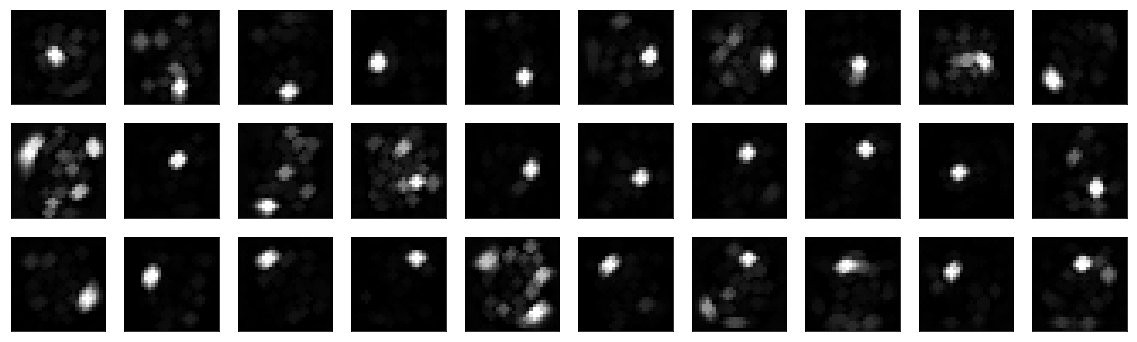

In [53]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.2 Sparsity_weight = 0.0005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.00514959357008338


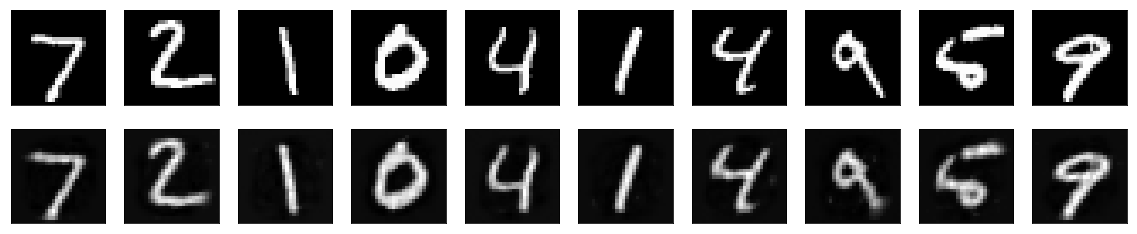

Histograms of the encodings - Sparsity (Hoyer):  0.3213093876838684


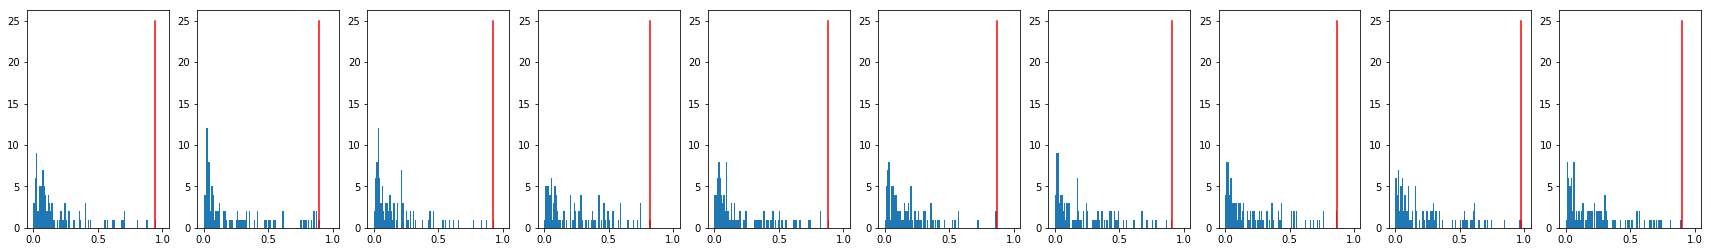

Atom images of the decoder


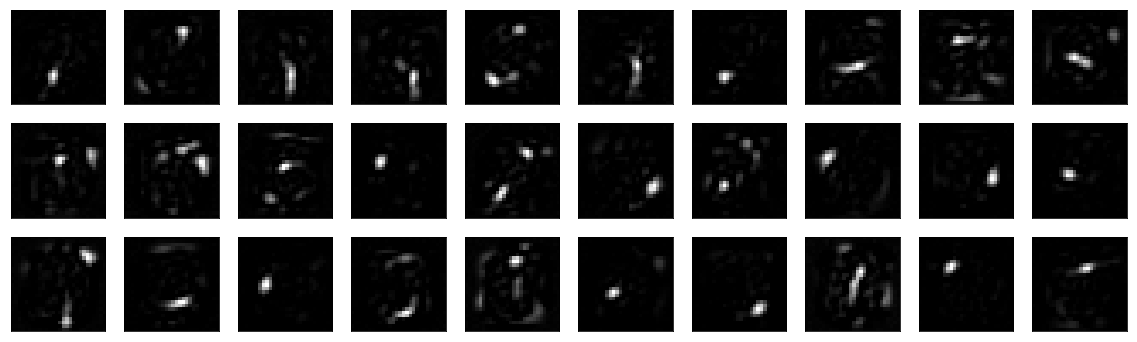

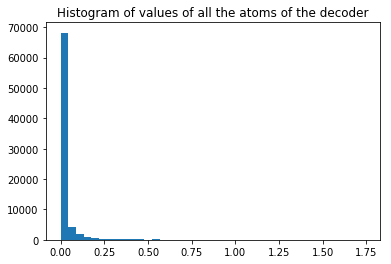

In [55]:
sp_o = 0.2
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_13_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


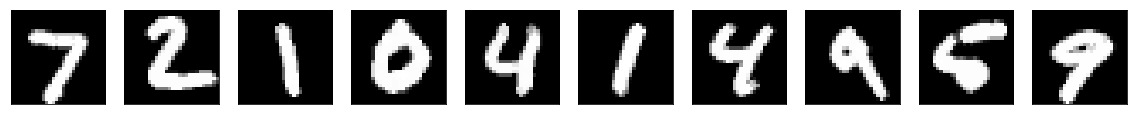

Dilatation of the reconstructions


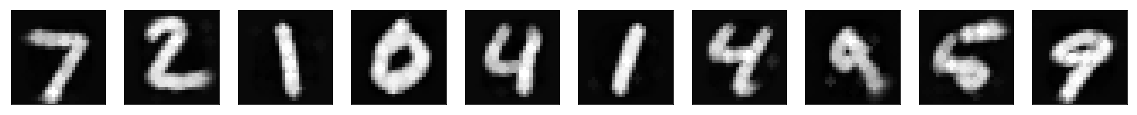

Original images and max-approximation to dilatation
Max-approx error to original:  0.9614758924484252  - Max-approx error to reconstruction:  0.9496480327606202


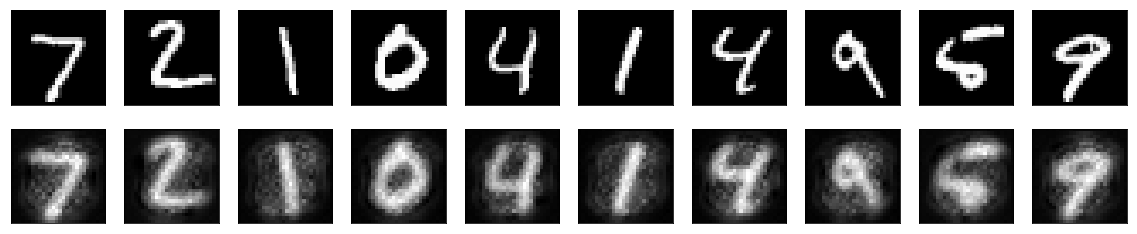

Dilated of the atom images of the decoder


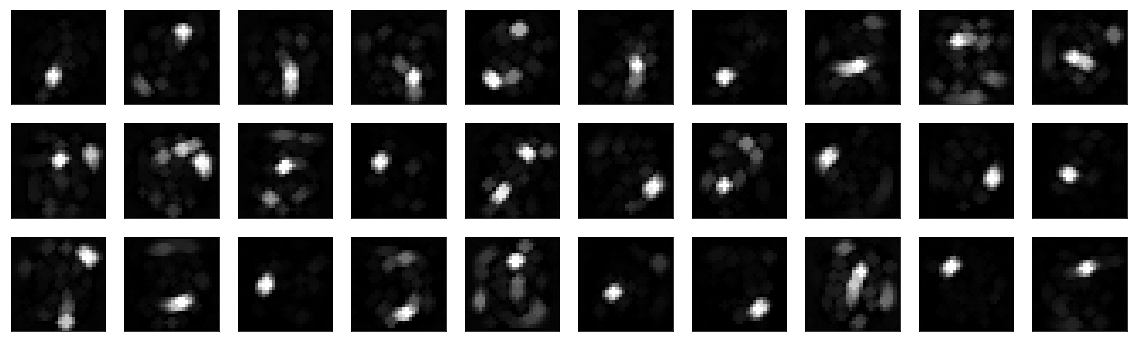

In [56]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.3 Sparsity_weight = 0.001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.005252669049054384


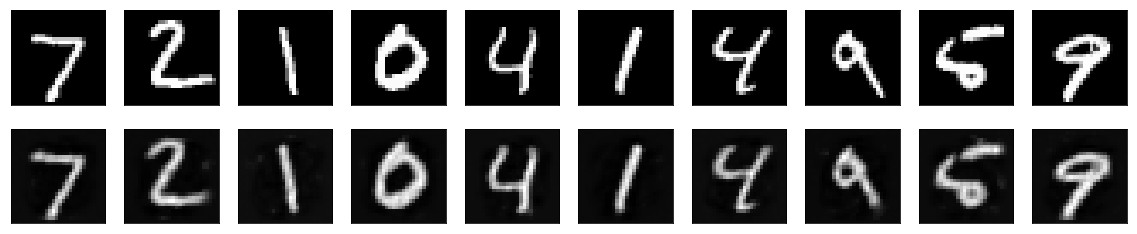

Histograms of the encodings - Sparsity (Hoyer):  0.32832133769989014


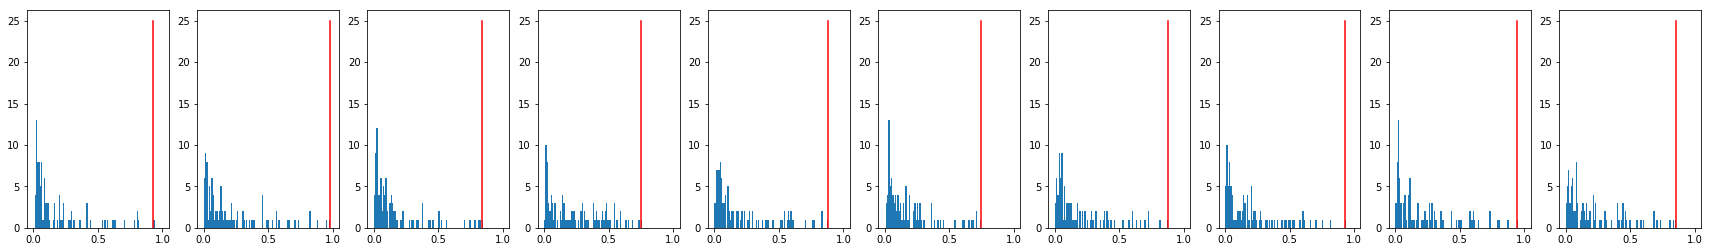

Atom images of the decoder


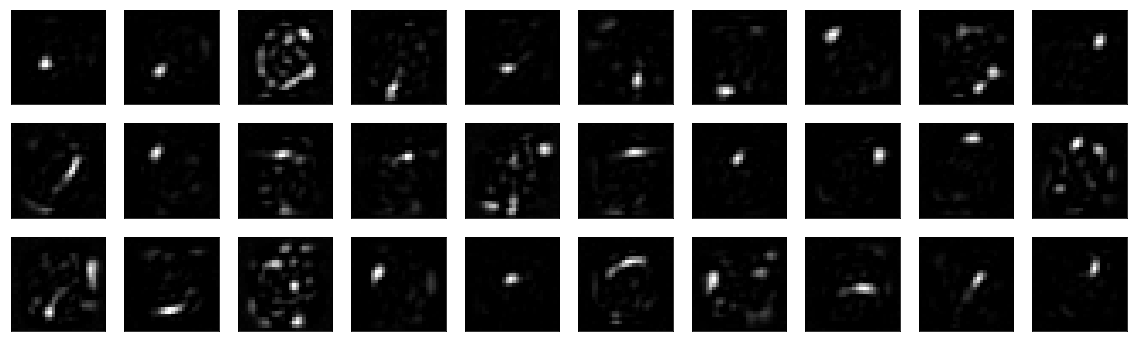

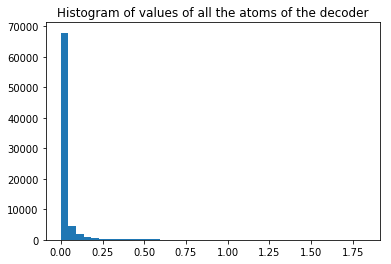

In [57]:
sp_o = 0.2
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


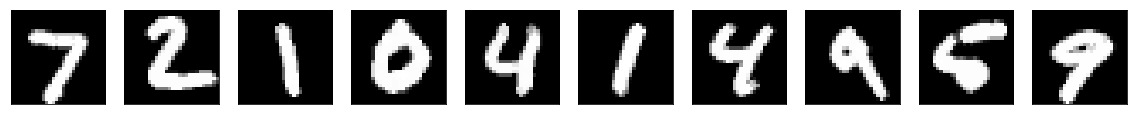

Dilatation of the reconstructions


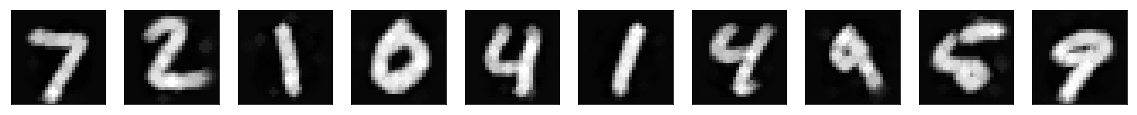

Original images and max-approximation to dilatation
Max-approx error to original:  0.986027545928955  - Max-approx error to reconstruction:  0.9512751026153564


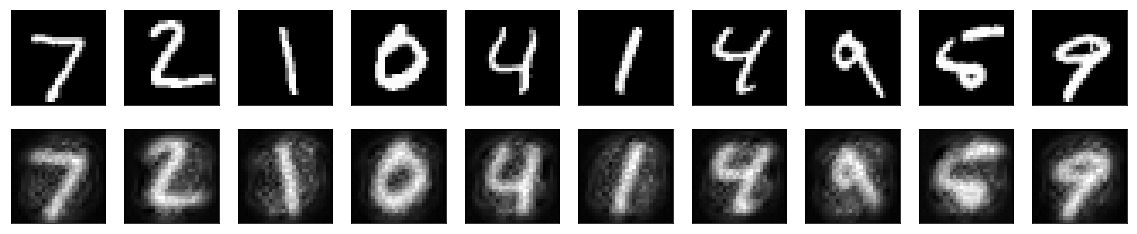

Dilated of the atom images of the decoder


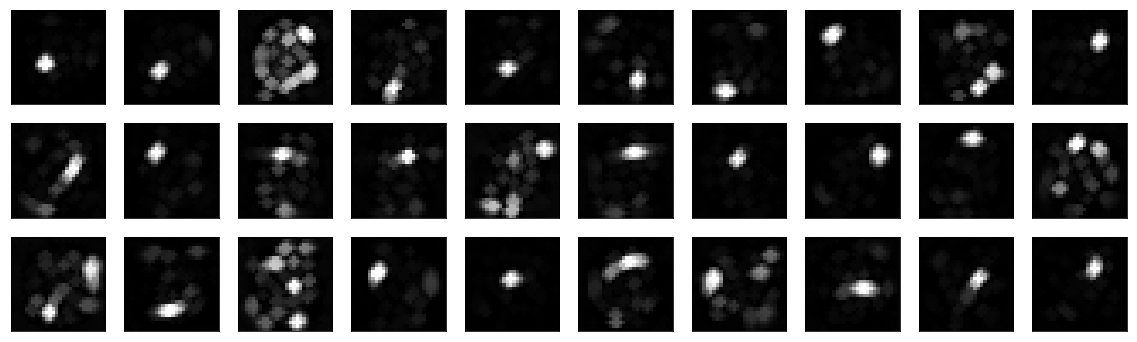

In [58]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.4 Sparsity_weight = 0.005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.005183947760611773


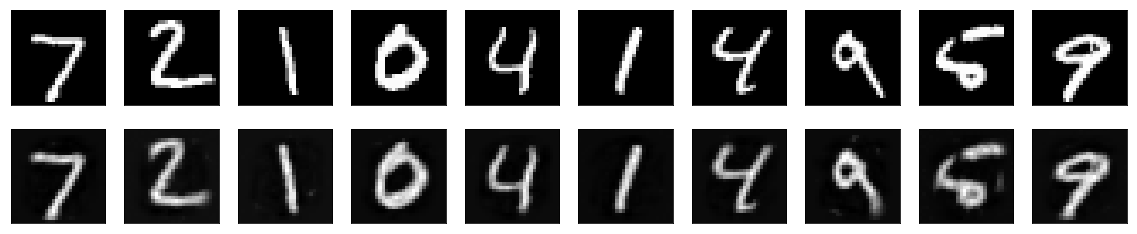

Histograms of the encodings - Sparsity (Hoyer):  0.32990631461143494


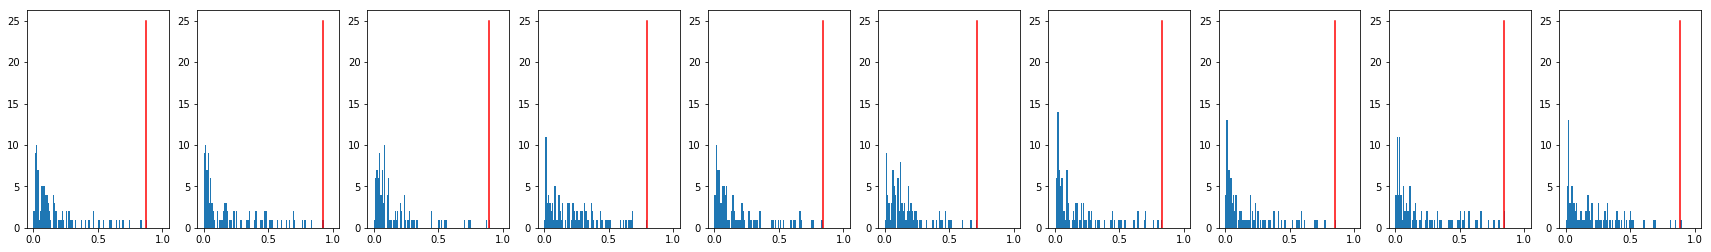

Atom images of the decoder


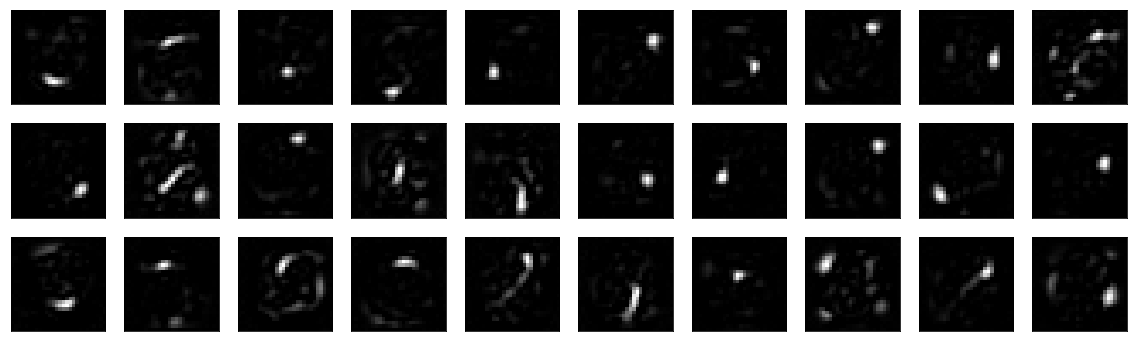

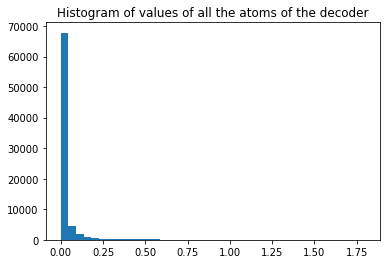

In [59]:
sp_o = 0.2
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


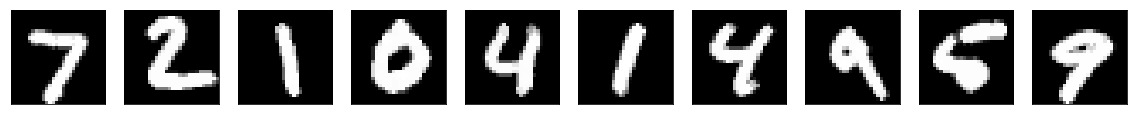

Dilatation of the reconstructions


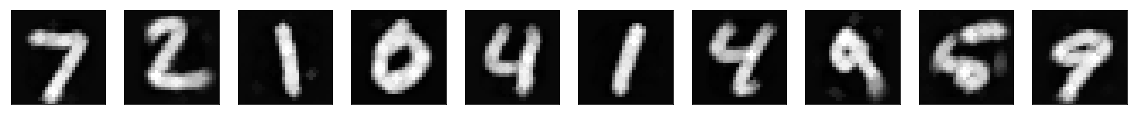

Original images and max-approximation to dilatation
Max-approx error to original:  0.89692008934021  - Max-approx error to reconstruction:  0.8757542743682861


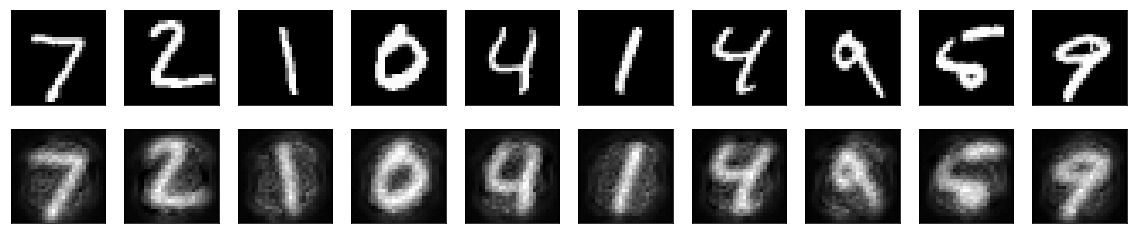

Dilated of the atom images of the decoder


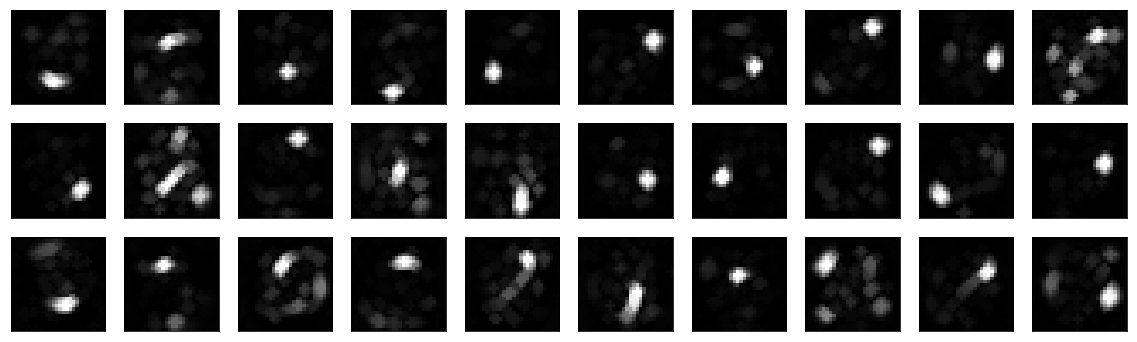

In [60]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.5 Sparsity_weight = 0.01 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.005147627282142639


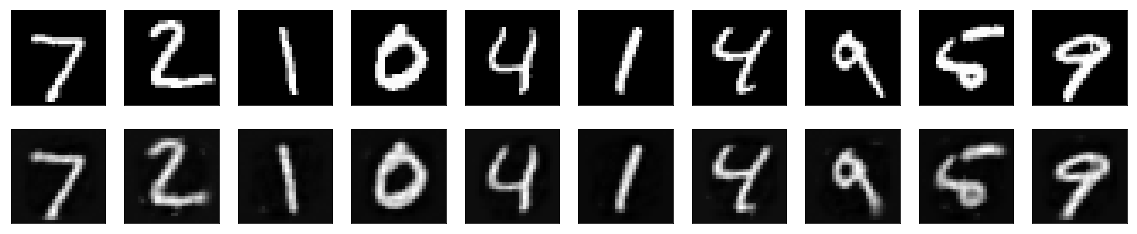

Histograms of the encodings - Sparsity (Hoyer):  0.32287514209747314


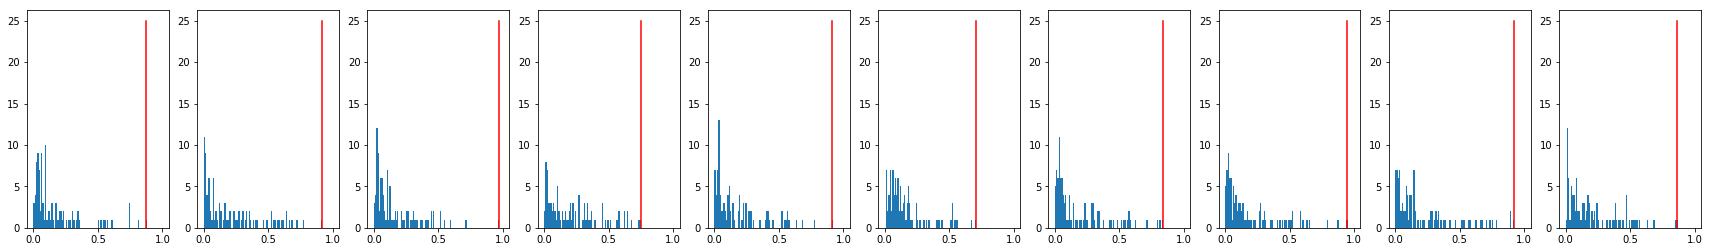

Atom images of the decoder


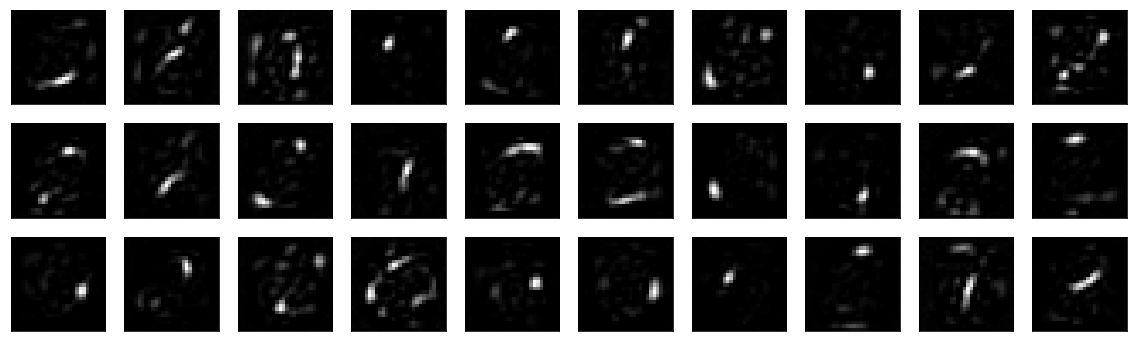

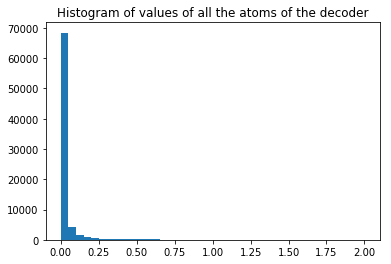

In [61]:
sp_o = 0.2
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


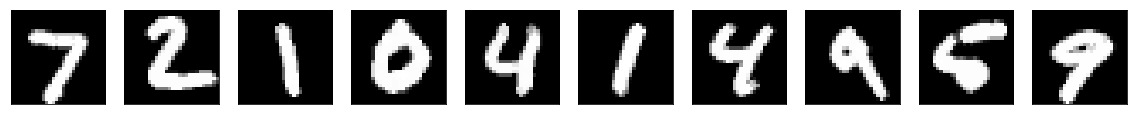

Dilatation of the reconstructions


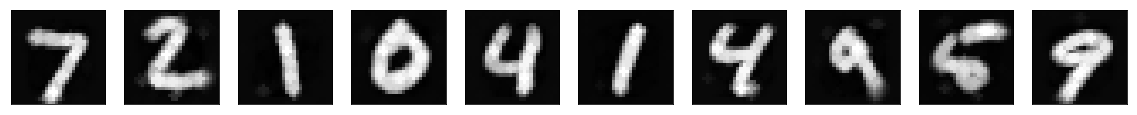

Original images and max-approximation to dilatation
Max-approx error to original:  0.9452434074401855  - Max-approx error to reconstruction:  0.9218399856567383


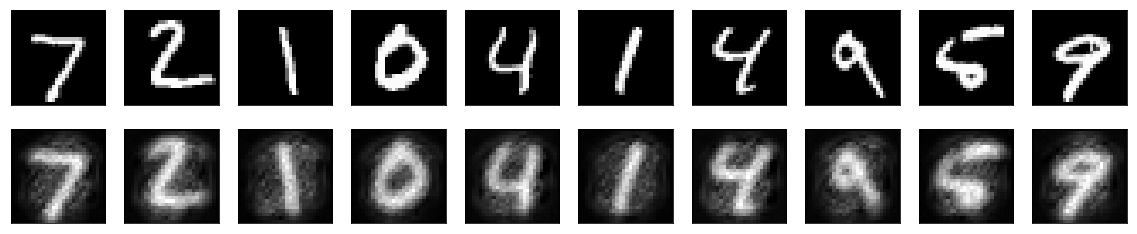

Dilated of the atom images of the decoder


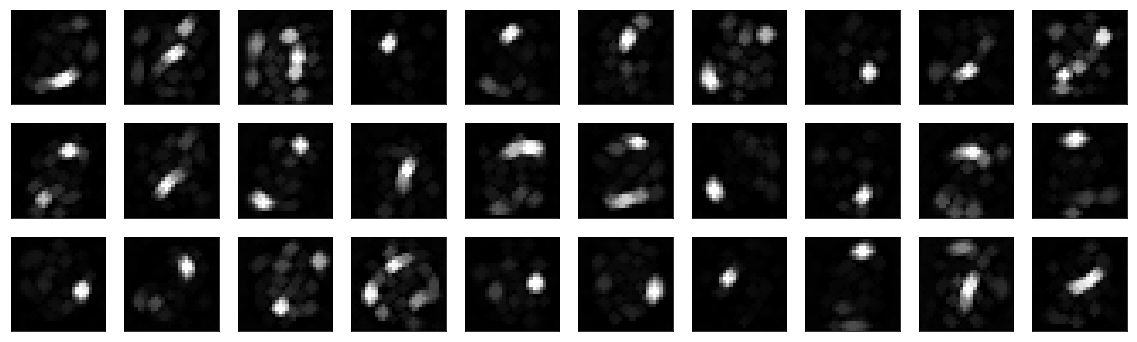

In [62]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.6 Sparsity_weight = 0.05 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.005002149660140276


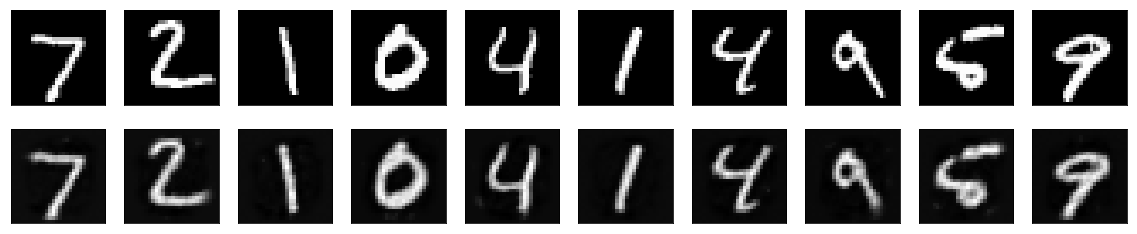

Histograms of the encodings - Sparsity (Hoyer):  0.2889285385608673


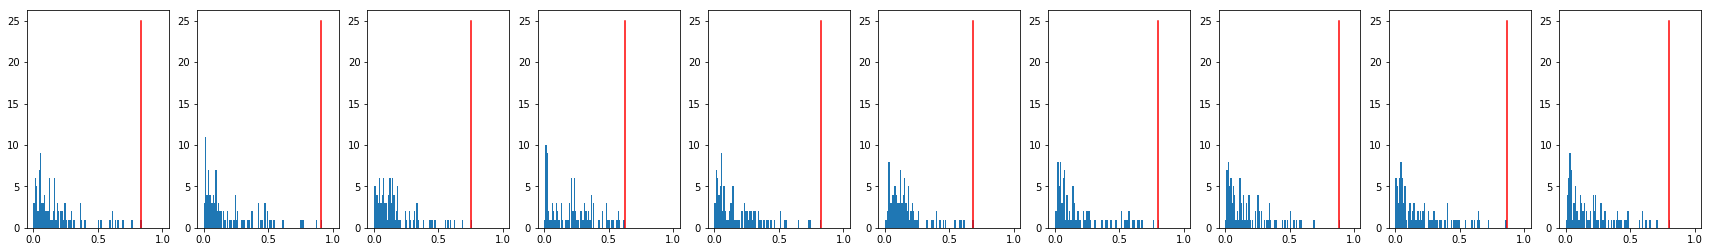

Atom images of the decoder


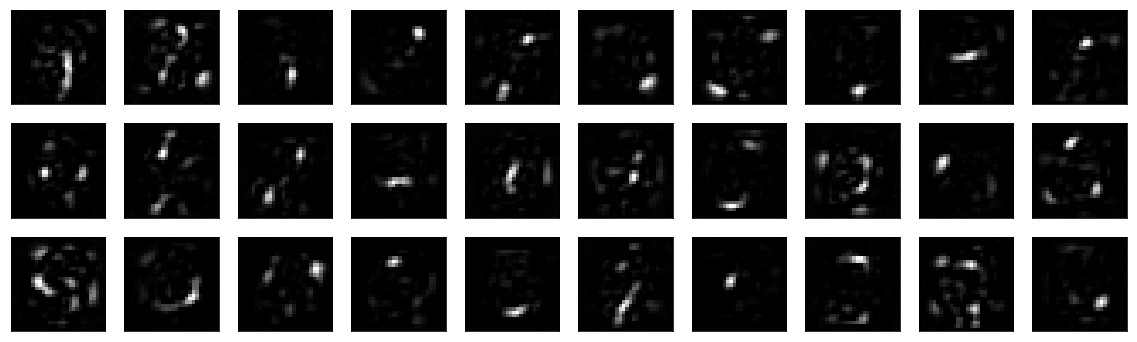

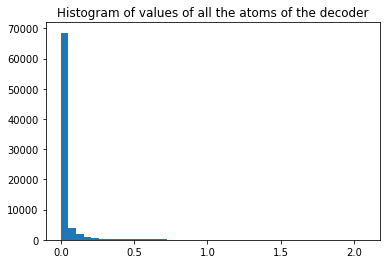

In [63]:
sp_o = 0.2
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


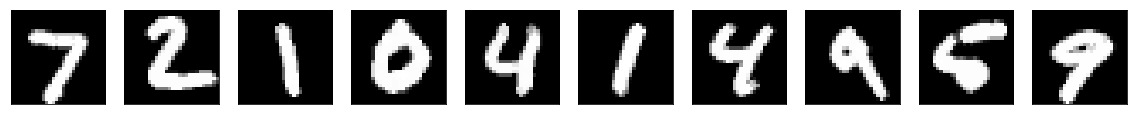

Dilatation of the reconstructions


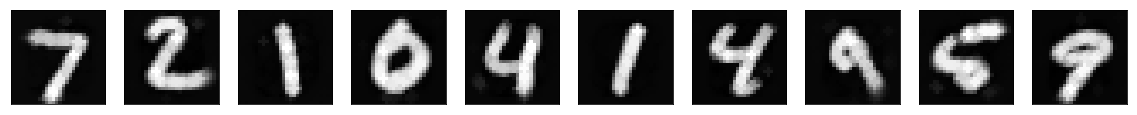

Original images and max-approximation to dilatation
Max-approx error to original:  1.0533040210723876  - Max-approx error to reconstruction:  1.043098145866394


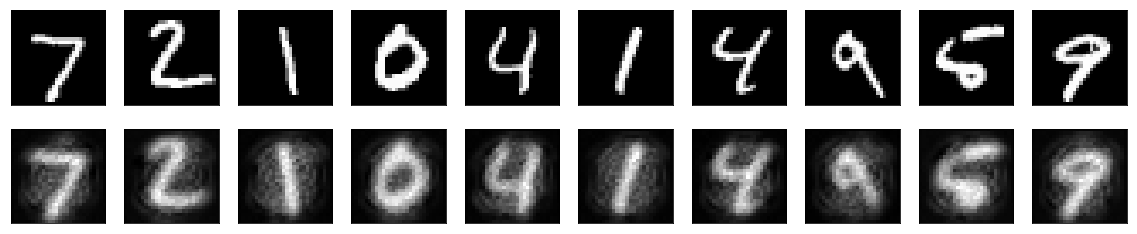

Dilated of the atom images of the decoder


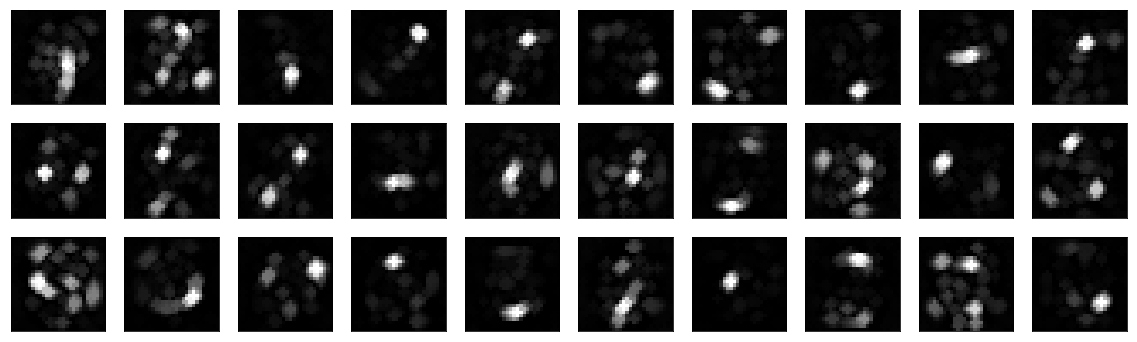

In [64]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.7 Sparsity_weight = 0.1 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.005190832191705704


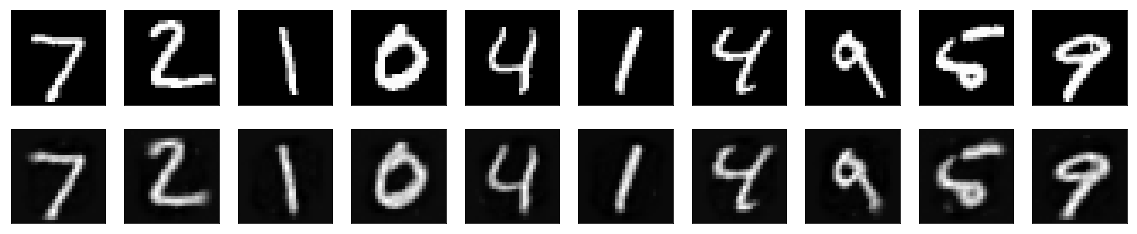

Histograms of the encodings - Sparsity (Hoyer):  0.2761760354042053


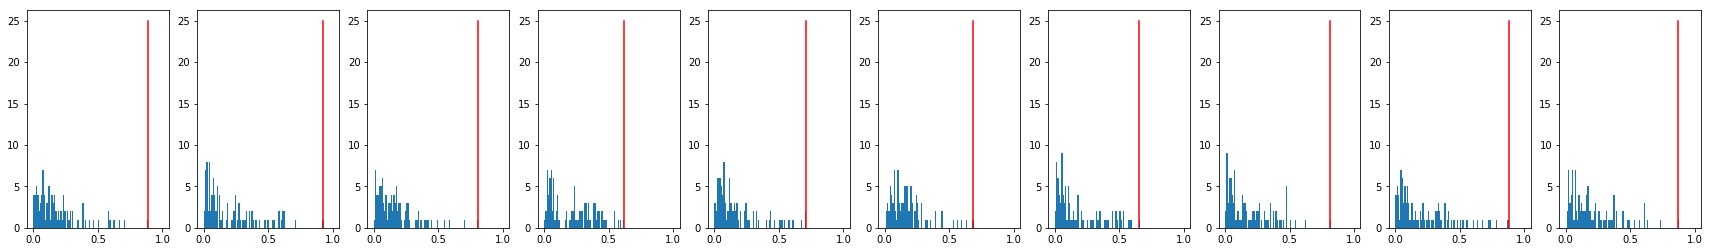

Atom images of the decoder


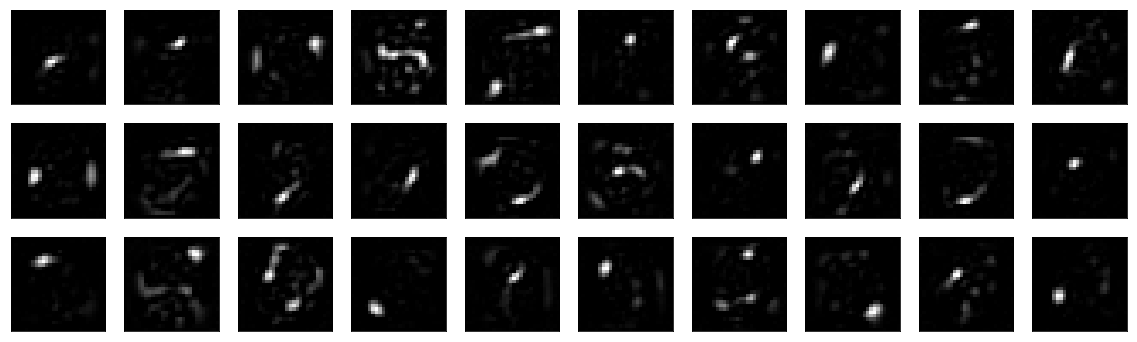

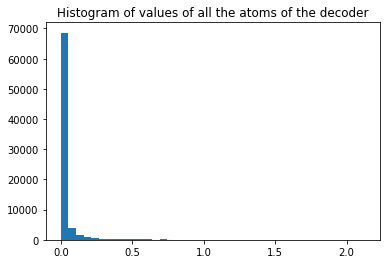

In [65]:
sp_o = 0.2
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


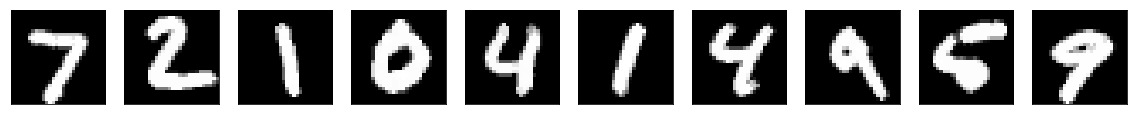

Dilatation of the reconstructions


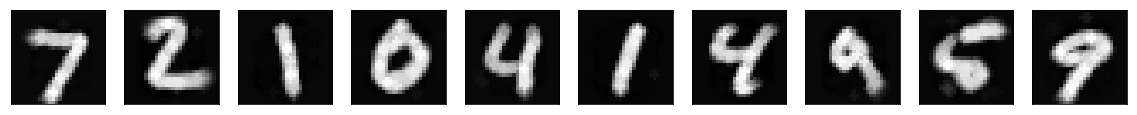

Original images and max-approximation to dilatation
Max-approx error to original:  1.0942352159500122  - Max-approx error to reconstruction:  1.0977152620315551


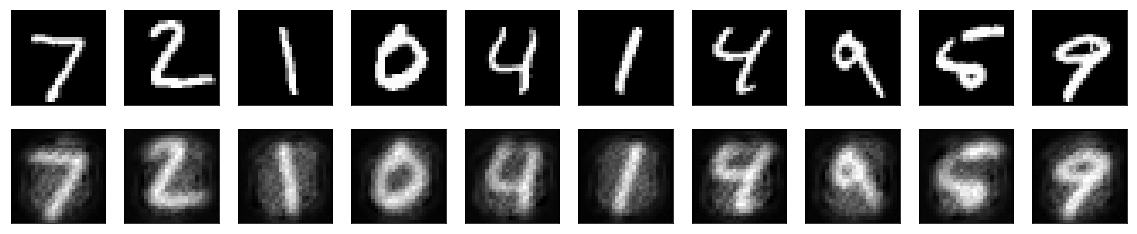

Dilated of the atom images of the decoder


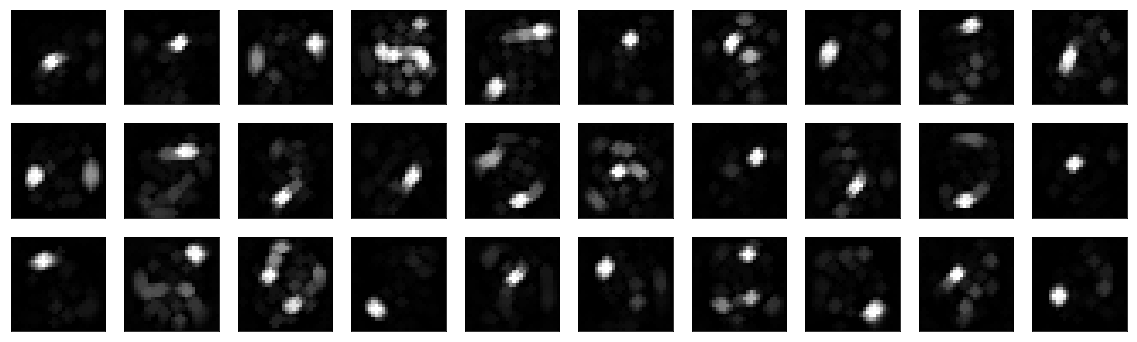

In [66]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.8 Sparsity_weight = 0.5 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.0055595323033630845


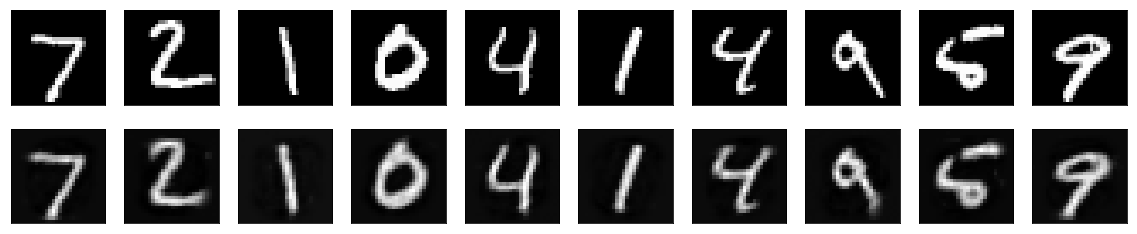

Histograms of the encodings - Sparsity (Hoyer):  0.22986528277397156


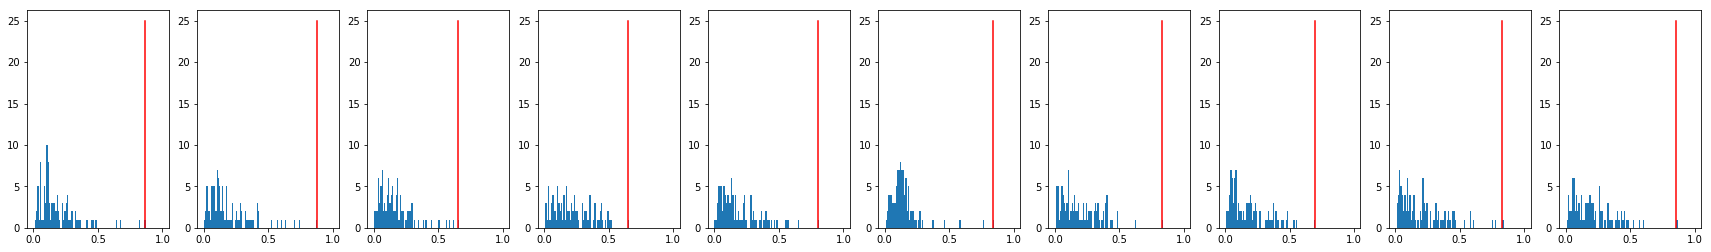

Atom images of the decoder


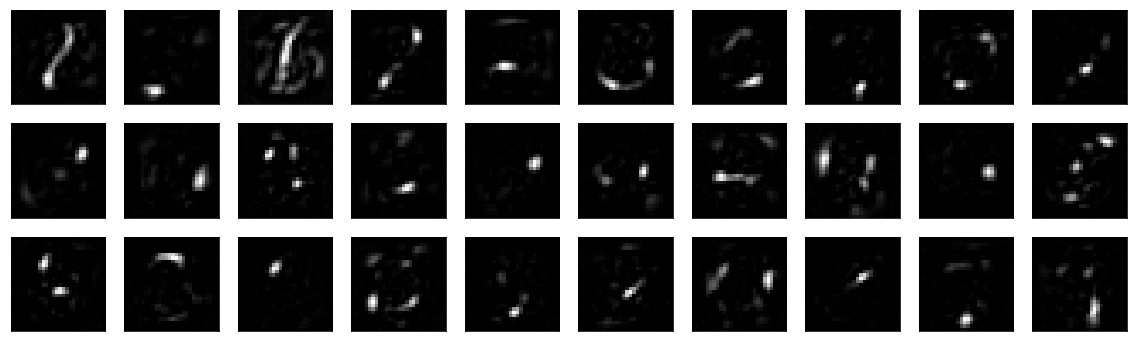

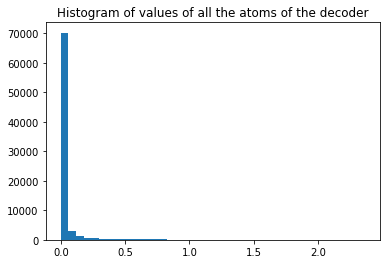

In [67]:
sp_o = 0.2
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5',  path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


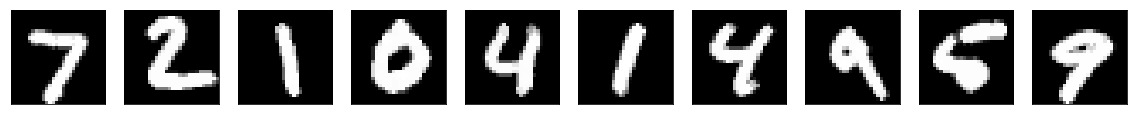

Dilatation of the reconstructions


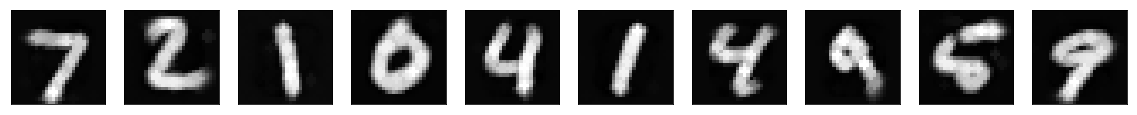

Original images and max-approximation to dilatation
Max-approx error to original:  1.3862337600708008  - Max-approx error to reconstruction:  1.3626814670562744


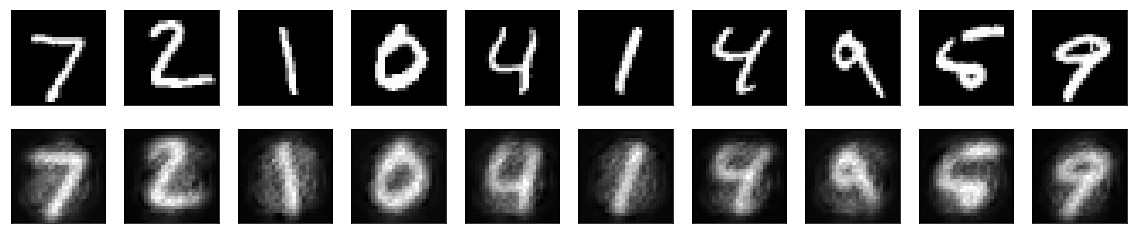

Dilated of the atom images of the decoder


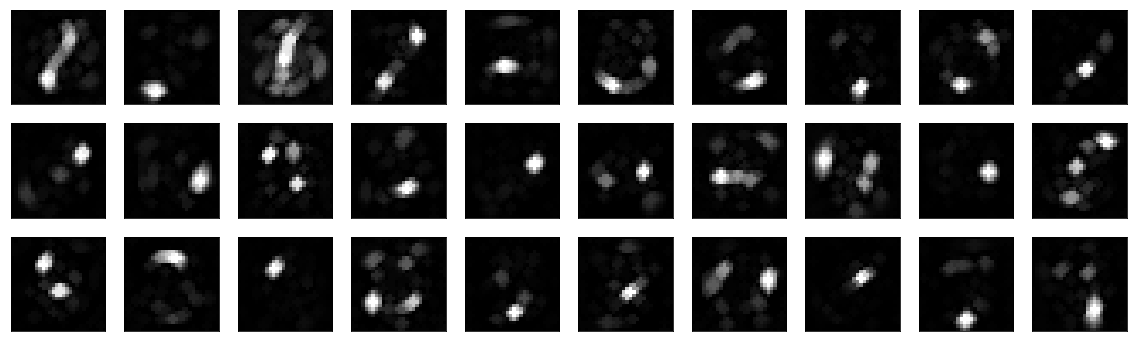

In [68]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)